In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
from pyparsing import python_style_comment
from itertools import islice
import scipy.sparse as sps
from scipy.sparse import diags
from functools import lru_cache
import pandas as pd

# More Power Ratio
Values matched for BPPM photon number and PPM time bin
<br>5,5 
<br>6,8 
<br>7,11 
<br>8,14 (exact)
<br>9,18 
<br>10,24 (exact)
<br>11,30 (exact)
<br>12,38 (exact)
<br>13,47 (exact)

In [2]:
@lru_cache(maxsize=None)
def compute_N(n_BPPM):
  def agen(): # generator of terms
      aset, sset, k = set(), set(), 0
      while True:
          k += 1
          while any(k+an in sset for an in aset): k += 1
          yield k; sset.update(k+an for an in aset); aset.add(k)
  a = list(islice(agen(), 100))
  photon = list(map(lambda v: v-1, a))
  compute_N= [sum(photon[:i]) for i in range(1,len(photon)+1)]
  return compute_N[n_BPPM]

def compute_M(n_BPPM):
  return n_BPPM

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N
def combination_PPM(M, n_PPM):
    return math.factorial((int(M))) / (math.factorial((int(M - n_PPM))) * math.factorial((int(n_PPM))))

def power_BPPM(n_BPPM,N_n):
    power = n_BPPM / N_n
    return power

def power_PPM(n_BPPM,compute_M):
   n_PPM = 1
   power  = n_PPM/ compute_M
   return power

def Compute_G_n(n_General):
    return n_General

def compute_T_General(n_General, M):
  T_General = compute_M(M) * n_General
  return T_General


def power_General(Compute_G_n, compute_T_General): 
   power = Compute_G_n / compute_T_General
   return power

In [3]:
df_power_BPPM = pd.DataFrame(columns=['Photon Number_BPPM', 
                                     'Time Bin_BPPM',
                                     'Power Ratio of BPPM',
                                     'Time Bin_PPM',
                                     'Power Ratio_PPM',
                                     'Time Bin_General_2',
                                     'Power Ratio_General_2',
                                     'Time Bin_General_3',
                                     'Power Ratio_General_3'
                                     ]
                                 )

for n in range(1,51):
    N_n = compute_N(n)
    M = compute_M(n)
    Power_BPPM_val = power_BPPM(n, N_n)
    Power_PPM_val = power_PPM(n,M)
    TimeBin_General_2 = compute_T_General(2, M)
    TimeBin_General_3 = compute_T_General(3, M)
    Power_General_2_val = power_General(Compute_G_n(2), compute_T_General(2, M))
    Power_General_3_val = power_General(Compute_G_n(3), compute_T_General(3, M))
    # codeword_PPM_val = codeword_PPM(EpI_BPPM(n_BPPM))
    # codeword_TimeBin_General_val = codeword_TimeBin_General(2, EpI_BPPM(n_BPPM))
    df_power_BPPM.loc[n-1] = [n, N_n, Power_BPPM_val, M, Power_PPM_val, TimeBin_General_2, Power_General_2_val, TimeBin_General_3, Power_General_3_val]
    

In [4]:
df_power_BPPM

,Photon Number_BPPM,Time Bin_BPPM,Power Ratio of BPPM,Time Bin_PPM,Power Ratio_PPM,Time Bin_General_2,Power Ratio_General_2,Time Bin_General_3,Power Ratio_General_3
0,1.0,1.0,1.000000,1.0,1.000000,2.0,1.000000,3.0,1.000000
1,2.0,3.0,0.666667,2.0,0.500000,4.0,0.500000,6.0,0.500000
2,3.0,7.0,0.428571,3.0,0.333333,6.0,0.333333,9.0,0.333333
3,4.0,14.0,0.285714,4.0,0.250000,8.0,0.250000,12.0,0.250000
4,5.0,26.0,0.192308,5.0,0.200000,10.0,0.200000,15.0,0.200000
5,6.0,46.0,0.130435,6.0,0.166667,12.0,0.166667,18.0,0.166667
6,7.0,75.0,0.093333,7.0,0.142857,14.0,0.142857,21.0,0.142857
7,8.0,113.0,0.070796,8.0,0.125000,16.0,0.125000,24.0,0.125000
8,9.0,165.0,0.054545,9.0,0.111111,18.0,0.111111,27.0,0.111111
9,10.0,238.0,0.042017,10.0,0.100000,20.0,0.100000,30.0,0.100000


In [5]:
# df_power_BPPM.to_excel('power_ratio.xlsx', index=False)

# BPPM

In [6]:
comb_cache = {}
comb_n_cache = {}
comb_n_M_minus_n_cache = {}

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N

def combination(n, r):
    if (n, r) in comb_cache:
        return comb_cache[(n, r)]
    else:
        comb = math.factorial(n) // (math.factorial(n-r) * math.factorial(r))
        comb_cache[(n, r)] = comb
        return comb
    
@lru_cache(maxsize=None)
def compute_N(n):
  def agen(): # generator of terms
      aset, sset, k = set(), set(), 0
      while True:
          k += 1
          while any(k+an in sset for an in aset): k += 1
          yield k; sset.update(k+an for an in aset); aset.add(k)
  a = list(islice(agen(), 100))
  photon = list(map(lambda v: v-1, a))
  compute_N= [sum(photon[:i]) for i in range(1,len(photon)+1)]
  return compute_N[n]

# We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# define a separate function for computing the loss distribution

def Loss_Distribute(n, P_l, l):
    if (n, l) in comb_n_cache:
        comb_n = comb_n_cache[(n, l)]
    else:
        comb_n = combination(n, l)
        comb_n_cache[(n, l)] = comb_n

    return comb_n * (P_l)**l * (1 - P_l)**(n - l)

def Add_Distribute(n, P_a, a):
    N_n = compute_N(n)
    M_minus_n = compute_N(n) - N_n
    if (N_n, M_minus_n, a) in comb_n_M_minus_n_cache:
        comb_Nn_Mn = comb_n_M_minus_n_cache[(N_n, M_minus_n, a)]
    else:
        comb_Nn_Mn = combination(N_n + M_minus_n, a)
        comb_n_M_minus_n_cache[(N_n, M_minus_n, a)] = comb_Nn_Mn

    return comb_Nn_Mn * (P_a)**a * (1 - P_a)**(M_minus_n - a)

# define a separate function for computing the probability of error
def P_err(n, P_l, P_a,l,a):
  return Loss_Distribute(n,P_l,l) * Add_Distribute(n,P_a, a)
  #return combination(n,l) * (P_l)**l*(1-P_l)**(n-l) * combination(N-n,a) * (P_a)**a*(1-P_a)**(N-n-a) 

# We put these into P_D for re-normalization, These are the probability of error we can correct
# define separate functions for computing the probability of success
def P_Success0(n,P_l,P_a,l,a):
  return P_err(n,P_l, P_a,0,0)

def P_Success1(n,P_l,P_a,l,a):
  P0 = P_Success0(n, P_l, P_a,l,a)
  P1 = P_err(n, P_l, P_a, l=0, a=1) + P_err(n, P_l, P_a, l=1, a=0)
  return P0 + P1

def P_Success2(n,P_l,P_a,l,a):
  P1 = P_Success1(n, P_l, P_a)
  P2 = P_err(n, P_l, P_a, l=1, a=1) + P_err(n, P_l, P_a, l=2, a=0) + P_err(n, P_l, P_a, l=0, a=2)
  return P1 + P2

def P_Success3(n,P_l,P_a,l,a):
  P2 = P_err(n, P_l, P_a, l=1, a=1) + P_err(n, P_l, P_a, l=2, a=0) + P_err(n, P_l, P_a, l=0, a=2)
  P3 = P_err(n, P_l, P_a,1,2) + P_err(n, P_l, P_a, 2,1) + P_err(n, P_l, P_a,3,0) + P_err(n, P_l, P_a,0,3)
  return P2 + P3

def P_D(n,P_l,P_a,l,a):
# we only consider at most 1 error, i.e. P_0 + P_1
  return 1 - P_Success1(n,P_l,P_a,l,a)

In [7]:
def P_AB_BPPM_diagonal(n, P_D):
    factorial_n = math.factorial(n)
    diag_data = (1/factorial_n) * (1-P_D) 
    # matrix = sps.dia_matrix((diag_data, 0), shape=(factorial_n, factorial_n))
    return diag_data

def P_A_BPPM_diagonal(P_AB_BPPM_diagonal, P_D):
    if P_D == 1:
        return [1 for row in P_AB_BPPM_diagonal]
    else:
        return [1/(1-P_D) * sum(row) for row in P_AB_BPPM_diagonal] 
# sum over the elements in columns in the probability matrix P_AB
# renormalized in P_AB already

def P_B_BPPM_diagonal(P_AB_BPPM_diagonal, P_D):
    if P_D == 1:
        return [1 for col in zip(*P_AB_BPPM_diagonal)]
    else:
        return [1/(1-P_D) * sum(col) for col in zip(*P_AB_BPPM_diagonal)]

def H_AB_BPPM_diagonal(P_AB_BPPM_diagonal, P_D):
    factorial_n = math.factorial(n)
    P_AB_BPPM_diagonal = np.where(P_AB_BPPM_diagonal == 0, 1e-9, P_AB_BPPM_diagonal)  # replace zero values with 1e-9
    H = - factorial_n * (P_AB_BPPM_diagonal * np.log2(np.where(P_AB_BPPM_diagonal == 0, 1, P_AB_BPPM_diagonal))).sum()
    return H
    
def I_AB_BPPM_diagonal(P_AB_BPPM_diagonal, P_D):
    factorial_n = math.factorial(n)
    H_AB_BPPM_diag = H_AB_BPPM_diagonal(P_AB_BPPM_diagonal, P_D)
    I_AB = H_AB_BPPM_diag *(1-P_D) 
    return I_AB

# PPM

M_minus_n_PPM is used to represent the number of elements that are not in the set of n_PPM elements. In the context of this code, M_minus_n_PPM is used to compute the number of elements in the "add" set, which is the set of elements not in the "loss" set.

By subtracting n_PPM from M, we get the number of elements not in the "loss" set. Then, we can use this value along with the number of elements in the "add" set to compute the probabilities of error and success.


In [8]:
def compute_M(n_BPPM):
  return n_BPPM

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N
def combination_PPM(M_PPM, n_PPM):
    return math.factorial((int(M_PPM))) / (math.factorial((int(M_PPM - n_PPM))) * math.factorial((int(n_PPM))))

# We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# define a separate function for computing the loss distribution

def Loss_Distribute_PPM(n_PPM, P_l, l):
      return combination(n_PPM, l) * (P_l)**l * (1 - P_l)**(n_PPM - l)

def Add_Distribute_PPM(n_PPM, M_PPM, P_a, a):
  return combination(M_PPM - n_PPM, a) * (P_a)**a * (1 - P_a)**(M_PPM - n_PPM - a)

# define a separate function for computing the probability of error
def P_err_PPM(n_PPM, M_PPM, P_l, P_a,l,a):
  return Loss_Distribute_PPM(n_PPM,P_l,l) * Add_Distribute_PPM(n_PPM, M_PPM, P_a, a)

def P_Success_PPM(n_PPM, M_PPM, P_l,P_a,l,a):
  return P_err_PPM(n_PPM, M_PPM, P_l, P_a, l=0, a=0) 

def P_D_PPM(n_PPM, M_PPM, P_l,P_a, l=0, a=0):
  return 1 - P_Success_PPM(n_PPM,M_PPM, P_l,P_a, l=0, a=0)



In [9]:
def P_AB_PPM(M_PPM):
    matrix =  np.eye(M_PPM) * 1/(M_PPM)  #[[1/M * P_AB_PPM[i] if i == j else 0 for j in range(M)] for i in range(M)]
    return matrix 

# sum over the elements in rows in the probability matrix P_AB
def P_A_PPM(P_AB_PPM, P_D_PPM):
    if P_D_PPM == 1:
        return [1 for row in P_AB_PPM]
    else:
        return [sum(row) for row in P_AB_PPM] # 1/(1-P_D_PPM)*

# sum over the elements in columns in the probability matrix P_AB
def P_B_PPM(P_AB_PPM):
    if P_D_PPM == 1:
        return [1 for col in zip(*P_AB_PPM)]
    else:
        return [sum(col) for col in zip(*P_AB_PPM)]

def H_A_PPM(P_AB_PPM):
     P_A_PPM = np.sum(P_AB_PPM, axis=1)
     H_a_PPM = np.sum(-P_A_PPM * np.log2(np.where(P_A_PPM == 0, 1, P_A_PPM)))
     return H_a_PPM

def H_B_PPM(P_AB_PPM):
     P_B_PPM = np.sum(P_AB_PPM, axis=0)
     H_b_PPM = np.sum(-P_B_PPM * np.log2(np.where(P_B_PPM == 0, 1, P_B_PPM)))
     return H_b_PPM

def H_AB_PPM(P_AB_PPM):
    P_AB_PPM = np.where(P_AB_PPM == 0, 1e-9, P_AB_PPM)  # replace zero values with 1e-9
    H_PPM = -(P_AB_PPM * np.log2(P_AB_PPM)).sum()
    return H_PPM

def I_AB_PPM(H_A_PPM, H_B_PPM, H_AB_PPM, P_D_PPM):
    if np.isnan(H_AB_PPM):
        return 0
    else:
        return ((H_A_PPM + H_B_PPM - H_AB_PPM)) * (1-P_D_PPM)



def P_AB_PPM_diagonal(M_PPM):
    diag_data = 1/(M_PPM)
    # matrix =  np.eye(M_PPM) * 1/(M_PPM)  #[[1/M * P_AB_PPM[i] if i == j else 0 for j in range(M)] for i in range(M)]
    return diag_data

def P_A_PPM_PPM_diagonal(P_AB_PPM_diagonal, P_D_PPM):
    if P_D_PPM == 1:
        return [1 for row in P_AB_PPM_diagonal]
    else:
        return [sum(row) for row in P_AB_PPM_diagonal] # 1/(1-P_D_PPM)*
        
# sum over the elements in columns in the probability matrix P_AB
def P_B_PPM_diagonal(P_AB_PPM_diagonal, P_D_PPM):
    if P_D_PPM == 1:
        return [1 for col in zip(*P_AB_PPM_diagonal)]
    else:
        return [sum(col) for col in zip(*P_AB_PPM_diagonal)]

def H_AB_PPM_diagonal(P_AB_PPM_diagonal, M_PPM):
    P_AB_PPM_diagonal = np.where(P_AB_PPM_diagonal == 0, 1e-9, P_AB_PPM_diagonal)  # replace zero values with 1e-9
    H = - M_PPM * (P_AB_PPM_diagonal * np.log2(P_AB_PPM_diagonal)).sum()
    return H

def I_AB_PPM_diagonal(P_AB_PPM_diagonal, M_PPM, P_D_PPM):
    H_AB_PPM_diag = H_AB_PPM_diagonal(P_AB_PPM_diagonal, M_PPM)
    I_AB = H_AB_PPM_diag *(1-P_D_PPM) 
    return I_AB

# General

In [10]:
def Compute_G_n(n_General):
    return n_General

def compute_T_General(T_General):
  return T_General

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N
def combination_General(T_General, n_General):
    return math.factorial(((T_General))) / (math.factorial(((T_General-n_General))) * math.factorial(((n_General))))

# We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# define a separate function for computing the loss distribution

def Loss_Distribute_General(n_General, P_l, l):
      return combination(n_General, l) * (P_l)**l * (1 - P_l)**(n_General - l)

def Add_Distribute_General(n_General, T_General, P_a, a):
    return combination(T_General - n_General, a) * (P_a)**a * (1 - P_a)**(T_General - n_General - a)

# define a separate function for computing the probability of error
def P_err_General(n_General, T_General, P_l, P_a,l,a):
  return Loss_Distribute_General(n_General,P_l,l) * Add_Distribute_General(n_General,T_General, P_a, a)

def P_Success_General(n_General,T_General, P_l,P_a,l,a):
  return P_err_General(n_General,T_General, P_l, P_a, l=0, a=0) 

def P_D_General(n_General,T_General, P_l,P_a, l=0,a=0):
  return 1 - P_Success_General(n_General,T_General, P_l,P_a, l=0, a=0)

def P_A_General(P_AB_General, P_D_General):
    if P_D_General == 1:
        return [1 for row in P_AB_General]
    else:
        return [sum(row) for row in P_AB_General]
    
# sum over the elements in columns in the probability matrix P_AB
def P_B_General(P_AB_General, P_D_General):
    if P_D_General == 1:
        return [1 for col in zip(*P_AB_General)]
    else:
        return [sum(col) for col in zip(*P_AB_General)]
    
def I_AB_General(H_A_General, H_B_General, H_AB_General, P_D_General):
    if np.isnan(H_AB_General):
        return 0
    else:
        return ((H_A_General + H_B_General - H_AB_General)) * (1-P_D_General) 

In [11]:
def P_AB_diag_General(n_General, T_General):
    diag_data = np.ones(int(combination(T_General, n_General))) / combination(T_General, n_General)
    matrix = sps.dia_matrix((diag_data, 0), shape=(diag_data.size, diag_data.size))
    return matrix
    
def H_A_General(P_A_General):
    P_A_General_diag = P_A_General.diagonal()
    H_a_General = np.sum(-P_A_General_diag * np.log2(np.where(P_A_General_diag == 0, 1, P_A_General_diag)))
    return H_a_General

def H_B_General(P_B_General):
    P_B_General_diag = P_B_General.diagonal()
    H_b_General = np.sum(-P_B_General_diag * np.log2(np.where(P_B_General_diag == 0, 1, P_B_General_diag)))
    return H_b_General

def H_AB_General(P_AB_General):
    P_AB_General_diag = P_AB_General.diagonal()
    P_AB_General_diag = np.where(P_AB_General_diag == 0, 1e-9, P_AB_General_diag)  # replace zero values with 1e-9
    H_General = -(P_AB_General_diag * np.log2(P_AB_General_diag)).sum()
    return H_General

## OOK

In [12]:
def compute_M_OOK(n_OOK):
  M_OOK = n_OOK * 2
  return M_OOK

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N
def combination_OOK(n_OOK, M_OOK):
    return math.factorial((int(M_OOK))) / (math.factorial((int(M_OOK - n_OOK))) * math.factorial((int(n_OOK))))

# We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# define a separate function for computing the loss distribution

def Loss_Distribute_OOK(n_OOK, P_l, l):
    return combination(n_OOK, l) * (P_l)**l * (1 - P_l)**(n_OOK - l)

def Add_Distribute_OOK(n_OOK, M_OOK, P_a, a):
    return combination(M_OOK - n_OOK, a) * (P_a)**a * (1 - P_a)**(M_OOK - n_OOK - a)

# define a separate function for computing the probability of error
def P_err_OOK(n_OOK, M_OOK, P_l, P_a,l,a):
  return Loss_Distribute_OOK(n_OOK,P_l,l) * Add_Distribute_OOK(n_OOK, M_OOK, P_a, a)

def P_Success_OOK(n_OOK,M_OOK, P_l,P_a,l,a):
  return P_err_OOK(n_OOK,M_OOK, P_l, P_a, l=0, a=0) 

def P_D_OOK(n_OOK,M_OOK, P_l,P_a, l=0,a=0):
  return 1 - P_Success_OOK(n_OOK,M_OOK, P_l,P_a, l=0, a=0)

def P_AB_OOK_diagonal(n_OOK):
    diag_data = 1 / (2**n_OOK)
    # matrix =  np.eye(M_OOK) * 1/(M_OOK)
    return diag_data

# sum over the elements in rows in the probability matrix P_AB
def P_A_OOK_diagonal(P_AB_OOK_diagonal, P_D_OOK):
    if P_D_OOK == 1:
        return [1 for row in P_AB_OOK_diagonal]
    else:
        return [sum(row) for row in P_AB_OOK_diagonal] # 1/(1-P_D_PPM)*
    
# sum over the elements in columns in the probability matrix P_AB
def P_B_OOK_diagonal(P_AB_OOK_diagonal):
    if P_D_OOK == 1:
        return [1 for col in zip(*P_AB_OOK_diagonal)]
    else:
        return [sum(col) for col in zip(*P_AB_OOK_diagonal)]

# def H_A_OOK(P_AB_OOK):
#      P_A_OOK = np.sum(P_AB_OOK, axis=1)
#      H_a_OOK = np.sum(-P_A_OOK * np.log2(np.where(P_A_OOK == 0, 1, P_A_OOK)))
#      return H_a_OOK

# def H_B_OOK(P_AB_OOK):
#      P_B_OOK = np.sum(P_AB_OOK, axis=0)
#      H_b_OOK = np.sum(-P_B_OOK * np.log2(np.where(P_B_OOK == 0, 1, P_B_OOK)))
#      return H_b_OOK

def H_AB_OOK_diagonal(P_AB_OOK_diagonal, n_OOK):
    P_AB_OOK_diagonal = np.where(P_AB_OOK_diagonal == 0, 1e-9, P_AB_OOK_diagonal)  # replace zero values with 1e-9
    H_OOK = - 2**n_OOK * (P_AB_OOK_diagonal * np.log2(P_AB_OOK_diagonal)).sum()
    return H_OOK

# def I_AB_OOK(H_A_OOK, H_B_OOK, H_AB_OOK, P_D_OOK):
#     if np.isnan(H_AB_OOK):
#         return 0
#     else:
#         return ((H_A_OOK + H_B_OOK - H_AB_OOK)) * (1-P_D_OOK)

def I_AB_OOK_diagonal(P_AB_OOK_diagonal, n_OOK, P_D_OOK):
    H_AB_OOK_diag = H_AB_OOK_diagonal(P_AB_OOK_diagonal, n_OOK)
    I_AB = H_AB_OOK_diag *(1-P_D_OOK) 
    return I_AB
    

## n_BPPM = 5, M = 5 

In [13]:
P_AB_BPPM_list_5_0_1 = []
H_AB_BPPM_list_5_0_1 = []
I_AB_BPPM_list_5_0_1 = []
Normalized_I_AB_BPPM_list_5_0_1 = []
IperPhoton_AB_BPPM_list_5_0_1 = []
IperTimeBin_AB_BPPM_list_5_0_1 = []
IperPhotonTimeBin_AB_BPPM_list_5_0_1 = []

P_AB_BPPM_list_5_1 = []
H_AB_BPPM_list_5_1 = []
I_AB_BPPM_list_5_1 = []
Normalized_I_AB_BPPM_list_5_1 = []
IperPhoton_AB_BPPM_list_5_1 = []
IperTimeBin_AB_BPPM_list_5_1 = []
IperPhotonTimeBin_AB_BPPM_list_5_1 = []

P_list_0_1 = np.linspace(1e-6, 0.1,101)
P_list_1 =   np.linspace(1e-6, 1.0,101)

for P in P_list_0_1:
    n = 5
    M = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    P_AB_BPPM_list_5_0_1.append(P_AB_BPPM_val)
    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    H_AB_BPPM_list_5_0_1.append(H_AB_BPPM_val)
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_list_5_0_1.append(I_AB_BPPM_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    Normalized_I_AB_BPPM_list_5_0_1.append(Normalized_I_AB_BPPM_val)
    IperPhoton_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ n
    IperPhoton_AB_BPPM_list_5_0_1.append(IperPhoton_AB_BPPM_val)
    IperTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ M
    IperTimeBin_AB_BPPM_list_5_0_1.append(IperTimeBin_AB_BPPM_val)
    IperPhotonTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ (n * M)
    IperPhotonTimeBin_AB_BPPM_list_5_0_1.append(IperPhotonTimeBin_AB_BPPM_val)

for P in P_list_1:
    n = 5
    M = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    P_AB_BPPM_list_5_1.append(P_AB_BPPM_val)
    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    H_AB_BPPM_list_5_1.append(H_AB_BPPM_val)
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_list_5_1.append(I_AB_BPPM_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    Normalized_I_AB_BPPM_list_5_1.append(Normalized_I_AB_BPPM_val)
    IperPhoton_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ n
    IperPhoton_AB_BPPM_list_5_1.append(IperPhoton_AB_BPPM_val)
    IperTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ M
    IperTimeBin_AB_BPPM_list_5_1.append(IperTimeBin_AB_BPPM_val)
    IperPhotonTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ (n * M)
    IperPhotonTimeBin_AB_BPPM_list_5_1.append(IperPhotonTimeBin_AB_BPPM_val)

In [14]:
I_AB_PPM_list_5_0_1 = []
Normalized_I_AB_PPM_list_5_0_1 = []
IperPhoton_AB_PPM_list_5_0_1 = []
IperTimeBin_AB_PPM_list_5_0_1 = []
IperPhotonTimeBin_AB_PPM_list_5_0_1 = []

I_AB_PPM_list_5_1 = []
Normalized_I_AB_PPM_list_5_1 = []
IperPhoton_AB_PPM_list_5_1 = []
IperTimeBin_AB_PPM_list_5_1 = []
IperPhotonTimeBin_AB_PPM_list_5_1 = []

P_list_0_1 = np.linspace(1e-6, 0.1,101)
P_list_1 =   np.linspace(1e-6, 1.0,101)

for P in P_list_0_1:
  n_PPM = 1
  M_PPM = 5
  P_D_PPM_val = P_D_PPM(n_PPM,M_PPM, P, 0, l=0,a=0)
  P_AB_PPM_val = P_AB_PPM_diagonal(M_PPM) # P_AB_PPM(n, P)
  P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)
  # H_A_PPM_val = H_A_PPM(P_AB_PPM_val)
  # H_B_PPM_val = H_B_PPM(P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM_diagonal(P_AB_PPM_val, M_PPM)
  I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val)
  I_AB_PPM_list_5_0_1.append(I_AB_PPM_val) 


  Normalized_I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, 0)
  Normalized_I_AB_PPM_list_5_0_1.append(Normalized_I_AB_PPM_val)
  
  IperPhoton_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / n_PPM
  IperPhoton_AB_PPM_list_5_0_1.append(IperPhoton_AB_PPM_val)
  
  IperTimeBin_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / M_PPM
  IperTimeBin_AB_PPM_list_5_0_1.append(IperTimeBin_AB_PPM_val) 

  IperPhotonTimeBin_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / (n_PPM * M_PPM)
  IperPhotonTimeBin_AB_PPM_list_5_0_1.append(IperPhotonTimeBin_AB_PPM_val)

for P in P_list_1:
  n_PPM = 1
  M_PPM = 5
  P_D_PPM_val = P_D_PPM(n_PPM,M_PPM, P, 0, l=0,a=0)
  P_AB_PPM_val = P_AB_PPM_diagonal(M_PPM) # P_AB_PPM(n, P)
  P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)
  # H_A_PPM_val = H_A_PPM(P_AB_PPM_val)
  # H_B_PPM_val = H_B_PPM(P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM_diagonal(P_AB_PPM_val, M_PPM)
  I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val)
  I_AB_PPM_list_5_0_1.append(I_AB_PPM_val) 

  Normalized_I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, 0)
  Normalized_I_AB_PPM_list_5_1.append(Normalized_I_AB_PPM_val)
  
  IperPhoton_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / n_PPM
  IperPhoton_AB_PPM_list_5_1.append(IperPhoton_AB_PPM_val)

  IperTimeBin_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / M_PPM
  IperTimeBin_AB_PPM_list_5_1.append(IperTimeBin_AB_PPM_val) 
  
  IperPhotonTimeBin_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / (n_PPM * M_PPM)
  IperPhotonTimeBin_AB_PPM_list_5_1.append(IperPhotonTimeBin_AB_PPM_val)

In [15]:
I_AB_General_n2_list_5_0_1 = []
Normalized_I_AB_General_n2_list_5_0_1 = []
IperPhoton_AB_General_n2_list_5_0_1 = []
IperTimeBin_AB_General_n2_list_5_0_1 = []
IperPhotonTimeBin_AB_General_n2_list_5_0_1 = []

I_AB_General_n2_list_5_1 = []
Normalized_I_AB_General_n2_list_5_1 = []
IperPhoton_AB_General_n2_list_5_1 = []
IperTimeBin_AB_General_n2_list_5_1 = []
IperPhotonTimeBin_AB_General_n2_list_5_1 = []

P_list_0_1 = np.linspace(1e-6, 0.1,101)
P_list_1 =   np.linspace(1e-6, 1.0,101)

for P in P_list_0_1:
  n_General = Compute_G_n(2)
  T_General = compute_T_General(10)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General)
  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)
  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) 
  I_AB_General_n2_list_5_0_1.append(I_AB_General_val)
  Normalized_I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, 0) 
  Normalized_I_AB_General_n2_list_5_0_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_n2_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / n_General
  IperPhoton_AB_General_n2_list_5_0_1.append(IperPhoton_AB_General_n2_val)
  IperTimeBin_AB_General_n2_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / T_General
  IperTimeBin_AB_General_n2_list_5_0_1.append(IperTimeBin_AB_General_n2_val)
  IperPhotonTimeBin_AB_General_n2_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / (n_General * T_General)
  IperPhotonTimeBin_AB_General_n2_list_5_0_1.append(IperPhotonTimeBin_AB_General_n2_val)

for P in P_list_1:
  n_General = Compute_G_n(2)
  T_General = compute_T_General(10)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General)
  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)
  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) 
  I_AB_General_n2_list_5_1.append(I_AB_General_val)
  Normalized_I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, 0) 
  Normalized_I_AB_General_n2_list_5_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_n2_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / n_General
  IperPhoton_AB_General_n2_list_5_1.append(IperPhoton_AB_General_n2_val)
  IperTimeBin_AB_General_n2_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / T_General
  IperTimeBin_AB_General_n2_list_5_1.append(IperTimeBin_AB_General_n2_val)
  IperPhotonTimeBin_AB_General_n2_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / (n_General * T_General)
  IperPhotonTimeBin_AB_General_n2_list_5_1.append(IperPhotonTimeBin_AB_General_n2_val)

In [16]:
I_AB_General_n3_list_5_0_1 = []
Normalized_I_AB_General_n3_list_5_0_1 = []
IperPhoton_AB_General_n3_list_5_0_1 = []
IperTimeBin_AB_General_n3_list_5_0_1 = []
IperPhotonTimeBin_AB_General_n3_list_5_0_1 = []

I_AB_General_n3_list_5_1 = []
Normalized_I_AB_General_n3_list_5_1 = []
IperPhoton_AB_General_n3_list_5_1 = []
IperTimeBin_AB_General_n3_list_5_1 = []
IperPhotonTimeBin_AB_General_n3_list_5_1 = []

P_list_0_1 = np.linspace(1e-6, 0.1,101)
P_list_1 =   np.linspace(1e-6, 1.0,101)

for P in P_list_0_1:
  n_General = Compute_G_n(3)
  T_General = compute_T_General(15)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General)
  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)
  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) 
  I_AB_General_n3_list_5_0_1.append(I_AB_General_val)
  Normalized_I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, 0)
  Normalized_I_AB_General_n3_list_5_0_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_n3_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / n_General
  IperPhoton_AB_General_n3_list_5_0_1.append(IperPhoton_AB_General_n3_val)
  IperTimeBin_AB_General_n3_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / T_General
  IperTimeBin_AB_General_n3_list_5_0_1.append(IperTimeBin_AB_General_n3_val)
  IperPhotonTimeBin_AB_General_n3_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / (n_General * T_General)
  IperPhotonTimeBin_AB_General_n3_list_5_0_1.append(IperPhotonTimeBin_AB_General_n3_val)

for P in P_list_1:
  n_General = Compute_G_n(3)
  T_General = compute_T_General(15)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General)
  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)
  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) 
  I_AB_General_n3_list_5_1.append(I_AB_General_val)
  Normalized_I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, 0)
  Normalized_I_AB_General_n3_list_5_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_n3_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / n_General
  IperPhoton_AB_General_n3_list_5_1.append(IperPhoton_AB_General_n3_val)
  IperTimeBin_AB_General_n3_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / T_General
  IperTimeBin_AB_General_n3_list_5_1.append(IperTimeBin_AB_General_n3_val)
  IperPhotonTimeBin_AB_General_n3_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / (n_General * T_General)
  IperPhotonTimeBin_AB_General_n3_list_5_1.append(IperPhotonTimeBin_AB_General_n3_val)

## n_BPPM = 9

In [17]:
P_AB_BPPM_list_9_0_1 = []
H_AB_BPPM_list_9_0_1 = []
I_AB_BPPM_list_9_0_1 = []
Normalized_I_AB_BPPM_list_9_0_1 = []
IperPhoton_AB_BPPM_list_9_0_1 = []
IperTimeBin_AB_BPPM_list_9_0_1 = []
IperPhotonTimeBin_AB_BPPM_list_9_0_1 = []

P_AB_BPPM_list_9_1 = []
H_AB_BPPM_list_9_1 = []
I_AB_BPPM_list_9_1 = []
Normalized_I_AB_BPPM_list_9_1 = []
IperPhoton_AB_BPPM_list_9_1 = []
IperTimeBin_AB_BPPM_list_9_1 = []
IperPhotonTimeBin_AB_BPPM_list_9_1 = []

P_list_0_1 = np.linspace(1e-6, 0.1,101)
P_list_1 =   np.linspace(1e-6, 1.0,101)

for P in P_list_0_1:
    n = 9
    M = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    P_AB_BPPM_list_9_0_1.append(P_AB_BPPM_val)
    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    H_AB_BPPM_list_9_0_1.append(H_AB_BPPM_val)
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_list_9_0_1.append(I_AB_BPPM_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    Normalized_I_AB_BPPM_list_9_0_1.append(Normalized_I_AB_BPPM_val)
    IperPhoton_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ n
    IperPhoton_AB_BPPM_list_9_0_1.append(IperPhoton_AB_BPPM_val)
    IperTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ M
    IperTimeBin_AB_BPPM_list_9_0_1.append(IperTimeBin_AB_BPPM_val)
    IperPhotonTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ (n * M)
    IperPhotonTimeBin_AB_BPPM_list_9_0_1.append(IperPhotonTimeBin_AB_BPPM_val)

for P in P_list_1:
    n = 9
    M = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    P_AB_BPPM_list_9_1.append(P_AB_BPPM_val)
    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    H_AB_BPPM_list_9_1.append(H_AB_BPPM_val)
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_list_9_1.append(I_AB_BPPM_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    Normalized_I_AB_BPPM_list_9_1.append(Normalized_I_AB_BPPM_val)
    IperPhoton_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ n
    IperPhoton_AB_BPPM_list_9_1.append(IperPhoton_AB_BPPM_val)
    IperTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ M
    IperTimeBin_AB_BPPM_list_9_1.append(IperTimeBin_AB_BPPM_val)
    IperPhotonTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ (n * M)
    IperPhotonTimeBin_AB_BPPM_list_9_1.append(IperPhotonTimeBin_AB_BPPM_val)

In [18]:
I_AB_PPM_list_9_0_1 = []
Normalized_I_AB_PPM_list_9_0_1 = []
IperPhoton_AB_PPM_list_9_0_1 = []
IperTimeBin_AB_PPM_list_9_0_1 = []
IperPhotonTimeBin_AB_PPM_list_9_0_1 = []

I_AB_PPM_list_9_1 = []
Normalized_I_AB_PPM_list_9_1 = []
IperPhoton_AB_PPM_list_9_1 = []
IperTimeBin_AB_PPM_list_9_1 = []
IperPhotonTimeBin_AB_PPM_list_9_1 = []

P_list_0_1 = np.linspace(1e-6, 0.1,101)
P_list_1 =   np.linspace(1e-6, 1.0,101)

for P in P_list_0_1:
  n_PPM = 1
  M_PPM = 18
  P_D_PPM_val = P_D_PPM(n_PPM,M_PPM, P, 0, l=0,a=0)
  P_AB_PPM_val = P_AB_PPM_diagonal(M_PPM) # P_AB_PPM(n, P)
  # P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  # P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)
  # H_A_PPM_val = H_A_PPM(P_AB_PPM_val)
  # H_B_PPM_val = H_B_PPM(P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM_diagonal(P_AB_PPM_val, M_PPM)
  I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val)
  I_AB_PPM_list_9_0_1.append(I_AB_PPM_val) 


  Normalized_I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, 0)
  Normalized_I_AB_PPM_list_9_0_1.append(Normalized_I_AB_PPM_val)
  
  IperPhoton_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / n_PPM
  IperPhoton_AB_PPM_list_9_0_1.append(IperPhoton_AB_PPM_val)
  
  IperTimeBin_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / M_PPM
  IperTimeBin_AB_PPM_list_9_0_1.append(IperTimeBin_AB_PPM_val) 

  IperPhotonTimeBin_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / (n_PPM * M_PPM)
  IperPhotonTimeBin_AB_PPM_list_9_0_1.append(IperPhotonTimeBin_AB_PPM_val)

for P in P_list_1:
  n_PPM = 1
  M_PPM = 18
  P_D_PPM_val = P_D_PPM(n_PPM,M_PPM, P, 0, l=0,a=0)
  P_AB_PPM_val = P_AB_PPM_diagonal(M_PPM) # P_AB_PPM(n, P)
  P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)
  # H_A_PPM_val = H_A_PPM(P_AB_PPM_val)
  # H_B_PPM_val = H_B_PPM(P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM_diagonal(P_AB_PPM_val, M_PPM)
  I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val)
  I_AB_PPM_list_9_1.append(I_AB_PPM_val) 

  Normalized_I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, 0)
  Normalized_I_AB_PPM_list_9_1.append(Normalized_I_AB_PPM_val)
  
  IperPhoton_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / n_PPM
  IperPhoton_AB_PPM_list_9_1.append(IperPhoton_AB_PPM_val)

  IperTimeBin_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / M_PPM
  IperTimeBin_AB_PPM_list_9_1.append(IperTimeBin_AB_PPM_val) 
  
  IperPhotonTimeBin_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / (n_PPM * M_PPM)
  IperPhotonTimeBin_AB_PPM_list_9_1.append(IperPhotonTimeBin_AB_PPM_val)

In [19]:
I_AB_PPM(H_A_PPM(P_AB_PPM(5)), H_B_PPM(P_AB_PPM(5)), H_AB_PPM(P_AB_PPM(5)), P_D_PPM(1,5,0.01, 0, l=0,a=0)) / I_AB_PPM(H_A_PPM(P_AB_PPM(5)), H_B_PPM(P_AB_PPM(5)), H_AB_PPM(P_AB_PPM(5)), 0)

0.9900000000000001

In [20]:
I_AB_PPM(H_A_PPM(P_AB_PPM(18)), H_B_PPM(P_AB_PPM(18)), H_AB_PPM(P_AB_PPM(18)), P_D_PPM(1,18, 0.01, 0, l=0,a=0)) / I_AB_PPM(H_A_PPM(P_AB_PPM(18)), H_B_PPM(P_AB_PPM(18)), H_AB_PPM(P_AB_PPM(18)), 0)

0.9900000000000001

In [21]:
I_AB_General_n2_list_9_0_1 = []
Normalized_I_AB_General_n2_list_9_0_1 = []
IperPhoton_AB_General_n2_list_9_0_1 = []
IperTimeBin_AB_General_n2_list_9_0_1 = []
IperPhotonTimeBin_AB_General_n2_list_9_0_1 = []

P_list_0_1 = np.linspace(1e-6, 0.1,101)

for P in P_list_0_1:
  n_General = Compute_G_n(2)
  T_General = compute_T_General(36)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General)
  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)
  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) 
  I_AB_General_n2_list_9_0_1.append(I_AB_General_val)
  Normalized_I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, 0) 
  Normalized_I_AB_General_n2_list_9_0_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_n2_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / n_General
  IperPhoton_AB_General_n2_list_9_0_1.append(IperPhoton_AB_General_n2_val)
  IperTimeBin_AB_General_n2_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / T_General
  IperTimeBin_AB_General_n2_list_9_0_1.append(IperTimeBin_AB_General_n2_val)
  IperPhotonTimeBin_AB_General_n2_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / (n_General * T_General)
  IperPhotonTimeBin_AB_General_n2_list_9_0_1.append(IperPhotonTimeBin_AB_General_n2_val)

I_AB_General_n2_list_9_1 = []
Normalized_I_AB_General_n2_list_9_1 = []
IperPhoton_AB_General_n2_list_9_1 = []
IperTimeBin_AB_General_n2_list_9_1 = []
IperPhotonTimeBin_AB_General_n2_list_9_1 = []

P_list_1 =   np.linspace(1e-6, 1.0,101)
for P in P_list_1:
  n_General = Compute_G_n(2)
  T_General = compute_T_General(36)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General)
  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)
  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) 
  I_AB_General_n2_list_9_1.append(I_AB_General_val)
  Normalized_I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, 0) 
  Normalized_I_AB_General_n2_list_9_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_n2_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / n_General
  IperPhoton_AB_General_n2_list_9_1.append(IperPhoton_AB_General_n2_val)
  IperTimeBin_AB_General_n2_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / T_General
  IperTimeBin_AB_General_n2_list_9_1.append(IperTimeBin_AB_General_n2_val)
  IperPhotonTimeBin_AB_General_n2_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / (n_General * T_General)
  IperPhotonTimeBin_AB_General_n2_list_9_1.append(IperPhotonTimeBin_AB_General_n2_val)

In [22]:
I_AB_General_n3_list_9_0_1 = []
Normalized_I_AB_General_n3_list_9_0_1 = []
IperPhoton_AB_General_n3_list_9_0_1 = []
IperTimeBin_AB_General_n3_list_9_0_1 = []
IperPhotonTimeBin_AB_General_n3_list_9_0_1 = []

I_AB_General_n3_list_9_1 = []
Normalized_I_AB_General_n3_list_9_1 = []
IperPhoton_AB_General_n3_list_9_1 = []
IperTimeBin_AB_General_n3_list_9_1 = []
IperPhotonTimeBin_AB_General_n3_list_9_1 = []

P_list_0_1 = np.linspace(1e-6, 0.1,101)
P_list_1 =   np.linspace(1e-6, 1.0,101)

for P in P_list_0_1:
  n_General = Compute_G_n(3)
  T_General = compute_T_General(54)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General)
  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)
  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) 
  I_AB_General_n3_list_9_0_1.append(I_AB_General_val)
  Normalized_I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, 0)
  Normalized_I_AB_General_n3_list_9_0_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_n3_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / n_General
  IperPhoton_AB_General_n3_list_9_0_1.append(IperPhoton_AB_General_n3_val)
  IperTimeBin_AB_General_n3_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / T_General
  IperTimeBin_AB_General_n3_list_9_0_1.append(IperTimeBin_AB_General_n3_val)
  IperPhotonTimeBin_AB_General_n3_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / (n_General * T_General)
  IperPhotonTimeBin_AB_General_n3_list_9_0_1.append(IperPhotonTimeBin_AB_General_n3_val)

for P in P_list_1:
  n_General = Compute_G_n(3)
  T_General = compute_T_General(54)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General)
  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)
  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) 
  I_AB_General_n3_list_9_1.append(I_AB_General_val)
  Normalized_I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, 0)
  Normalized_I_AB_General_n3_list_9_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_n3_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / n_General
  IperPhoton_AB_General_n3_list_9_1.append(IperPhoton_AB_General_n3_val)
  IperTimeBin_AB_General_n3_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / T_General
  IperTimeBin_AB_General_n3_list_9_1.append(IperTimeBin_AB_General_n3_val)
  IperPhotonTimeBin_AB_General_n3_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / (n_General * T_General)
  IperPhotonTimeBin_AB_General_n3_list_9_1.append(IperPhotonTimeBin_AB_General_n3_val)

In [23]:
import pandas as pd

df_power = pd.DataFrame(columns=['MI_BPPM',
                                 'MI per Time Bin_BPPM',
                                 'MI_PPM', 
                                 'MI per Time Bin_PPM', 
                                 'MI_General_2', 
                                 'MI per Time Bin_General_2',
                                 'MI_General_3', 
                                 'MI per Time Bin_General_3'])

df_power.loc[0] = [I_AB_BPPM_list_9_1[0], IperTimeBin_AB_BPPM_list_9_1[0], 
                   I_AB_PPM_list_9_1[0], IperTimeBin_AB_PPM_list_9_1[0], 
                   I_AB_General_n2_list_9_1[0], IperTimeBin_AB_General_n2_list_9_1[0], 
                   I_AB_General_n3_list_9_1[0], IperTimeBin_AB_General_n3_list_9_1[0]]

In [24]:
I_AB_BPPM_list_9_1[0]
IperTimeBin_AB_BPPM_list_9_1[0]
I_AB_PPM_list_9_1[0]
IperTimeBin_AB_PPM_list_9_1[0]
I_AB_General_n2_list_9_1[0]
IperTimeBin_AB_General_n2_list_9_1[0]
I_AB_General_n3_list_9_1[0], IperTimeBin_AB_General_n3_list_9_1[0]

(14.598241379334878, 0.27033780332101626)

In [25]:
df_power

,MI_BPPM,MI per Time Bin_BPPM,MI_PPM,MI per Time Bin_PPM,MI_General_2,MI per Time Bin_General_2,MI_General_3,MI per Time Bin_General_3
0,18.469133,0.111934,4.169921,0.231662,9.299189,0.258311,14.598241,0.270338


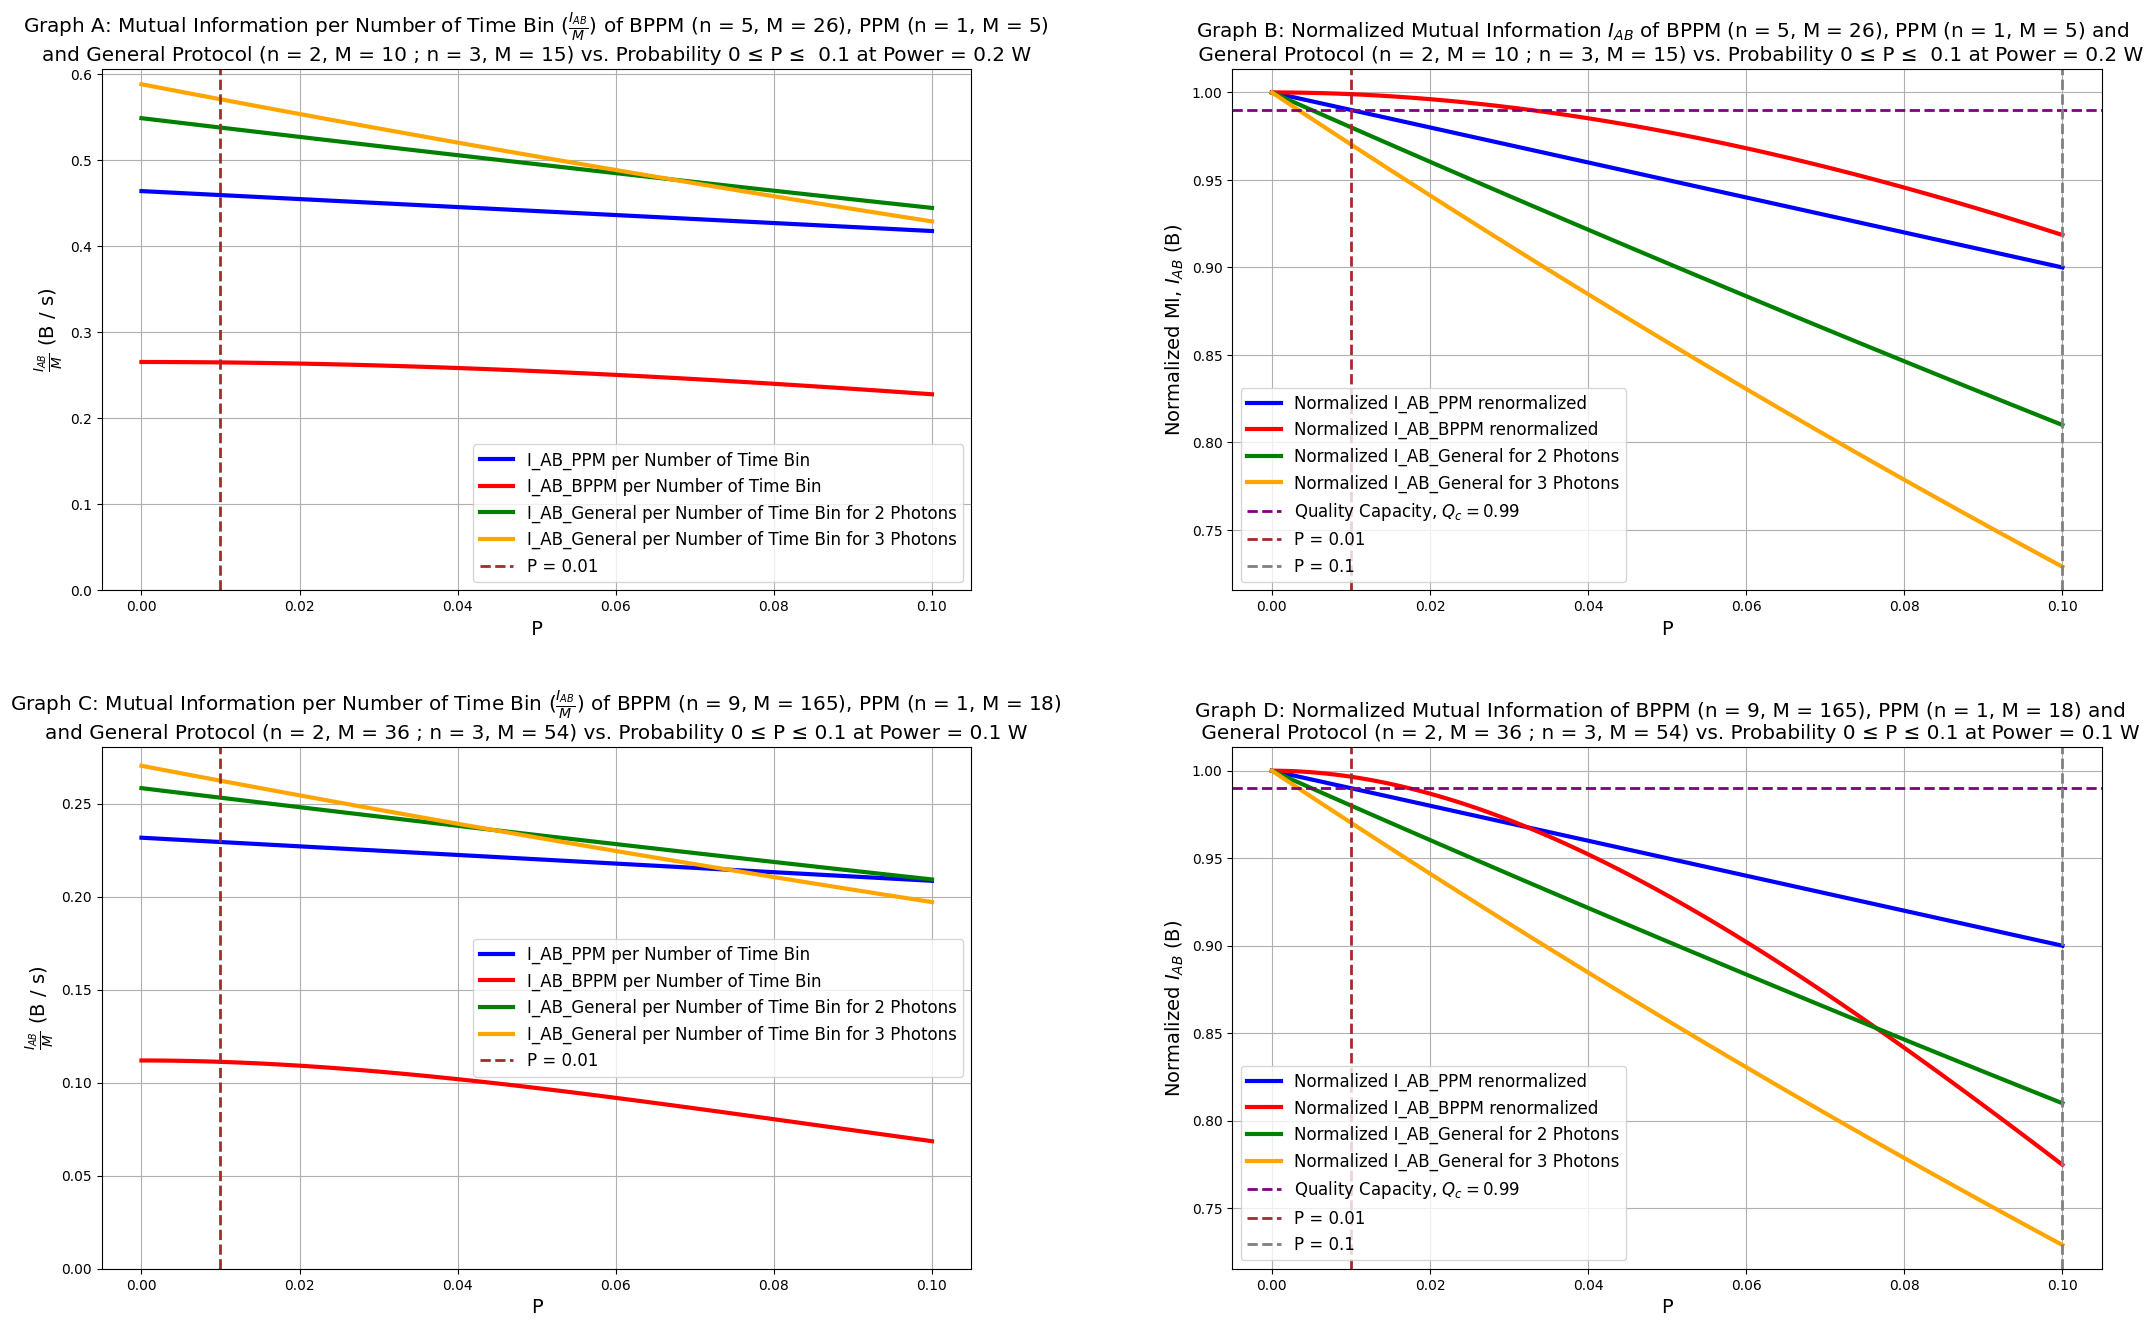

In [82]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(P_list_0_1, IperTimeBin_AB_PPM_list_5_0_1, label='I_AB_PPM per Number of Time Bin', color ='blue', linewidth=3, alpha=1)
axis[0, 0].plot(P_list_0_1, IperTimeBin_AB_BPPM_list_5_0_1, label='I_AB_BPPM per Number of Time Bin', color ='red', linewidth=3, alpha=1)
axis[0, 0].plot(P_list_0_1, IperTimeBin_AB_General_n2_list_5_0_1, label='I_AB_General per Number of Time Bin for 2 Photons', color ='green', linewidth=3, alpha=1)
axis[0, 0].plot(P_list_0_1, IperTimeBin_AB_General_n3_list_5_0_1, label='I_AB_General per Number of Time Bin for 3 Photons',color ='orange', linewidth=3, alpha=1)
axis[0, 0].set_title('Graph A: Mutual Information per Number of Time Bin ($\\frac{I_{AB}}{M}$) of BPPM (n = 5, M = 26), PPM (n = 1, M = 5) \nand General Protocol (n = 2, M = 10 ; n = 3, M = 15) vs. Probability 0 \u2264 P \u2264  0.1 at Power = 0.2 W', fontsize='x-large')
axis[0, 0].set_xlabel(' P ', fontsize = 14)
axis[0, 0].set_ylabel('$\\frac{I_{AB}}{M}$ (B / s)', fontsize=14)
axis[0, 0].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=2, alpha=1)
axis[0, 0].set_ylim(0)
axis[0, 0].grid(True)
axis[0, 0].legend(fontsize=12)

axis[0, 1].plot(P_list_0_1, Normalized_I_AB_PPM_list_5_0_1, label='Normalized I_AB_PPM renormalized', color ='blue', linewidth=3, alpha=1)
axis[0, 1].plot(P_list_0_1, Normalized_I_AB_BPPM_list_5_0_1, label='Normalized I_AB_BPPM renormalized', color ='red', linewidth=3, alpha=1)
axis[0, 1].plot(P_list_0_1, Normalized_I_AB_General_n2_list_5_0_1, label='Normalized I_AB_General for 2 Photons', color ='green', linewidth=3, alpha=1)
axis[0, 1].plot(P_list_0_1, Normalized_I_AB_General_n3_list_5_0_1, label='Normalized I_AB_General for 3 Photons',color ='orange', linewidth=3, alpha=1)
axis[0, 1].set_title('Graph B: Normalized Mutual Information $I_{AB}$ of BPPM (n = 5, M = 26), PPM (n = 1, M = 5) and  \n General Protocol (n = 2, M = 10 ; n = 3, M = 15) vs. Probability 0 \u2264 P \u2264  0.1 at Power = 0.2 W', fontsize='x-large')
axis[0, 1].set_xlabel('P', fontsize = 14)
axis[0, 1].set_ylabel('Normalized MI, $I_{AB}$ (B)', fontsize=14)
axis[0, 1].axhline(y=0.99, label='Quality Capacity, $Q_c = 0.99$', linestyle='--', color='purple', linewidth=2, alpha=1)
axis[0, 1].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=2, alpha=1)
axis[0, 1].axvline(x=0.1, label='P = 0.1', linestyle='--', color='grey', linewidth=2, alpha=1)
axis[0, 1].grid(True)
axis[0, 1].legend(fontsize=12)

axis[1, 0].plot(P_list_0_1, IperTimeBin_AB_PPM_list_9_0_1, label='I_AB_PPM per Number of Time Bin', color ='blue', linewidth=3, alpha=1)
axis[1, 0].plot(P_list_0_1, IperTimeBin_AB_BPPM_list_9_0_1, label='I_AB_BPPM per Number of Time Bin', color ='red', linewidth=3, alpha=1)
axis[1, 0].plot(P_list_0_1, IperTimeBin_AB_General_n2_list_9_0_1, label='I_AB_General per Number of Time Bin for 2 Photons', color ='green', linewidth=3, alpha=1)
axis[1, 0].plot(P_list_0_1, IperTimeBin_AB_General_n3_list_9_0_1, label='I_AB_General per Number of Time Bin for 3 Photons',color ='orange', linewidth=3, alpha=1)
axis[1, 0].set_title('Graph C: Mutual Information per Number of Time Bin ($\\frac{I_{AB}}{M}$) of BPPM (n = 9, M = 165), PPM (n = 1, M = 18) \nand General Protocol (n = 2, M = 36 ; n = 3, M = 54) vs. Probability 0 \u2264 P \u2264 0.1 at Power = 0.1 W', fontsize='x-large')
axis[1, 0].set_xlabel('P', fontsize = 14)
axis[1, 0].set_ylabel('$\\frac{I_{AB}}{M}$ (B / s)', fontsize=14)
axis[1, 0].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=2, alpha=1)
axis[1, 0].set_ylim(0)
axis[1, 0].grid(True)
axis[1, 0].legend(fontsize=12)

axis[1, 1].plot(P_list_0_1, Normalized_I_AB_PPM_list_9_0_1, label='Normalized I_AB_PPM renormalized', color ='blue', linewidth=3, alpha=1)
axis[1, 1].plot(P_list_0_1, Normalized_I_AB_BPPM_list_9_0_1, label='Normalized I_AB_BPPM renormalized', color ='red', linewidth=3, alpha=1)
axis[1, 1].plot(P_list_0_1, Normalized_I_AB_General_n2_list_9_0_1, label='Normalized I_AB_General for 2 Photons', color ='green', linewidth=3, alpha=1)
axis[1, 1].plot(P_list_0_1, Normalized_I_AB_General_n3_list_9_0_1, label='Normalized I_AB_General for 3 Photons',color ='orange', linewidth=3, alpha=1)
axis[1, 1].axhline(y=0.99, label='Quality Capacity, $Q_c = 0.99$', linestyle='--', color='purple', linewidth=2, alpha=1)
axis[1, 1].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=2, alpha=1)
axis[1, 1].axvline(x=0.1, label='P = 0.1', linestyle='--', color='grey', linewidth=2, alpha=1)
axis[1, 1].set_title('Graph D: Normalized Mutual Information of BPPM (n = 9, M = 165), PPM (n = 1, M = 18) and  \n General Protocol (n = 2, M = 36 ; n = 3, M = 54) vs. Probability 0 \u2264 P \u2264 0.1 at Power = 0.1 W', fontsize='x-large')
axis[1, 1].set_xlabel('P', fontsize = 14)
axis[1, 1].set_ylabel('Normalized $I_{AB}$ (B)', fontsize=14)

axis[1, 1].grid(True)
axis[1, 1].legend(fontsize=12)
figure.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
figure.set_facecolor("white")
plt.savefig('protocol/MIperTBVsProb.png', dpi=450, bbox_inches='tight')
plt.show()

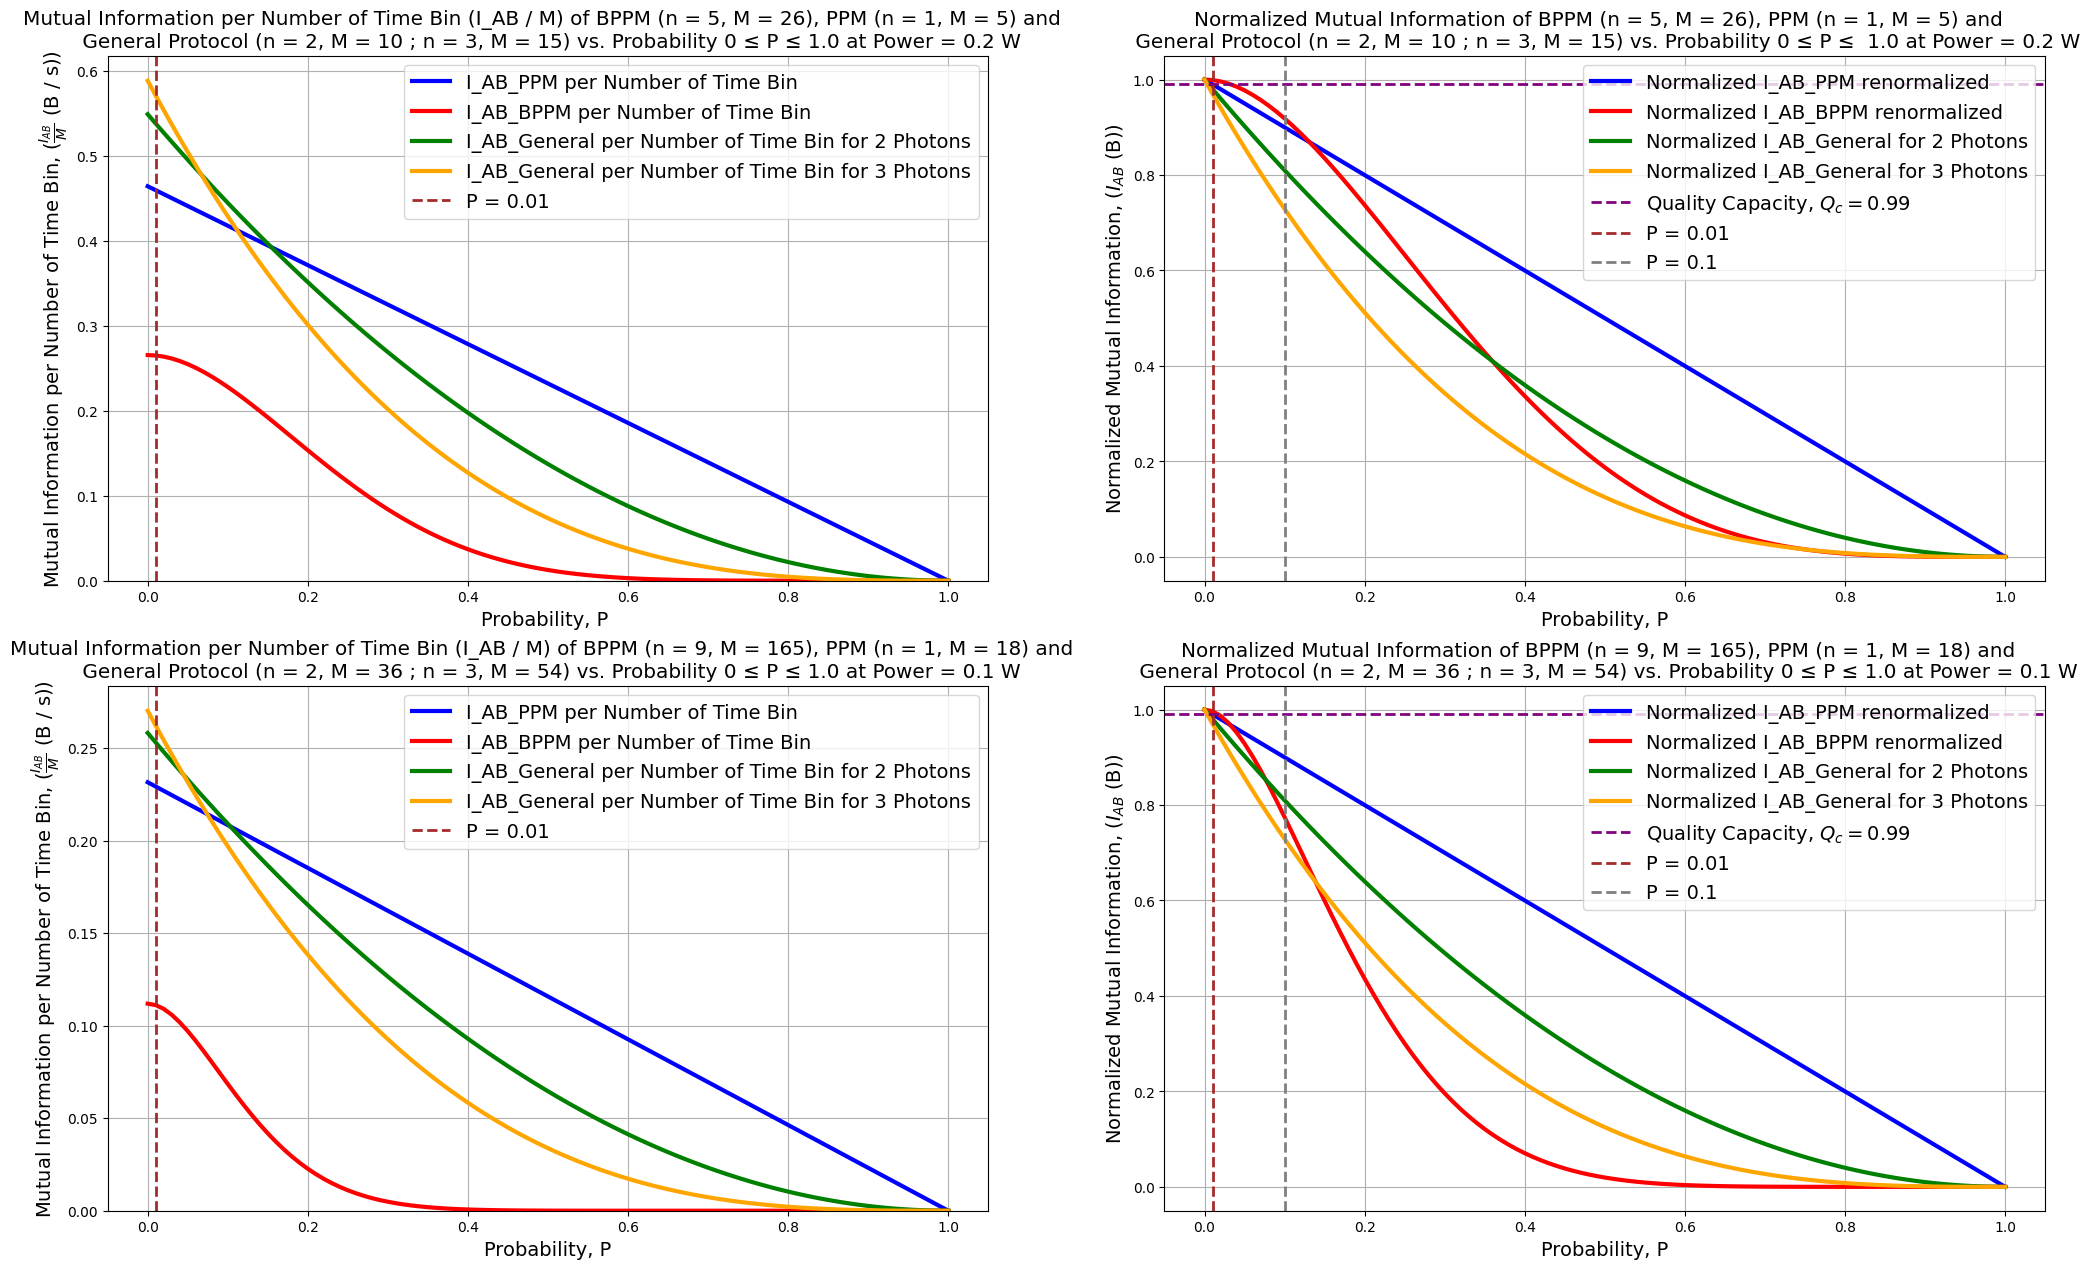

In [27]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(P_list_1, IperTimeBin_AB_PPM_list_5_1, label='I_AB_PPM per Number of Time Bin', color ='blue', linewidth=3, alpha=1)
axis[0, 0].plot(P_list_1, IperTimeBin_AB_BPPM_list_5_1, label='I_AB_BPPM per Number of Time Bin', color ='red', linewidth=3, alpha=1)
axis[0, 0].plot(P_list_1, IperTimeBin_AB_General_n2_list_5_1, label='I_AB_General per Number of Time Bin for 2 Photons', color ='green', linewidth=3, alpha=1)
axis[0, 0].plot(P_list_1, IperTimeBin_AB_General_n3_list_5_1, label='I_AB_General per Number of Time Bin for 3 Photons',color ='orange', linewidth=3, alpha=1)
axis[0, 0].set_title('Mutual Information per Number of Time Bin (I_AB / M) of BPPM (n = 5, M = 26), PPM (n = 1, M = 5) and  \n General Protocol (n = 2, M = 10 ; n = 3, M = 15) vs. Probability 0 \u2264 P \u2264 1.0 at Power = 0.2 W', fontsize='x-large')
axis[0, 0].set_xlabel('Probability, P ', fontsize = 14)
axis[0, 0].set_ylabel('Mutual Information per Number of Time Bin, ($\\frac{I_{AB}}{M}$ (B / s))', fontsize=14)
axis[0, 0].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=2, alpha=1)
axis[0, 0].set_ylim(0)
axis[0, 0].grid(True)
axis[0, 0].legend(fontsize=14)

axis[0, 1].plot(P_list_1, Normalized_I_AB_PPM_list_5_1, label='Normalized I_AB_PPM renormalized', color ='blue', linewidth=3, alpha=1)
axis[0, 1].plot(P_list_1, Normalized_I_AB_BPPM_list_5_1, label='Normalized I_AB_BPPM renormalized', color ='red', linewidth=3, alpha=1)
axis[0, 1].plot(P_list_1, Normalized_I_AB_General_n2_list_5_1, label='Normalized I_AB_General for 2 Photons', color ='green', linewidth=3, alpha=1)
axis[0, 1].plot(P_list_1, Normalized_I_AB_General_n3_list_5_1, label='Normalized I_AB_General for 3 Photons',color ='orange', linewidth=3, alpha=1)
axis[0, 1].axhline(y=0.99, label='Quality Capacity, $Q_c = 0.99$',linestyle='--', color='purple', linewidth=2, alpha=1)
axis[0, 1].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=2, alpha=1)
axis[0, 1].axvline(x=0.1, label='P = 0.1', linestyle='--', color='grey', linewidth=2, alpha=1)
axis[0, 1].set_title('Normalized Mutual Information of BPPM (n = 5, M = 26), PPM (n = 1, M = 5) and  \n General Protocol (n = 2, M = 10 ; n = 3, M = 15) vs. Probability 0 \u2264 P \u2264  1.0 at Power = 0.2 W', fontsize='x-large')
axis[0, 1].set_xlabel('Probability, P', fontsize = 14)
axis[0, 1].set_ylabel('Normalized Mutual Information, ($I_{AB}$ (B))', fontsize=14)
axis[0, 1].grid(True)
axis[0, 1].legend(fontsize=14)

axis[1, 0].plot(P_list_1, IperTimeBin_AB_PPM_list_9_1, label='I_AB_PPM per Number of Time Bin', color ='blue', linewidth=3, alpha=1)
axis[1, 0].plot(P_list_1, IperTimeBin_AB_BPPM_list_9_1, label='I_AB_BPPM per Number of Time Bin', color ='red', linewidth=3, alpha=1)
axis[1, 0].plot(P_list_1, IperTimeBin_AB_General_n2_list_9_1, label='I_AB_General per Number of Time Bin for 2 Photons', color ='green', linewidth=3, alpha=1)
axis[1, 0].plot(P_list_1, IperTimeBin_AB_General_n3_list_9_1, label='I_AB_General per Number of Time Bin for 3 Photons',color ='orange', linewidth=3, alpha=1)
axis[1, 0].set_title('Mutual Information per Number of Time Bin (I_AB / M) of BPPM (n = 9, M = 165), PPM (n = 1, M = 18) and  \n General Protocol (n = 2, M = 36 ; n = 3, M = 54) vs. Probability 0 \u2264 P \u2264 1.0 at Power = 0.1 W', fontsize='x-large')
axis[1, 0].set_xlabel('Probability, P', fontsize = 14)
axis[1, 0].set_ylabel('Mutual Information per Number of Time Bin, ($\\frac{I_{AB}}{M}$ (B / s))', fontsize=14)
axis[1, 0].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=2, alpha=1)
axis[1, 0].set_ylim(0)
axis[1, 0].grid(True)
axis[1, 0].legend(fontsize=14)

axis[1, 1].plot(P_list_1, Normalized_I_AB_PPM_list_9_1, label='Normalized I_AB_PPM renormalized', color ='blue', linewidth=3, alpha=1)
axis[1, 1].plot(P_list_1, Normalized_I_AB_BPPM_list_9_1, label='Normalized I_AB_BPPM renormalized', color ='red', linewidth=3, alpha=1)
axis[1, 1].plot(P_list_1, Normalized_I_AB_General_n2_list_9_1, label='Normalized I_AB_General for 2 Photons', color ='green', linewidth=3, alpha=1)
axis[1, 1].plot(P_list_1, Normalized_I_AB_General_n3_list_9_1, label='Normalized I_AB_General for 3 Photons',color ='orange', linewidth=3, alpha=1)
axis[1, 1].axhline(y=0.99, label='Quality Capacity, $Q_c = 0.99$', linestyle='--', color='purple', linewidth=2, alpha=1)
axis[1, 1].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=2, alpha=1)
axis[1, 1].axvline(x=0.1, label='P = 0.1', linestyle='--', color='grey', linewidth=2, alpha=1)
axis[1, 1].set_title('Normalized Mutual Information of BPPM (n = 9, M = 165), PPM (n = 1, M = 18) and  \n General Protocol (n = 2, M = 36 ; n = 3, M = 54) vs. Probability 0 \u2264 P \u2264 1.0 at Power = 0.1 W', fontsize='x-large')
axis[1, 1].set_xlabel('Probability, P', fontsize = 14)
axis[1, 1].set_ylabel('Normalized Mutual Information, ($I_{AB}$ (B))', fontsize=14)
axis[1, 1].grid(True)
axis[1, 1].legend(fontsize=14)

figure.set_facecolor("white")
# plt.savefig('protocol/MI_Power_4schemes_Plot.png', dpi=450, bbox_inches='tight')
plt.show()

## Mutual Information per Photon

### P = 0

In [28]:
IperPhoton_AB_BPPM_list_0 = []
IperTimeBin_AB_BPPM_list_0 = []
IperPhotonTimeBin_AB_BPPM_list_0 = []
IperPhoton_AB_BPPM_list_0_1 = []
IperTimeBin_AB_BPPM_list_0_1 = []
IperPhotonTimeBin_AB_BPPM_list_0_1 = []

TimeBin_BPPM_list_0 = []
TimeBin_BPPM_list_0_1 = []

for n in range(3,8):
    P = 0
    M = compute_N(n)
    TimeBin_BPPM_list_0.append(M)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    # P_AB_BPPM_list_9.append(P_AB_BPPM_val)
    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)

    IperPhoton_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ n
    IperPhoton_AB_BPPM_list_0.append(IperPhoton_AB_BPPM_val)

    IperTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ M
    IperTimeBin_AB_BPPM_list_0.append(IperTimeBin_AB_BPPM_val)

    IperPhotonTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ (n * M)
    IperPhotonTimeBin_AB_BPPM_list_0.append(IperPhotonTimeBin_AB_BPPM_val)

for n in range(3,8):
    P = 0.1
    M = compute_N(n)
    TimeBin_BPPM_list_0_1.append(M)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    # P_AB_BPPM_list_9.append(P_AB_BPPM_val)

    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    # H_AB_BPPM_list_9.append(H_AB_BPPM_val)

    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    # I_AB_BPPM_list_9.append(I_AB_BPPM_val)

    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    # Normalized_I_AB_BPPM_list_9.append(Normalized_I_AB_BPPM_val)

    IperPhoton_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ n
    IperPhoton_AB_BPPM_list_0_1.append(IperPhoton_AB_BPPM_val)

    IperTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ M
    IperTimeBin_AB_BPPM_list_0_1.append(IperTimeBin_AB_BPPM_val)

    IperPhotonTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ (n * M)
    IperPhotonTimeBin_AB_BPPM_list_0_1.append(IperPhotonTimeBin_AB_BPPM_val)

In [29]:
print(TimeBin_BPPM_list_0_1[-1]), print(TimeBin_BPPM_list_0_1)

75
[7, 14, 26, 46, 75]


(None, None)

In [30]:
print(TimeBin_BPPM_list_0_1[-1]), print(TimeBin_BPPM_list_0_1)

75
[7, 14, 26, 46, 75]


(None, None)

In [31]:
I_AB_PPM_list_0 = []
I_AB_PPM_list_0_1 = []

IperPhoton_AB_PPM_list_0 = []
IperTimeBin_AB_PPM_list_0 = []
IperPhotonTimeBin_AB_PPM_list_0 = []

IperPhoton_AB_PPM_list_0_1 = []
IperTimeBin_AB_PPM_list_0_1 = []
IperPhotonTimeBin_AB_PPM_list_0_1 = []

TimeBin_PPM_list_0 = []
TimeBin_PPM_list_0_1 = []

for M_PPM in range(4,77):
    P = 0
    n_PPM = 1
    TimeBin_PPM_list_0.append(M_PPM)
    P_D_PPM_val = P_D_PPM(n_PPM,M_PPM, P, 0, 0, 0)
    P_AB_PPM_val = P_AB_PPM(M_PPM) # P_AB_PPM(n, P)
    P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
    P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)
    H_A_PPM_val = H_A_PPM(P_AB_PPM_val)
    H_B_PPM_val = H_B_PPM(P_AB_PPM_val)
    H_AB_PPM_val = H_AB_PPM(P_AB_PPM_val)
    I_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val)
    I_AB_PPM_list_0.append(I_AB_PPM_val) 

    Normalized_I_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val) / I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, 0)

    IperPhoton_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val) / n_PPM
    IperPhoton_AB_PPM_list_0.append(IperPhoton_AB_PPM_val)

    IperTimeBin_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val)/ M_PPM
    IperTimeBin_AB_PPM_list_0.append(IperTimeBin_AB_PPM_val)

    IperPhotonTimeBin_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val)/ (n_PPM * M_PPM)
    IperPhotonTimeBin_AB_PPM_list_0.append(IperPhotonTimeBin_AB_PPM_val)

for M_PPM in range(4,77):
    P = 0.1
    n_PPM = 1
    TimeBin_PPM_list_0_1.append(M_PPM)
    P_D_PPM_val = P_D_PPM(n_PPM,M_PPM, P, 0, l=0,a=0)   
    P_AB_PPM_val = P_AB_PPM(M_PPM) # P_AB_PPM(n, P)
    P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
    P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)
    H_A_PPM_val = H_A_PPM(P_AB_PPM_val)
    H_B_PPM_val = H_B_PPM(P_AB_PPM_val)
    H_AB_PPM_val = H_AB_PPM(P_AB_PPM_val)
    I_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val)
    I_AB_PPM_list_0.append(I_AB_PPM_val) 
    
    Normalized_I_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val) / I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, 0)

    IperPhoton_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val) / n_PPM
    IperPhoton_AB_PPM_list_0_1.append(IperPhoton_AB_PPM_val)

    IperTimeBin_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val)/ M_PPM
    IperTimeBin_AB_PPM_list_0_1.append(IperTimeBin_AB_PPM_val)

    IperPhotonTimeBin_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val)/ (n_PPM * M_PPM)
    IperPhotonTimeBin_AB_PPM_list_0_1.append(IperPhotonTimeBin_AB_PPM_val)

In [32]:
print(TimeBin_PPM_list_0_1[-1]), print(TimeBin_PPM_list_0_1)

76
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]


(None, None)

In [33]:
print(TimeBin_PPM_list_0[-1]), print(TimeBin_PPM_list_0)

76
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]


(None, None)

In [34]:
I_AB_OOK_list_0 = []
I_AB_OOK_list_0_1 = []

IperPhoton_AB_OOK_list_0 = []
IperTimeBin_AB_OOK_list_0 = []
IperPhotonTimeBin_AB_OOK_list_0 = []

IperPhoton_AB_OOK_list_0_1 = []
IperTimeBin_AB_OOK_list_0_1 = []
IperPhotonTimeBin_AB_OOK_list_0_1 = []

TimeBin_OOK_list_0 = []
TimeBin_OOK_list_0_1 = []

for n_OOK in range(3,39):
    P = 0
    M_OOK = compute_M_OOK(n_OOK)
    TimeBin_OOK_list_0.append(M_OOK)
    P_D_OOK_val = P_D_OOK(n_OOK, M_OOK, P, 0, 0, 0)
    P_AB_OOK_val = P_AB_OOK_diagonal(M_OOK)
    H_AB_OOK_val = H_AB_OOK_diagonal(P_AB_OOK_val, M_OOK)
    I_AB_OOK_val = I_AB_OOK_diagonal(P_AB_OOK_val, M_OOK, P_D_OOK_val)
    I_AB_OOK_list_0.append(I_AB_OOK_val)

    IperPhoton_AB_OOK_val = I_AB_OOK_diagonal(P_AB_OOK_val, M_OOK, P_D_OOK_val) / n_OOK
    IperPhoton_AB_OOK_list_0.append(IperPhoton_AB_OOK_val)

    IperTimeBin_AB_OOK_val = I_AB_OOK_diagonal(P_AB_OOK_val, M_OOK, P_D_OOK_val) / M_OOK
    IperTimeBin_AB_OOK_list_0.append(IperTimeBin_AB_OOK_val)

    IperPhotonTimeBin_AB_OOK_val = I_AB_OOK_diagonal(P_AB_OOK_val, M_OOK, P_D_OOK_val)/ (n_OOK * M_OOK)
    IperPhotonTimeBin_AB_OOK_list_0.append(IperPhotonTimeBin_AB_OOK_val)

for n_OOK in range(3,39):
    P = 0.1
    M_OOK = compute_M_OOK(n_OOK)
    TimeBin_OOK_list_0_1.append(M_OOK)
    P_D_OOK_val = P_D_OOK(n_OOK, M_OOK, P, 0, 0, 0)
    P_AB_OOK_val = P_AB_OOK_diagonal(M_OOK)
    # H_A_OOK_val = H_A_OOK(P_AB_OOK_val)
    # H_B_OOK_val = H_B_OOK(P_AB_OOK_val)
    H_AB_OOK_val = H_AB_OOK_diagonal(P_AB_OOK_val, M_OOK)
    I_AB_OOK_val = I_AB_OOK_diagonal(P_AB_OOK_val, M_OOK, P_D_OOK_val)
    I_AB_OOK_list_0_1.append(I_AB_OOK_val)

    IperPhoton_AB_OOK_val = I_AB_OOK_diagonal(P_AB_OOK_val, M_OOK, P_D_OOK_val) / n_OOK
    IperPhoton_AB_OOK_list_0_1.append(IperPhoton_AB_OOK_val)

    IperTimeBin_AB_OOK_val = I_AB_OOK_diagonal(P_AB_OOK_val, M_OOK, P_D_OOK_val) / M_OOK
    IperTimeBin_AB_OOK_list_0_1.append(IperTimeBin_AB_OOK_val)

    IperPhotonTimeBin_AB_OOK_val = I_AB_OOK_diagonal(P_AB_OOK_val, M_OOK, P_D_OOK_val)/ (n_OOK * M_OOK)
    IperPhotonTimeBin_AB_OOK_list_0_1.append(IperPhotonTimeBin_AB_OOK_val)

In [35]:
print(TimeBin_OOK_list_0)

[6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76]


In [36]:
print(TimeBin_OOK_list_0_1)

[6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76]


### Plot on Mutual Information per Photon Vs Time Bin


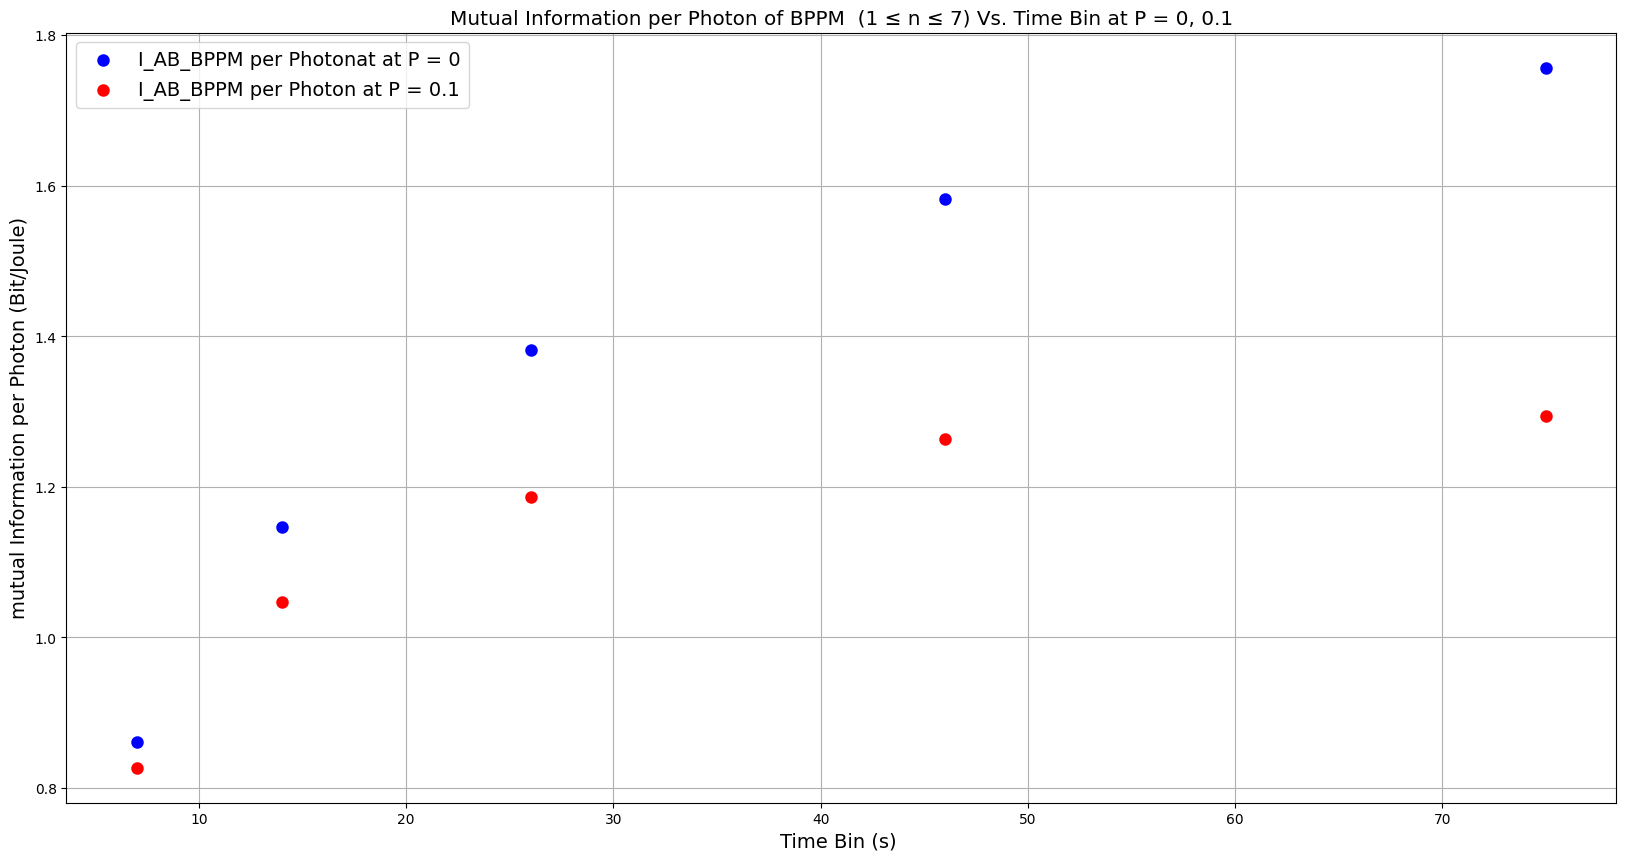

In [37]:
figure, axis = plt.subplots(1,1,figsize=(20,10))

plt.scatter(TimeBin_BPPM_list_0, IperPhoton_AB_BPPM_list_0, label='I_AB_BPPM per Photonat at P = 0', color ='blue', linewidth=3, alpha=1)
plt.scatter(TimeBin_BPPM_list_0_1, IperPhoton_AB_BPPM_list_0_1, label='I_AB_BPPM per Photon at P = 0.1', color ='red', linewidth=3, alpha=1)
plt.title('Mutual Information per Photon of BPPM  (1 \u2264 n \u2264 7) Vs. Time Bin at P = 0, 0.1', fontsize='x-large')
plt.xlabel('Time Bin (s) ', fontsize = 14)
plt.ylabel('mutual Information per Photon (Bit/Joule)', fontsize = 14)
plt.grid(True)
plt.legend(fontsize=14)

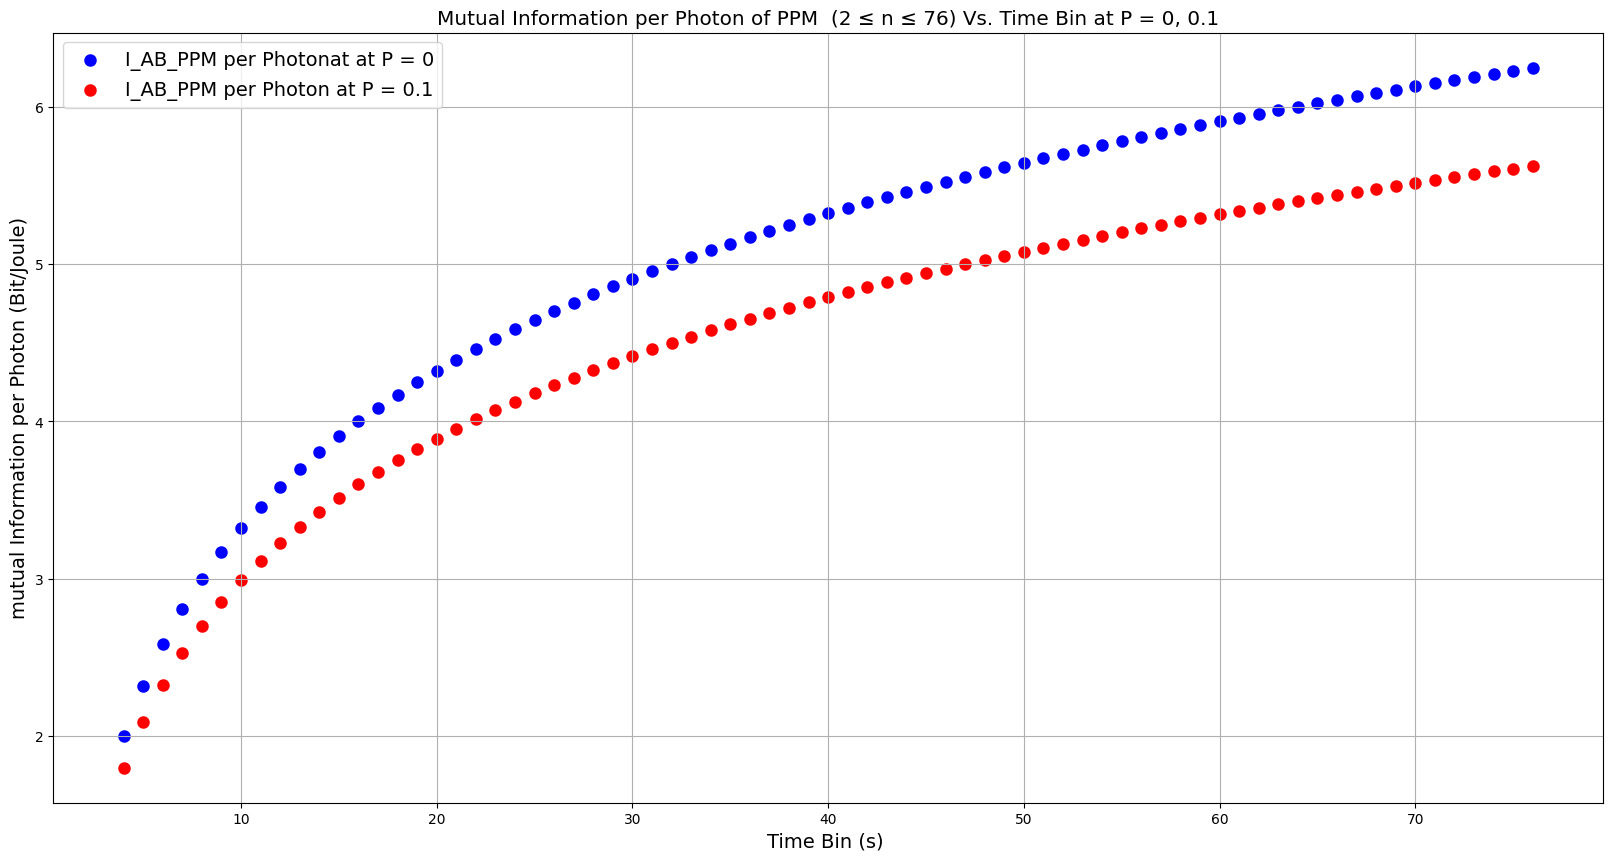

In [38]:
figure, axis = plt.subplots(1,1,figsize=(20,10))

plt.scatter(TimeBin_PPM_list_0, IperPhoton_AB_PPM_list_0, label='I_AB_PPM per Photonat at P = 0', color ='blue', linewidth=3, alpha=1)
plt.scatter(TimeBin_PPM_list_0_1, IperPhoton_AB_PPM_list_0_1, label='I_AB_PPM per Photon at P = 0.1', color ='red', linewidth=3, alpha=1)
plt.title('Mutual Information per Photon of PPM  (2 \u2264 n \u2264 76) Vs. Time Bin at P = 0, 0.1', fontsize='x-large')
plt.xlabel('Time Bin (s) ', fontsize = 14)
plt.ylabel('mutual Information per Photon (Bit/Joule)', fontsize = 14)
plt.grid(True)
plt.legend(fontsize=14)

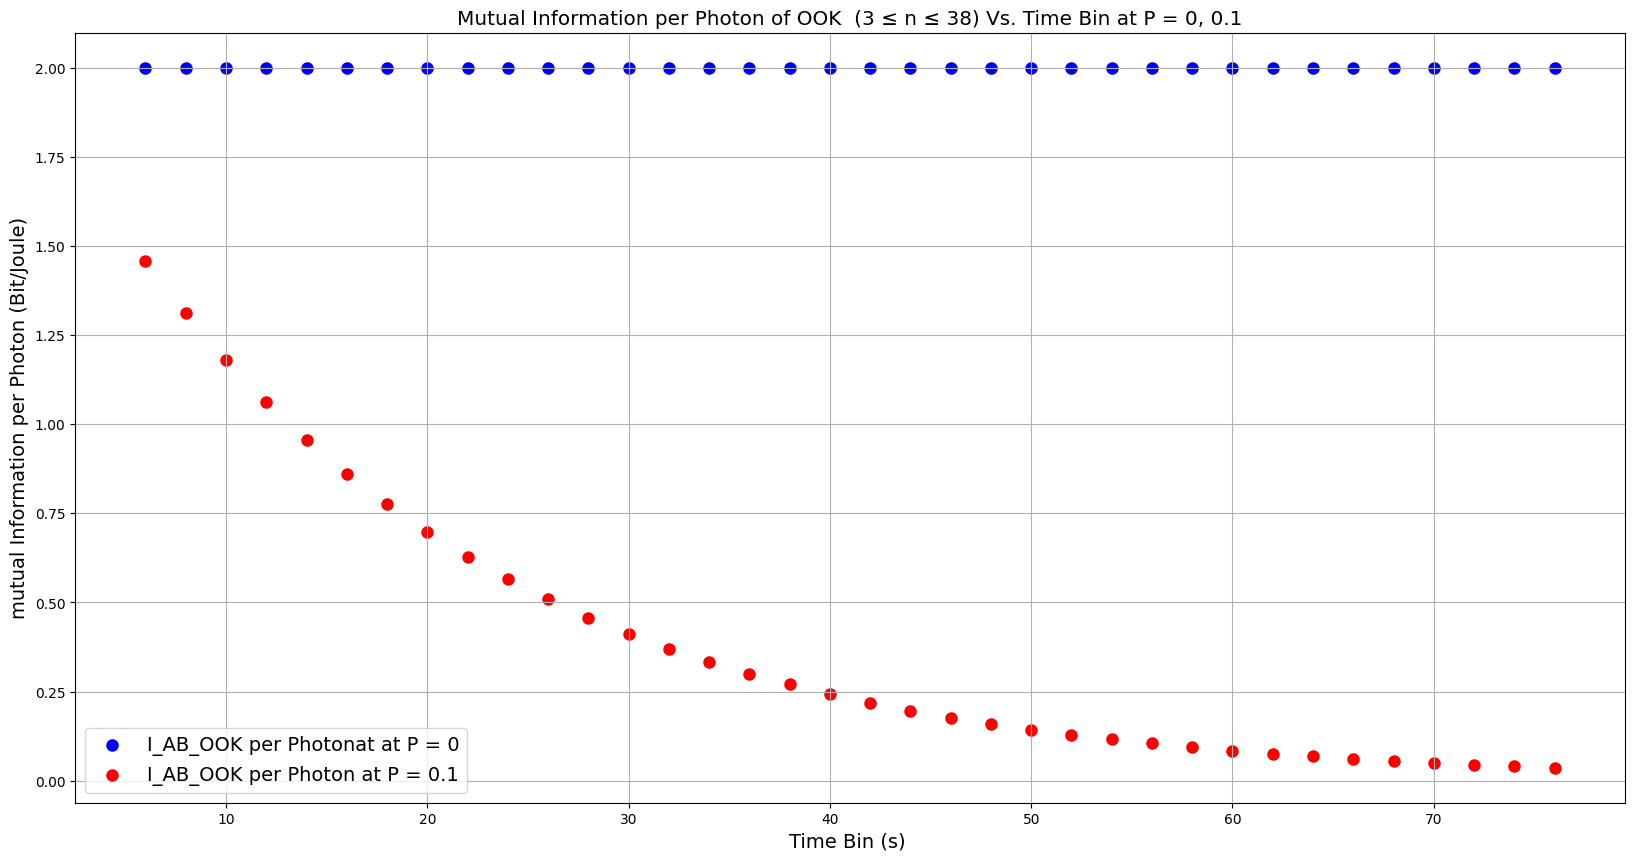

In [39]:
figure, axis = plt.subplots(1,1,figsize=(20,10))

plt.scatter(TimeBin_OOK_list_0, IperPhoton_AB_OOK_list_0, label='I_AB_OOK per Photonat at P = 0', color ='blue', linewidth=3, alpha=1)
plt.scatter(TimeBin_OOK_list_0_1, IperPhoton_AB_OOK_list_0_1, label='I_AB_OOK per Photon at P = 0.1', color ='red', linewidth=3, alpha=1)
plt.title('Mutual Information per Photon of OOK  (3 \u2264 n \u2264 38) Vs. Time Bin at P = 0, 0.1', fontsize='x-large')
plt.xlabel('Time Bin (s) ', fontsize = 14)
plt.ylabel('mutual Information per Photon (Bit/Joule)', fontsize = 14)
plt.grid(True)
plt.legend(fontsize=14)

### Plot on Mutual Information per Time Bin Vs Time Bin


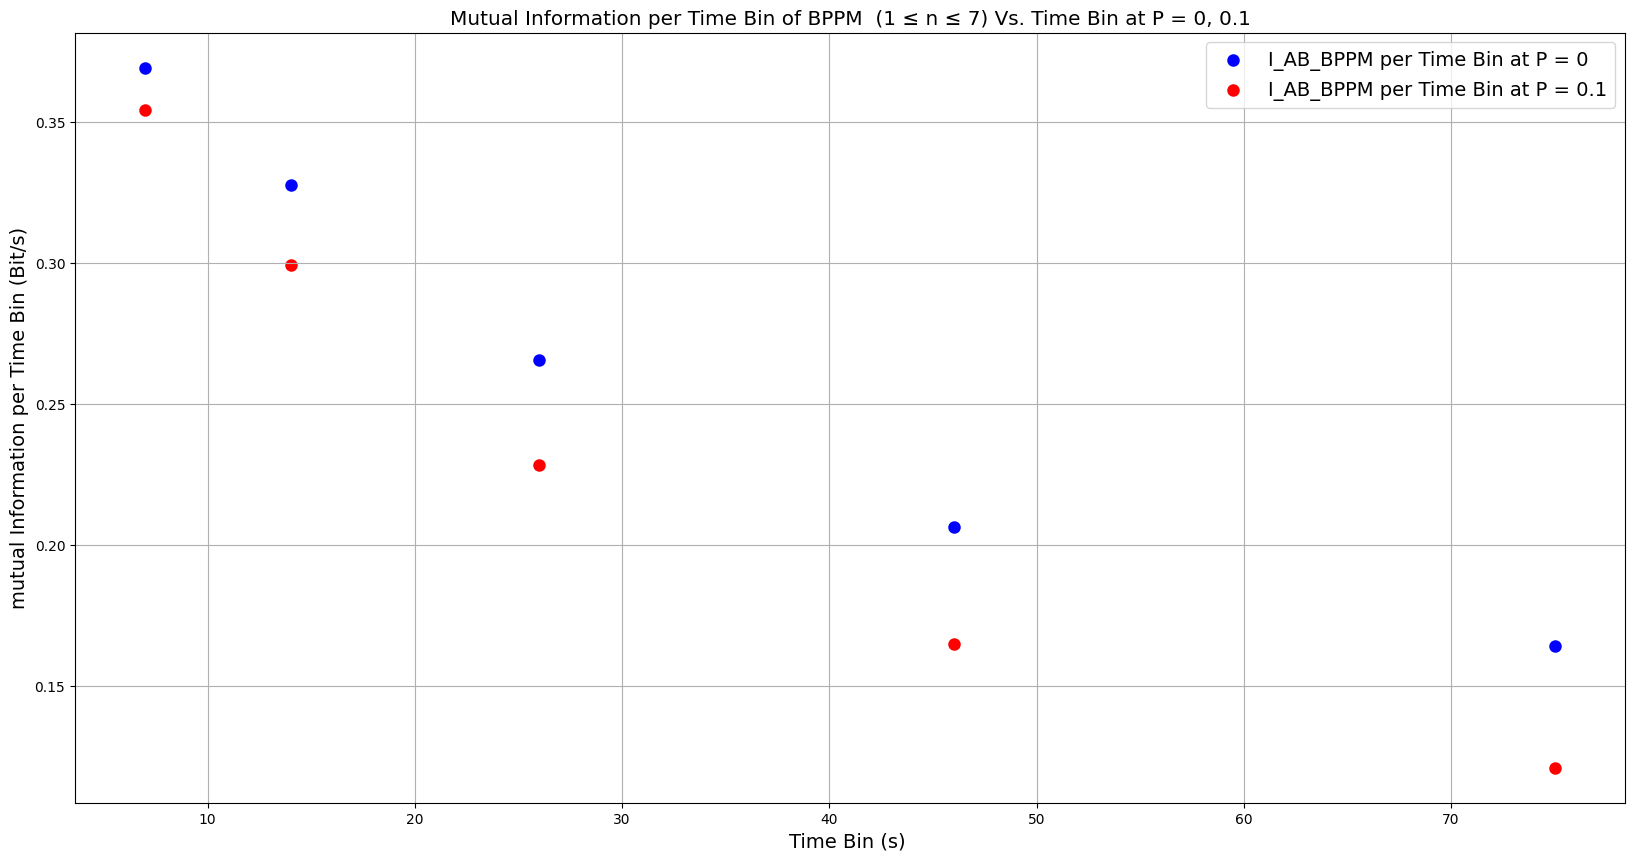

In [40]:
figure, axis = plt.subplots(1,1,figsize=(20,10))

plt.scatter(TimeBin_BPPM_list_0, IperTimeBin_AB_BPPM_list_0, label='I_AB_BPPM per Time Bin at P = 0', color ='blue', linewidth=3, alpha=1)
plt.scatter(TimeBin_BPPM_list_0_1, IperTimeBin_AB_BPPM_list_0_1, label='I_AB_BPPM per Time Bin at P = 0.1', color ='red', linewidth=3, alpha=1)
# plt.plot(P_list, I_AB_General_n2_list_5, label='I_AB_General for 2 Photons', color ='green', linewidth=3, alpha=1)
# plt.plot(P_list, I_AB_General_n3_list_5, label='I_AB_General for 3 Photons',color ='orange', linewidth=3, alpha=1)
plt.title('Mutual Information per Time Bin of BPPM  (1 \u2264 n \u2264 7) Vs. Time Bin at P = 0, 0.1', fontsize='x-large')
plt.xlabel('Time Bin (s) ', fontsize = 14)
plt.ylabel('mutual Information per Time Bin (Bit/s)', fontsize = 14)
plt.grid(True)
plt.legend(fontsize=14)

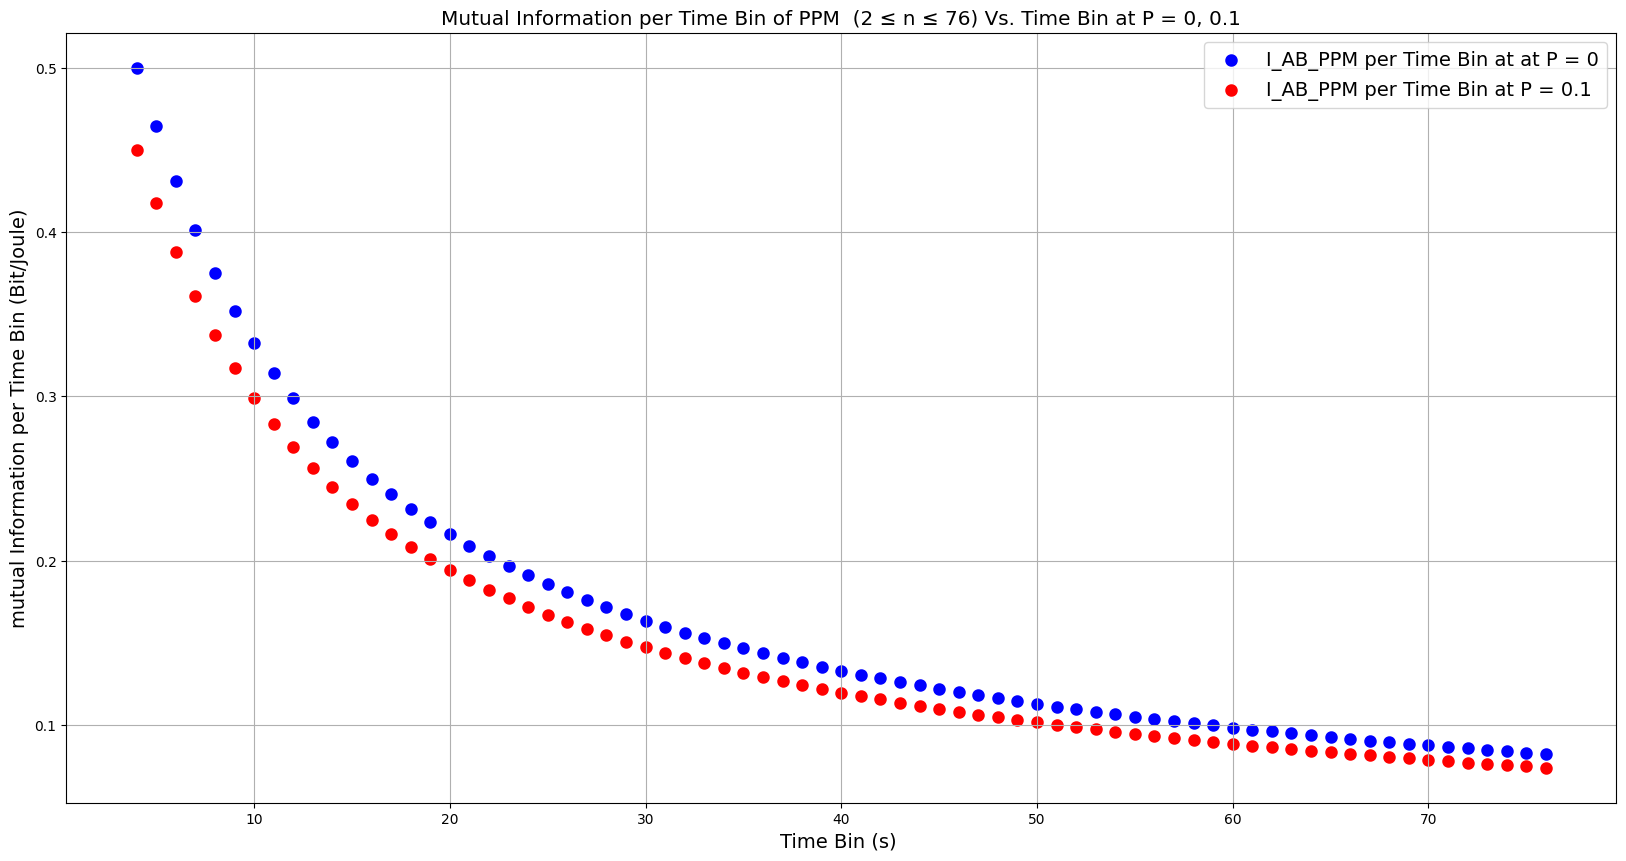

In [41]:
figure, axis = plt.subplots(1,1,figsize=(20,10))

plt.scatter(TimeBin_PPM_list_0, IperTimeBin_AB_PPM_list_0, label='I_AB_PPM per Time Bin at at P = 0', color ='blue', linewidth=3, alpha=1)
plt.scatter(TimeBin_PPM_list_0_1, IperTimeBin_AB_PPM_list_0_1, label='I_AB_PPM per Time Bin at P = 0.1', color ='red', linewidth=3, alpha=1)
plt.title('Mutual Information per Time Bin of PPM  (2 \u2264 n \u2264 76) Vs. Time Bin at P = 0, 0.1', fontsize='x-large')
plt.xlabel('Time Bin (s) ', fontsize = 14)
plt.ylabel('mutual Information per Time Bin (Bit/Joule)', fontsize = 14)
plt.grid(True)
plt.legend(fontsize=14)

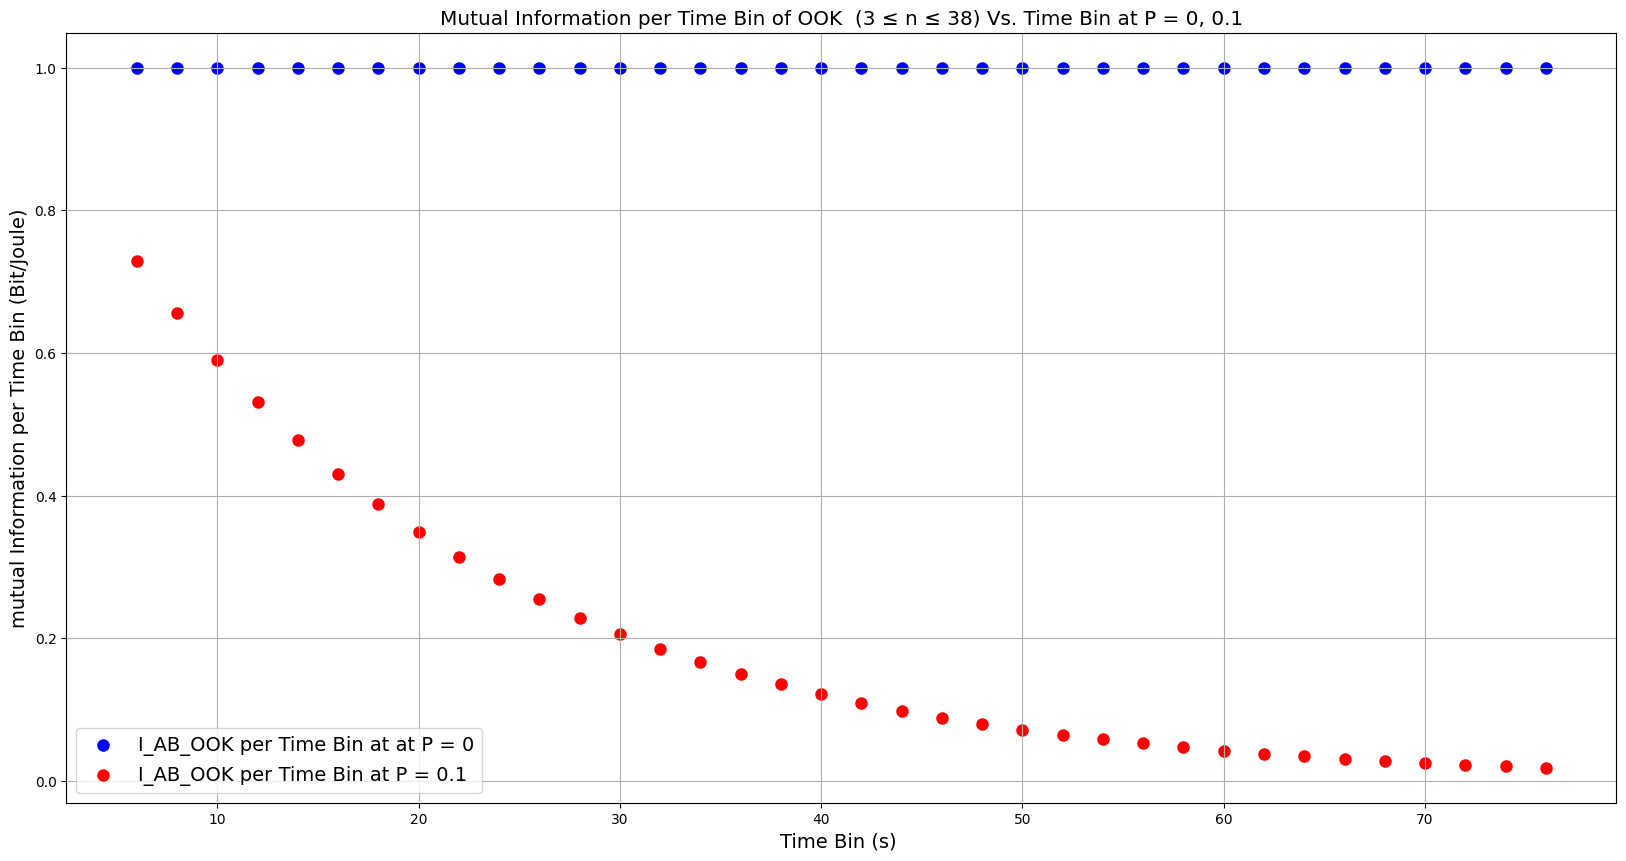

In [42]:
figure, axis = plt.subplots(1,1,figsize=(20,10))

plt.scatter(TimeBin_OOK_list_0, IperTimeBin_AB_OOK_list_0, label='I_AB_OOK per Time Bin at at P = 0', color ='blue', linewidth=3, alpha=1)
plt.scatter(TimeBin_OOK_list_0_1, IperTimeBin_AB_OOK_list_0_1, label='I_AB_OOK per Time Bin at P = 0.1', color ='red', linewidth=3, alpha=1)
# plt.plot(P_list, I_AB_General_n2_list_5, label='I_AB_General for 2 Photons', color ='green', linewidth=3, alpha=1)
# plt.plot(P_list, I_AB_General_n3_list_5, label='I_AB_General for 3 Photons',color ='orange', linewidth=3, alpha=1)
plt.title('Mutual Information per Time Bin of OOK  (3 \u2264 n \u2264 38) Vs. Time Bin at P = 0, 0.1', fontsize='x-large')
plt.xlabel('Time Bin (s) ', fontsize = 14)
plt.ylabel('mutual Information per Time Bin (Bit/Joule)', fontsize = 14)
plt.grid(True)
plt.legend(fontsize=14)

## Combined Plot

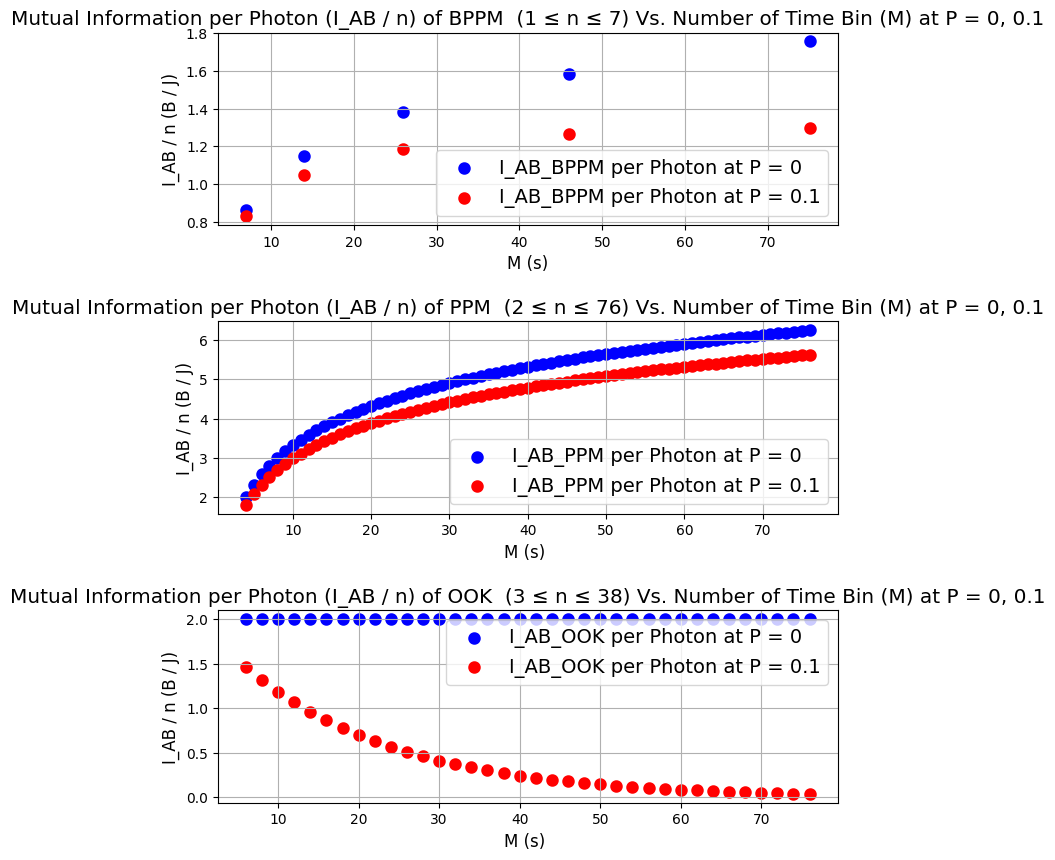

In [43]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

axs[0].scatter(TimeBin_BPPM_list_0, IperPhoton_AB_BPPM_list_0, label='I_AB_BPPM per Photon at P = 0', color ='blue', linewidth=3, alpha=1)
axs[0].scatter(TimeBin_BPPM_list_0_1, IperPhoton_AB_BPPM_list_0_1, label='I_AB_BPPM per Photon at P = 0.1', color ='red', linewidth=3, alpha=1)
axs[0].set_title('Mutual Information per Photon (I_AB / n) of BPPM  (1 \u2264 n \u2264 7) Vs. Number of Time Bin (M) at P = 0, 0.1', fontsize='x-large')
axs[0].set_xlabel('M (s)', fontsize = 12)
axs[0].set_ylabel('I_AB / n (B / J)', fontsize = 12)
axs[0].grid(True)
axs[0].legend(fontsize=14)

axs[1].scatter(TimeBin_PPM_list_0, IperPhoton_AB_PPM_list_0, label='I_AB_PPM per Photon at P = 0', color ='blue', linewidth=3, alpha=1)
axs[1].scatter(TimeBin_PPM_list_0_1, IperPhoton_AB_PPM_list_0_1, label='I_AB_PPM per Photon at P = 0.1', color ='red', linewidth=3, alpha=1)
axs[1].set_title('Mutual Information per Photon (I_AB / n) of PPM  (2 \u2264 n \u2264 76) Vs. Number of Time Bin (M) at P = 0, 0.1', fontsize='x-large')
axs[1].set_xlabel('M (s) ', fontsize = 12)
axs[1].set_ylabel('I_AB / n (B / J)', fontsize = 12)
axs[1].grid(True)
axs[1].legend(fontsize=14)

axs[2].scatter(TimeBin_OOK_list_0, IperPhoton_AB_OOK_list_0, label='I_AB_OOK per Photon at P = 0', color ='blue', linewidth=3, alpha=1)
axs[2].scatter(TimeBin_OOK_list_0_1, IperPhoton_AB_OOK_list_0_1, label='I_AB_OOK per Photon at P = 0.1', color ='red', linewidth=3, alpha=1)
axs[2].set_title('Mutual Information per Photon (I_AB / n) of OOK  (3 \u2264 n \u2264 38) Vs. Number of Time Bin (M) at P = 0, 0.1', fontsize='x-large')
axs[2].set_xlabel('M (s) ', fontsize = 12)
axs[2].set_ylabel('I_AB / n (B / J)', fontsize = 12)
axs[2].grid(True)
axs[2].legend(fontsize=14)

plt.subplots_adjust(hspace=0.5)
figure.set_facecolor("white")
plt.show()

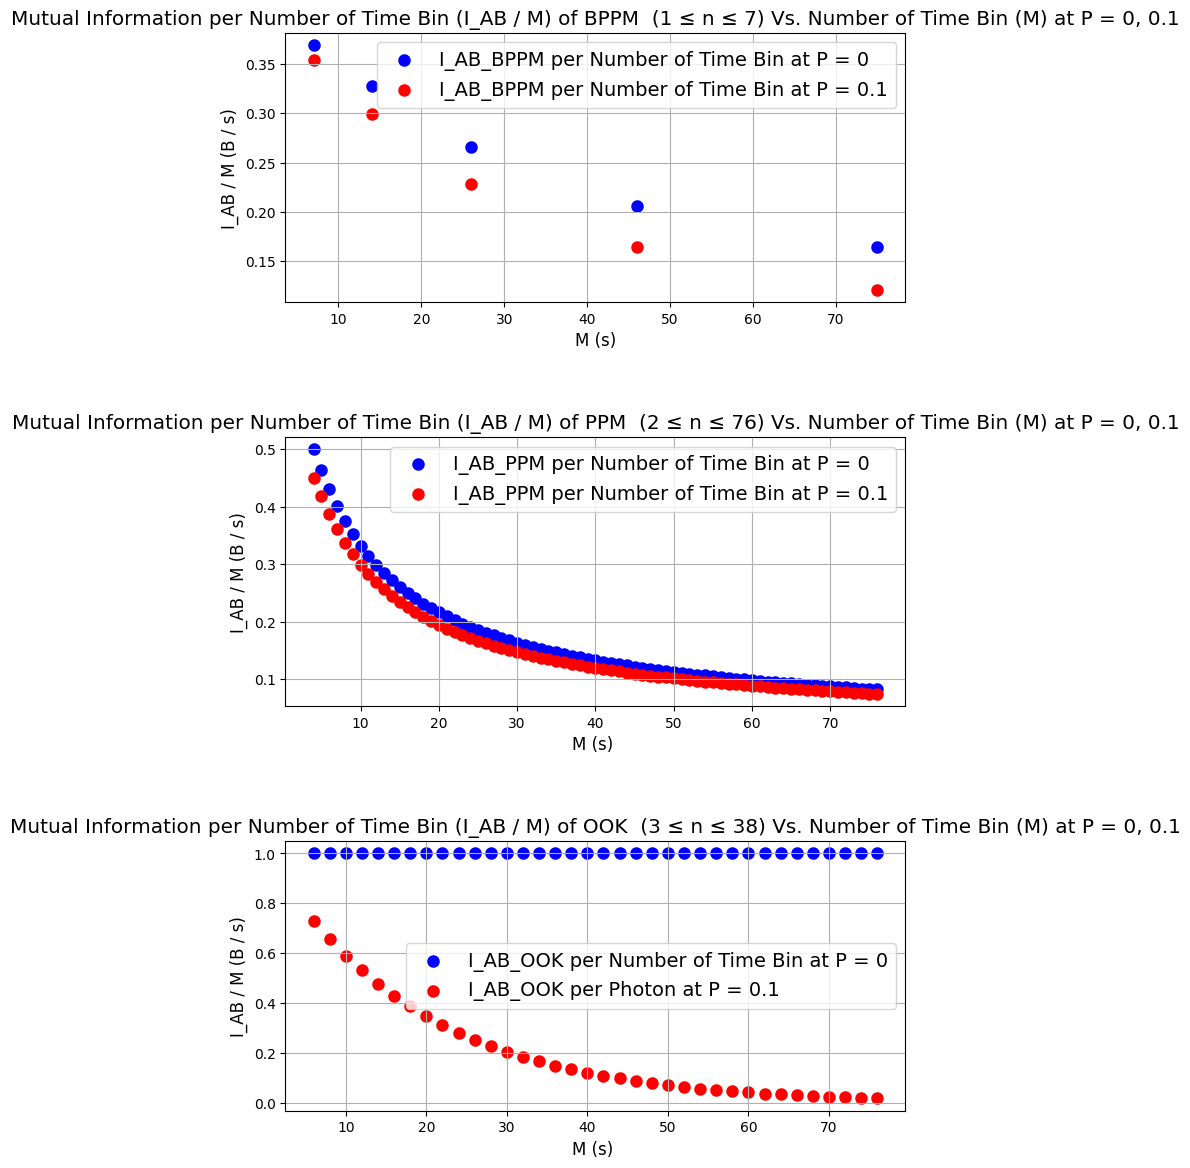

In [44]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 14))

axs[0].scatter(TimeBin_BPPM_list_0, IperTimeBin_AB_BPPM_list_0, label='I_AB_BPPM per Number of Time Bin at P = 0', color ='blue', linewidth=3, alpha=1)
axs[0].scatter(TimeBin_BPPM_list_0_1, IperTimeBin_AB_BPPM_list_0_1, label='I_AB_BPPM per Number of Time Bin at P = 0.1', color ='red', linewidth=3, alpha=1)
axs[0].set_title('Mutual Information per Number of Time Bin (I_AB / M) of BPPM  (1 \u2264 n \u2264 7) Vs. Number of Time Bin (M) at P = 0, 0.1', fontsize='x-large')
axs[0].set_xlabel('M (s)', fontsize = 12)
axs[0].set_ylabel('I_AB / M (B / s)', fontsize = 12)
axs[0].grid(True)
axs[0].legend(fontsize=14)

axs[1].scatter(TimeBin_PPM_list_0, IperTimeBin_AB_PPM_list_0, label='I_AB_PPM per Number of Time Bin at P = 0', color ='blue', linewidth=3, alpha=1)
axs[1].scatter(TimeBin_PPM_list_0_1, IperTimeBin_AB_PPM_list_0_1, label='I_AB_PPM per Number of Time Bin at P = 0.1', color ='red', linewidth=3, alpha=1)
axs[1].set_title('Mutual Information per Number of Time Bin (I_AB / M) of PPM  (2 \u2264 n \u2264 76) Vs. Number of Time Bin (M) at P = 0, 0.1', fontsize='x-large')
axs[1].set_xlabel('M (s) ', fontsize = 12)
axs[1].set_ylabel('I_AB / M (B / s)', fontsize = 12)
axs[1].grid(True)
axs[1].legend(fontsize=14)

axs[2].scatter(TimeBin_OOK_list_0, IperTimeBin_AB_OOK_list_0, label='I_AB_OOK per Number of Time Bin at P = 0', color ='blue', linewidth=3, alpha=1)
axs[2].scatter(TimeBin_OOK_list_0_1, IperTimeBin_AB_OOK_list_0_1, label='I_AB_OOK per Photon at P = 0.1', color ='red', linewidth=3, alpha=1)
axs[2].set_title('Mutual Information per Number of Time Bin (I_AB / M) of OOK  (3 \u2264 n \u2264 38) Vs. Number of Time Bin (M) at P = 0, 0.1', fontsize='x-large')
axs[2].set_xlabel('M (s) ', fontsize = 12)
axs[2].set_ylabel('I_AB / M (B / s)', fontsize = 12)
axs[2].grid(True)
axs[2].legend(fontsize=14)

plt.subplots_adjust(hspace=0.5)
figure.set_facecolor("white")
plt.show()

### Plot on Mutual Information per Photon x Time Bin Vs Time Bin

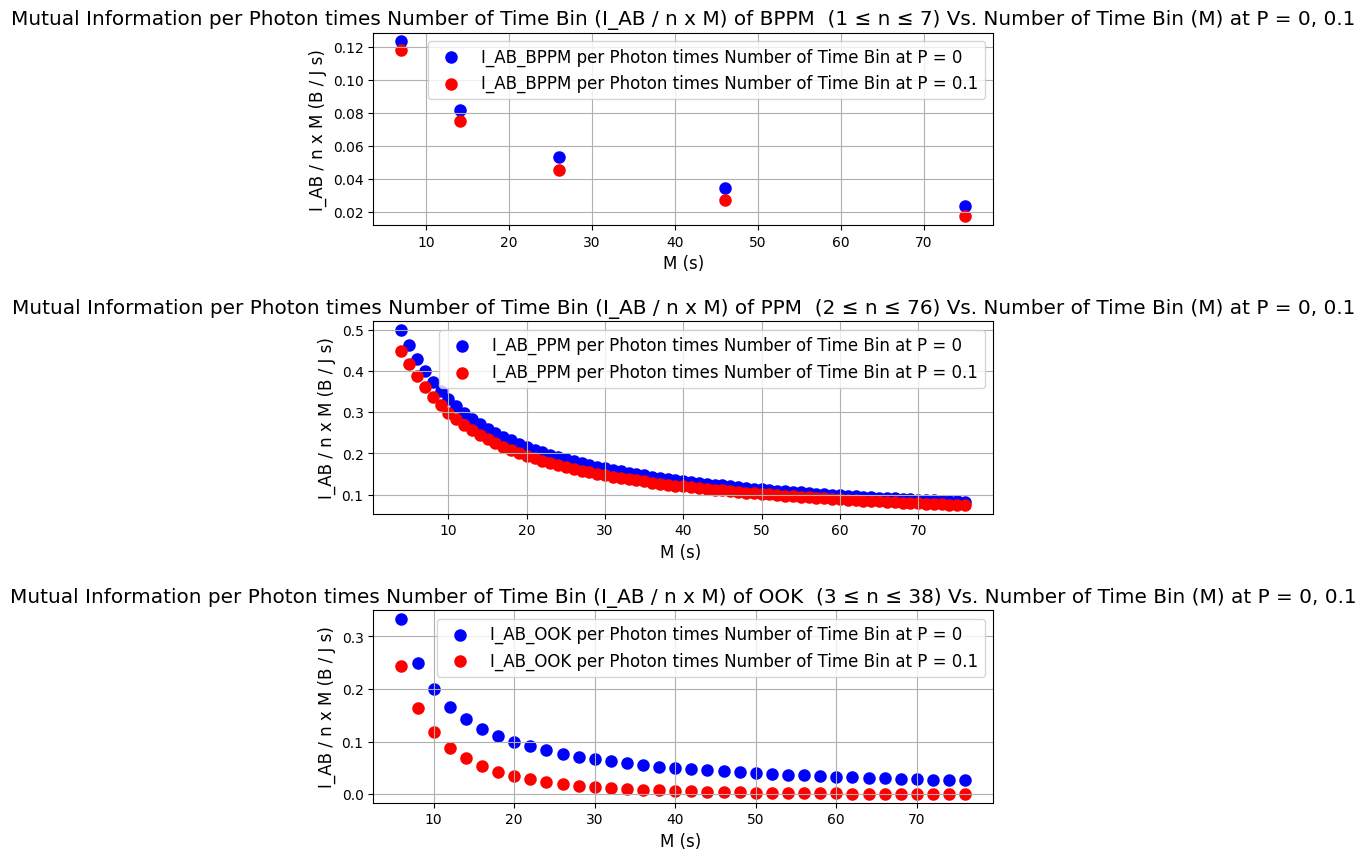

In [45]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

axs[0].scatter(TimeBin_BPPM_list_0, IperPhotonTimeBin_AB_BPPM_list_0, label='I_AB_BPPM per Photon times Number of Time Bin at P = 0', color ='blue', linewidth=3, alpha=1)
axs[0].scatter(TimeBin_BPPM_list_0_1, IperPhotonTimeBin_AB_BPPM_list_0_1, label='I_AB_BPPM per Photon times Number of Time Bin at P = 0.1', color ='red', linewidth=3, alpha=1)
axs[0].set_title('Mutual Information per Photon times Number of Time Bin (I_AB / n x M) of BPPM  (1 \u2264 n \u2264 7) Vs. Number of Time Bin (M) at P = 0, 0.1', fontsize='x-large')
axs[0].set_xlabel('M (s)', fontsize = 12)
axs[0].set_ylabel('I_AB / n x M (B / J s)', fontsize = 12)
axs[0].grid(True)
axs[0].legend(fontsize=12)

axs[1].scatter(TimeBin_PPM_list_0, IperPhotonTimeBin_AB_PPM_list_0, label='I_AB_PPM per Photon times Number of Time Bin at P = 0', color ='blue', linewidth=3, alpha=1)
axs[1].scatter(TimeBin_PPM_list_0_1, IperPhotonTimeBin_AB_PPM_list_0_1, label='I_AB_PPM per Photon times Number of Time Bin at P = 0.1', color ='red', linewidth=3, alpha=1)
axs[1].set_title('Mutual Information per Photon times Number of Time Bin (I_AB / n x M) of PPM  (2 \u2264 n \u2264 76) Vs. Number of Time Bin (M) at P = 0, 0.1', fontsize='x-large')
axs[1].set_xlabel('M (s) ', fontsize = 12)
axs[1].set_ylabel('I_AB / n x M (B / J s)', fontsize = 12)
axs[1].grid(True)
axs[1].legend(fontsize=12)

axs[2].scatter(TimeBin_OOK_list_0, IperPhotonTimeBin_AB_OOK_list_0, label='I_AB_OOK per Photon times Number of Time Bin at P = 0', color ='blue', linewidth=3, alpha=1)
axs[2].scatter(TimeBin_OOK_list_0_1, IperPhotonTimeBin_AB_OOK_list_0_1, label='I_AB_OOK per Photon times Number of Time Bin at P = 0.1', color ='red', linewidth=3, alpha=1)
axs[2].set_title('Mutual Information per Photon times Number of Time Bin (I_AB / n x M) of OOK  (3 \u2264 n \u2264 38) Vs. Number of Time Bin (M) at P = 0, 0.1', fontsize='x-large')
axs[2].set_xlabel('M (s) ', fontsize = 12)
axs[2].set_ylabel('I_AB / n x M (B / J s)', fontsize = 12)
axs[2].grid(True)
axs[2].legend(fontsize=12)

plt.subplots_adjust(hspace=0.5)
figure.set_facecolor("white")
plt.show()

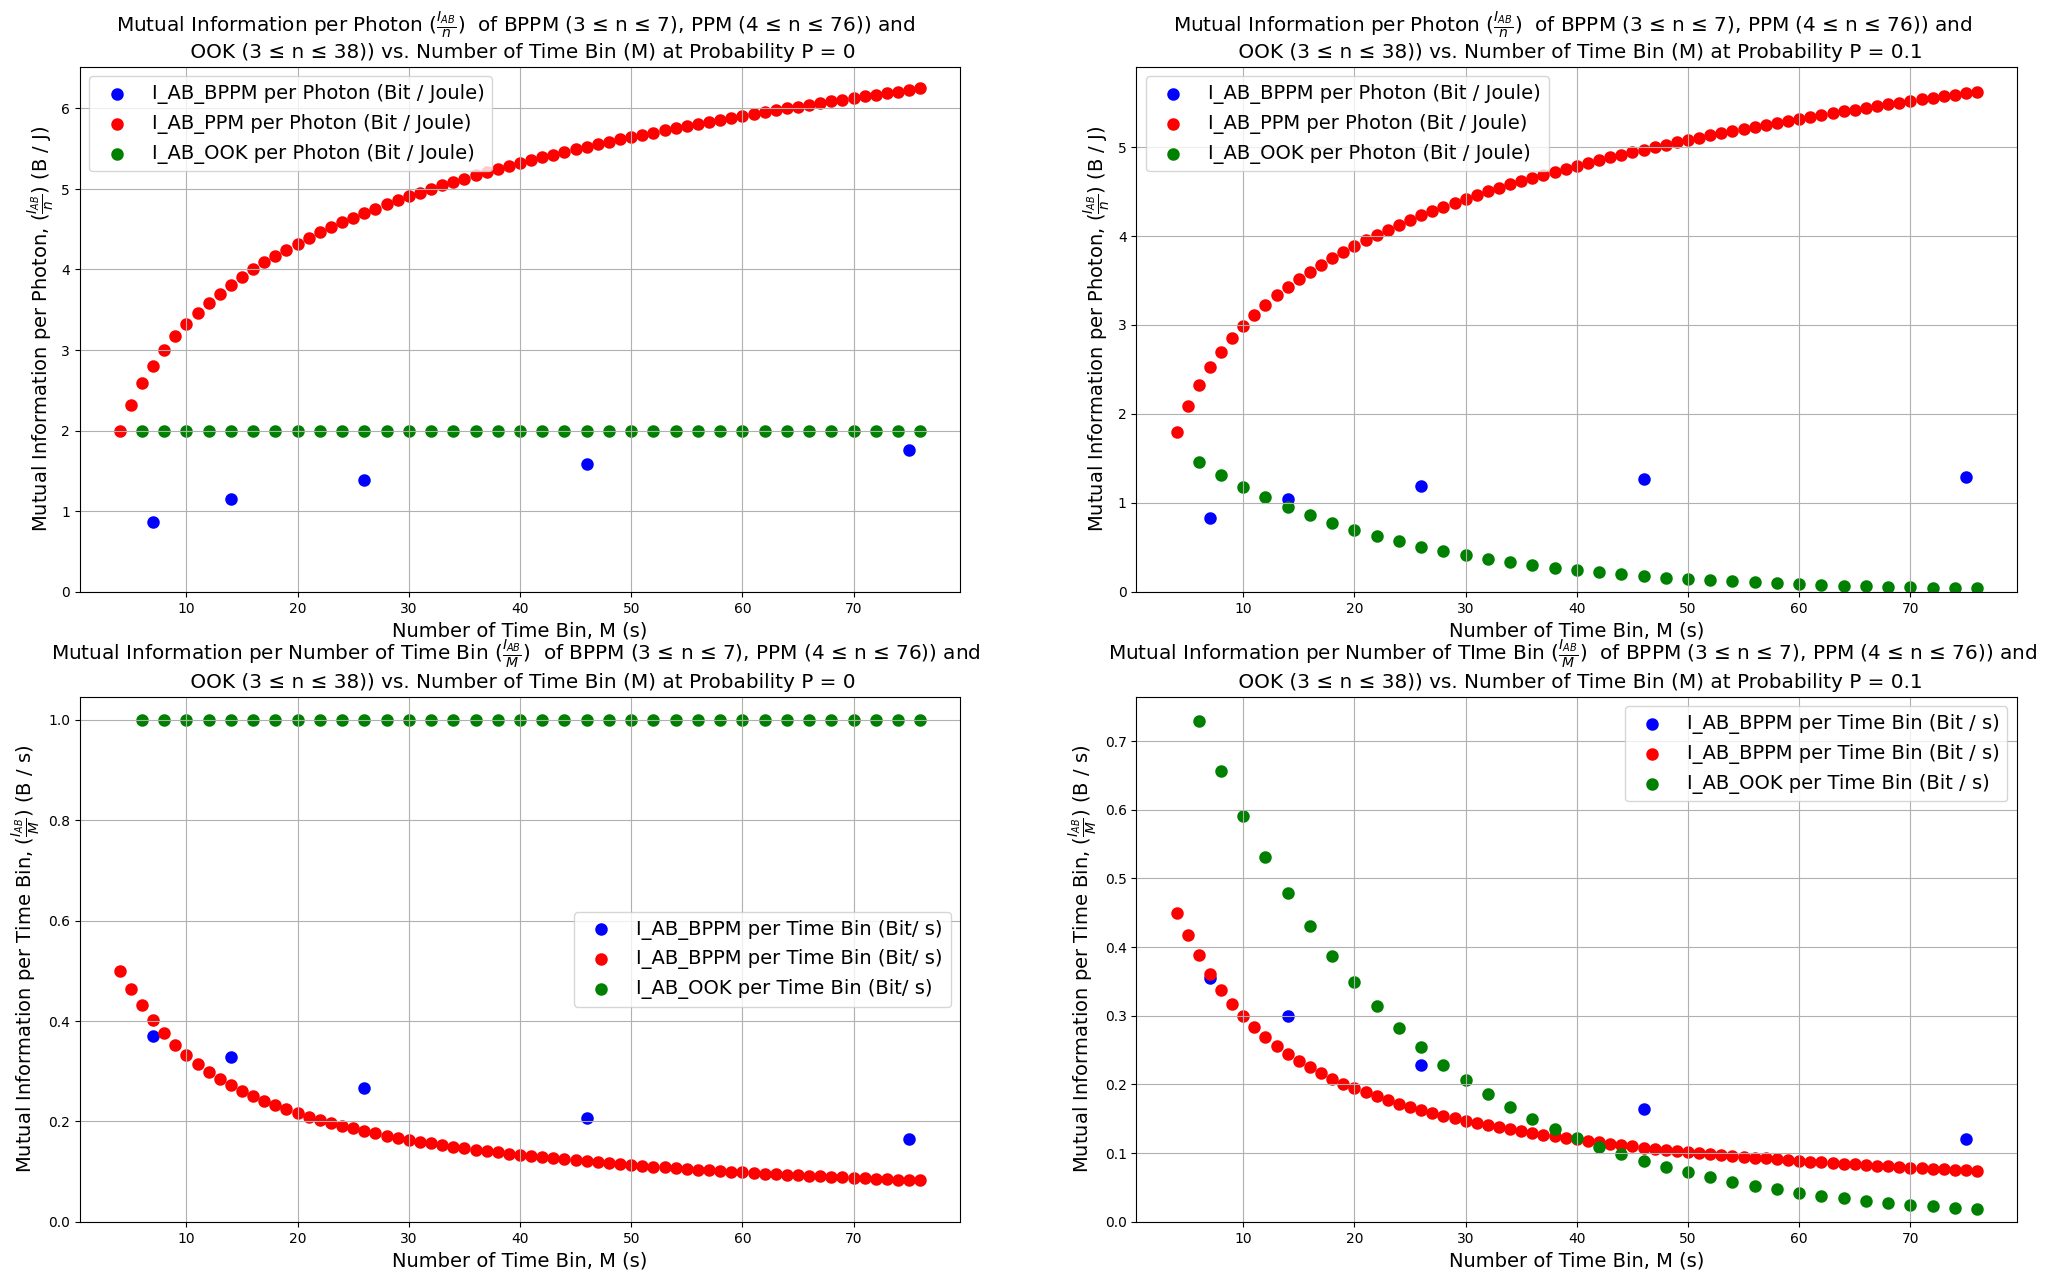

In [46]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].scatter(TimeBin_BPPM_list_0, IperPhoton_AB_BPPM_list_0, label='I_AB_BPPM per Photon (Bit / Joule)', color ='blue', linewidth=3, alpha=1)
axis[0, 0].scatter(TimeBin_PPM_list_0, IperPhoton_AB_PPM_list_0, label='I_AB_PPM per Photon (Bit / Joule)', color ='red', linewidth=3, alpha=1)
axis[0, 0].scatter(TimeBin_OOK_list_0, IperPhoton_AB_OOK_list_0, label='I_AB_OOK per Photon (Bit / Joule)', color ='green', linewidth=3, alpha=1)
axis[0, 0].set_title('Mutual Information per Photon ($\\frac{I_{AB}}{n}$)  of BPPM (3 \u2264 n \u2264 7), PPM (4 \u2264 n \u2264 76)) and  \n OOK (3 \u2264 n \u2264 38)) vs. Number of Time Bin (M) at Probability P = 0', fontsize='x-large')
axis[0, 0].set_xlabel('Number of Time Bin, M (s)', fontsize = 14)
axis[0, 0].set_ylabel('Mutual Information per Photon, ($\\frac{I_{AB}}{n}$) (B / J)', fontsize = 14)
# axis[0, 0].set_xscale('log')
axis[0, 0].set_ylim(0)
axis[0, 0].grid(True)
axis[0, 0].legend(fontsize=14)

axis[0, 1].scatter(TimeBin_BPPM_list_0_1, IperPhoton_AB_BPPM_list_0_1, label='I_AB_BPPM per Photon (Bit / Joule)', color ='blue', linewidth=3, alpha=1)
axis[0, 1].scatter(TimeBin_PPM_list_0_1, IperPhoton_AB_PPM_list_0_1, label='I_AB_PPM per Photon (Bit / Joule)', color ='red', linewidth=3, alpha=1)
axis[0, 1].scatter(TimeBin_OOK_list_0_1, IperPhoton_AB_OOK_list_0_1, label='I_AB_OOK per Photon (Bit / Joule)', color ='green', linewidth=3, alpha=1)
axs[2].scatter(TimeBin_OOK_list_0, IperPhoton_AB_OOK_list_0, label='I_AB_OOK per Photon (Bit / Joule)', color ='blue', linewidth=3, alpha=1)
axis[0, 1].set_title('Mutual Information per Photon ($\\frac{I_{AB}}{n}$)  of BPPM (3 \u2264 n \u2264 7), PPM (4 \u2264 n \u2264 76)) and  \n OOK (3 \u2264 n \u2264 38)) vs. Number of Time Bin (M) at Probability P = 0.1', fontsize='x-large')
axis[0, 1].set_xlabel('Number of Time Bin, M (s)', fontsize = 14)
axis[0, 1].set_ylabel('Mutual Information per Photon, ($\\frac{I_{AB}}{n}$) (B / J)', fontsize = 14)
# axis[0, 1].set_xscale('log')
axis[0, 1].set_ylim(0)
axis[0, 1].grid(True)
axis[0, 1].legend(fontsize=14)

axis[1, 0].scatter(TimeBin_BPPM_list_0, IperTimeBin_AB_BPPM_list_0, label='I_AB_BPPM per Time Bin (Bit/ s)', color ='blue', linewidth=3, alpha=1)
axis[1, 0].scatter(TimeBin_PPM_list_0, IperTimeBin_AB_PPM_list_0, label='I_AB_BPPM per Time Bin (Bit/ s)', color ='red', linewidth=3, alpha=1)
axis[1, 0].scatter(TimeBin_OOK_list_0, IperTimeBin_AB_OOK_list_0, label='I_AB_OOK per Time Bin (Bit/ s)', color ='green', linewidth=3, alpha=1)
axis[1, 0].set_title('Mutual Information per Number of Time Bin ($\\frac{I_{AB}}{M}$)  of BPPM (3 \u2264 n \u2264 7), PPM (4 \u2264 n \u2264 76)) and  \n OOK (3 \u2264 n \u2264 38)) vs. Number of Time Bin (M) at Probability P = 0', fontsize='x-large')
axis[1, 0].set_xlabel('Number of Time Bin, M (s)', fontsize = 14)
axis[1, 0].set_ylabel('Mutual Information per Time Bin, ($\\frac{I_{AB}}{M}$) (B / s)', fontsize = 14)
# axis[1, 0].set_xscale('log')
axis[1, 0].set_ylim(0)
axis[1, 0].grid(True)
axis[1, 0].legend(fontsize=14)

axis[1, 1].scatter(TimeBin_BPPM_list_0_1, IperTimeBin_AB_BPPM_list_0_1, label='I_AB_BPPM per Time Bin (Bit / s)', color ='blue', linewidth=3, alpha=1)
axis[1, 1].scatter(TimeBin_PPM_list_0_1, IperTimeBin_AB_PPM_list_0_1, label='I_AB_BPPM per Time Bin (Bit / s)', color ='red', linewidth=3, alpha=1)
axis[1, 1].scatter(TimeBin_OOK_list_0_1, IperTimeBin_AB_OOK_list_0_1, label='I_AB_OOK per Time Bin (Bit / s)', color ='green', linewidth=3, alpha=1)
axis[1, 1].set_title('Mutual Information per Number of TIme Bin ($\\frac{I_{AB}}{M}$)  of BPPM (3 \u2264 n \u2264 7), PPM (4 \u2264 n \u2264 76)) and  \n OOK (3 \u2264 n \u2264 38)) vs. Number of Time Bin (M) at Probability P = 0.1', fontsize='x-large')
axis[1, 1].set_xlabel('Number of Time Bin, M (s)', fontsize = 14)
axis[1, 1].set_ylabel('Mutual Information per Time Bin, ($\\frac{I_{AB}}{M}$) (B / s)', fontsize = 14)
# axis[1, 1].set_xscale('log')
axis[1, 1].set_ylim(0)
axis[1, 1].grid(True)
axis[1, 1].legend(fontsize=14)

figure.set_facecolor("white")
plt.savefig('protocol/MI_Power_4schemes_Plot.png', dpi=450, bbox_inches='tight')
plt.show()

/var/folders/nd/4tv7bl7d4ys_1zhq177b1_qr0000gn/T/ipykernel_2098/1409333313.py:83: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig('protocol/MI_Power_4schemes_Plot.png', dpi=450, bbox_inches='tight')


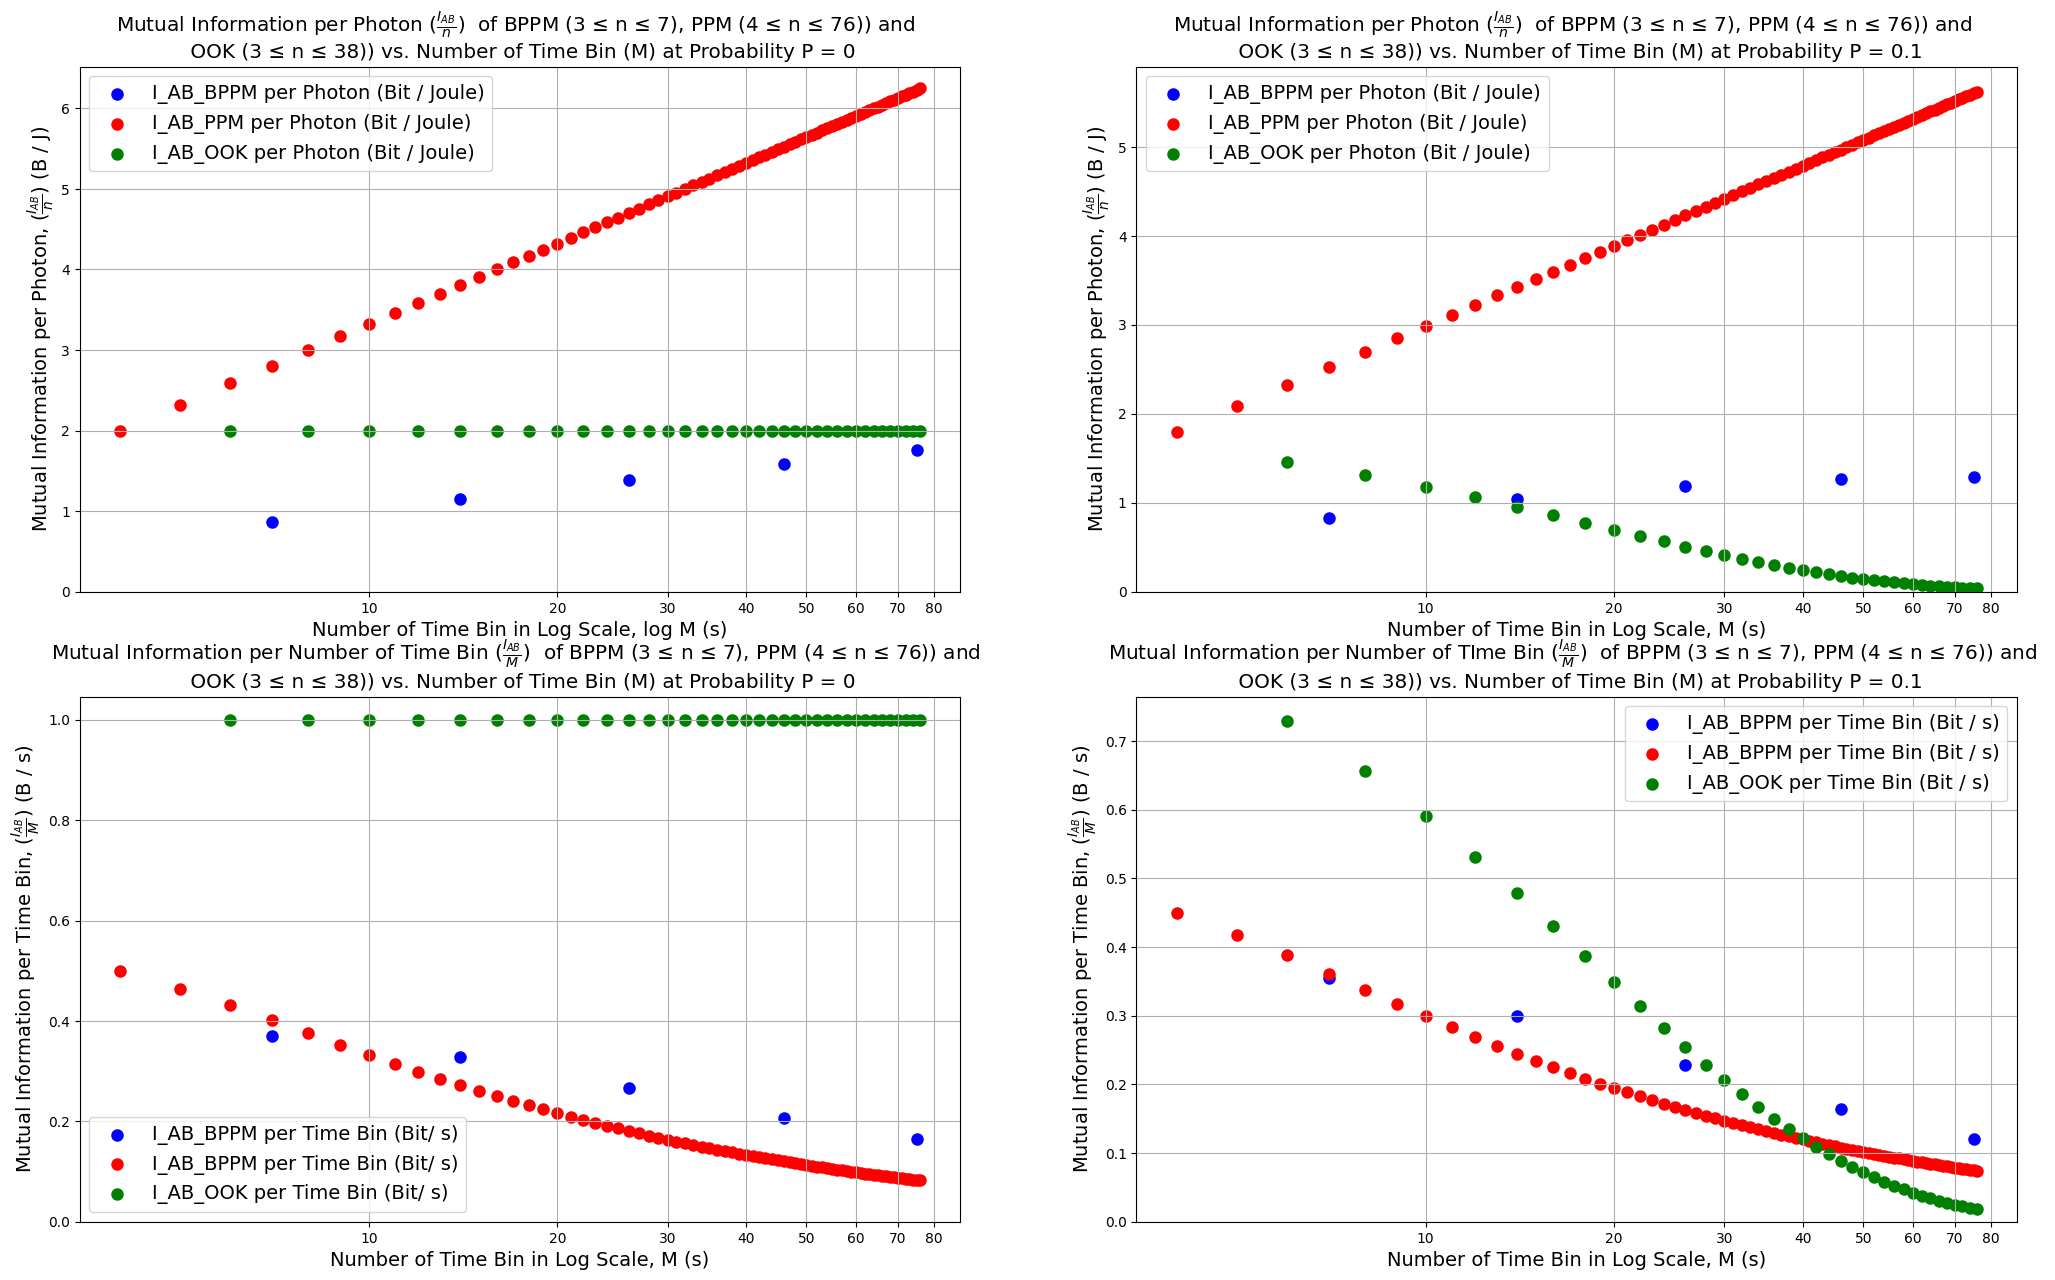

In [61]:
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import AutoLocator, AutoMinorLocator

# Set the tick formatter for the x-axis
formatter = ScalarFormatter(useOffset=False)

figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].scatter(TimeBin_BPPM_list_0, IperPhoton_AB_BPPM_list_0, label='I_AB_BPPM per Photon (Bit / Joule)', color ='blue', linewidth=3, alpha=1)
axis[0, 0].scatter(TimeBin_PPM_list_0, IperPhoton_AB_PPM_list_0, label='I_AB_PPM per Photon (Bit / Joule)', color ='red', linewidth=3, alpha=1)
axis[0, 0].scatter(TimeBin_OOK_list_0, IperPhoton_AB_OOK_list_0, label='I_AB_OOK per Photon (Bit / Joule)', color ='green', linewidth=3, alpha=1)

axis[0, 0].set_xscale('log')
axis[0, 0].xaxis.set_major_formatter(formatter)
# Set the tick locators and formatters for the x-axis
axis[0, 0].xaxis.set_major_locator(AutoLocator())
axis[0, 0].xaxis.set_minor_locator(AutoMinorLocator())
axis[0, 0].xaxis.set_tick_params(which='both', labelsize=10)

axis[0, 0].set_title('Mutual Information per Photon ($\\frac{I_{AB}}{n}$)  of BPPM (3 \u2264 n \u2264 7), PPM (4 \u2264 n \u2264 76)) and  \n OOK (3 \u2264 n \u2264 38)) vs. Number of Time Bin (M) at Probability P = 0', fontsize='x-large')
axis[0, 0].set_xlabel('Number of Time Bin in Log Scale, log M (s)', fontsize = 14)
axis[0, 0].set_ylabel('Mutual Information per Photon, ($\\frac{I_{AB}}{n}$) (B / J)', fontsize = 14)
axis[0, 0].set_ylim(0)
axis[0, 0].grid(True)
axis[0, 0].legend(fontsize=14)

axis[0, 1].scatter(TimeBin_BPPM_list_0_1, IperPhoton_AB_BPPM_list_0_1, label='I_AB_BPPM per Photon (Bit / Joule)', color ='blue', linewidth=3, alpha=1)
axis[0, 1].scatter(TimeBin_PPM_list_0_1, IperPhoton_AB_PPM_list_0_1, label='I_AB_PPM per Photon (Bit / Joule)', color ='red', linewidth=3, alpha=1)
axis[0, 1].scatter(TimeBin_OOK_list_0_1, IperPhoton_AB_OOK_list_0_1, label='I_AB_OOK per Photon (Bit / Joule)', color ='green', linewidth=3, alpha=1)

axis[0, 1].set_xscale('log')
axis[0, 1].xaxis.set_major_formatter(formatter)
# Set the tick locators and formatters for the x-axis
axis[0, 1].xaxis.set_major_locator(AutoLocator())
axis[0, 1].xaxis.set_minor_locator(AutoMinorLocator())
axis[0, 1].xaxis.set_tick_params(which='both', labelsize=10)

axis[0, 1].set_title('Mutual Information per Photon ($\\frac{I_{AB}}{n}$)  of BPPM (3 \u2264 n \u2264 7), PPM (4 \u2264 n \u2264 76)) and  \n OOK (3 \u2264 n \u2264 38)) vs. Number of Time Bin (M) at Probability P = 0.1', fontsize='x-large')
axis[0, 1].set_xlabel('Number of Time Bin in Log Scale, M (s)', fontsize = 14)
axis[0, 1].set_ylabel('Mutual Information per Photon, ($\\frac{I_{AB}}{n}$) (B / J)', fontsize = 14)
axis[0, 1].set_ylim(0)
axis[0, 1].grid(True)
axis[0, 1].legend(fontsize=14)

axis[1, 0].scatter(TimeBin_BPPM_list_0, IperTimeBin_AB_BPPM_list_0, label='I_AB_BPPM per Time Bin (Bit/ s)', color ='blue', linewidth=3, alpha=1)
axis[1, 0].scatter(TimeBin_PPM_list_0, IperTimeBin_AB_PPM_list_0, label='I_AB_BPPM per Time Bin (Bit/ s)', color ='red', linewidth=3, alpha=1)
axis[1, 0].scatter(TimeBin_OOK_list_0, IperTimeBin_AB_OOK_list_0, label='I_AB_OOK per Time Bin (Bit/ s)', color ='green', linewidth=3, alpha=1)

axis[1, 0].set_xscale('log')
axis[1, 0].xaxis.set_major_formatter(formatter)
# Set the tick locators and formatters for the x-axis
axis[1, 0].xaxis.set_major_locator(AutoLocator())
axis[1, 0].xaxis.set_minor_locator(AutoMinorLocator())
axis[1, 0].xaxis.set_tick_params(which='both', labelsize=10)

axis[1, 0].set_title('Mutual Information per Number of Time Bin ($\\frac{I_{AB}}{M}$)  of BPPM (3 \u2264 n \u2264 7), PPM (4 \u2264 n \u2264 76)) and  \n OOK (3 \u2264 n \u2264 38)) vs. Number of Time Bin (M) at Probability P = 0', fontsize='x-large')
axis[1, 0].set_xlabel('Number of Time Bin in Log Scale, M (s)', fontsize = 14)
axis[1, 0].set_ylabel('Mutual Information per Time Bin, ($\\frac{I_{AB}}{M}$) (B / s)', fontsize = 14)
axis[1, 0].set_ylim(0)
axis[1, 0].grid(True)
axis[1, 0].legend(fontsize=14)

axis[1, 1].scatter(TimeBin_BPPM_list_0_1, IperTimeBin_AB_BPPM_list_0_1, label='I_AB_BPPM per Time Bin (Bit / s)', color ='blue', linewidth=3, alpha=1)
axis[1, 1].scatter(TimeBin_PPM_list_0_1, IperTimeBin_AB_PPM_list_0_1, label='I_AB_BPPM per Time Bin (Bit / s)', color ='red', linewidth=3, alpha=1)
axis[1, 1].scatter(TimeBin_OOK_list_0_1, IperTimeBin_AB_OOK_list_0_1, label='I_AB_OOK per Time Bin (Bit / s)', color ='green', linewidth=3, alpha=1)
axis[1, 1].set_xscale('log')
axis[1, 1].xaxis.set_major_formatter(formatter)
# Set the tick locators and formatters for the x-axis
axis[1, 1].xaxis.set_major_locator(AutoLocator())
axis[1, 1].xaxis.set_minor_locator(AutoMinorLocator())
axis[1, 1].xaxis.set_tick_params(which='both', labelsize=10)


axis[1, 1].set_title('Mutual Information per Number of TIme Bin ($\\frac{I_{AB}}{M}$)  of BPPM (3 \u2264 n \u2264 7), PPM (4 \u2264 n \u2264 76)) and  \n OOK (3 \u2264 n \u2264 38)) vs. Number of Time Bin (M) at Probability P = 0.1', fontsize='x-large')
axis[1, 1].set_xlabel('Number of Time Bin in Log Scale, M (s)', fontsize = 14)
axis[1, 1].set_ylabel('Mutual Information per Time Bin, ($\\frac{I_{AB}}{M}$) (B / s)', fontsize = 14)

axis[1, 1].set_ylim(0)
axis[1, 1].grid(True)
axis[1, 1].legend(fontsize=14)

figure.set_facecolor("white")
plt.savefig('protocol/MI_Power_4schemes_Plot.png', dpi=450, bbox_inches='tight')
plt.show()

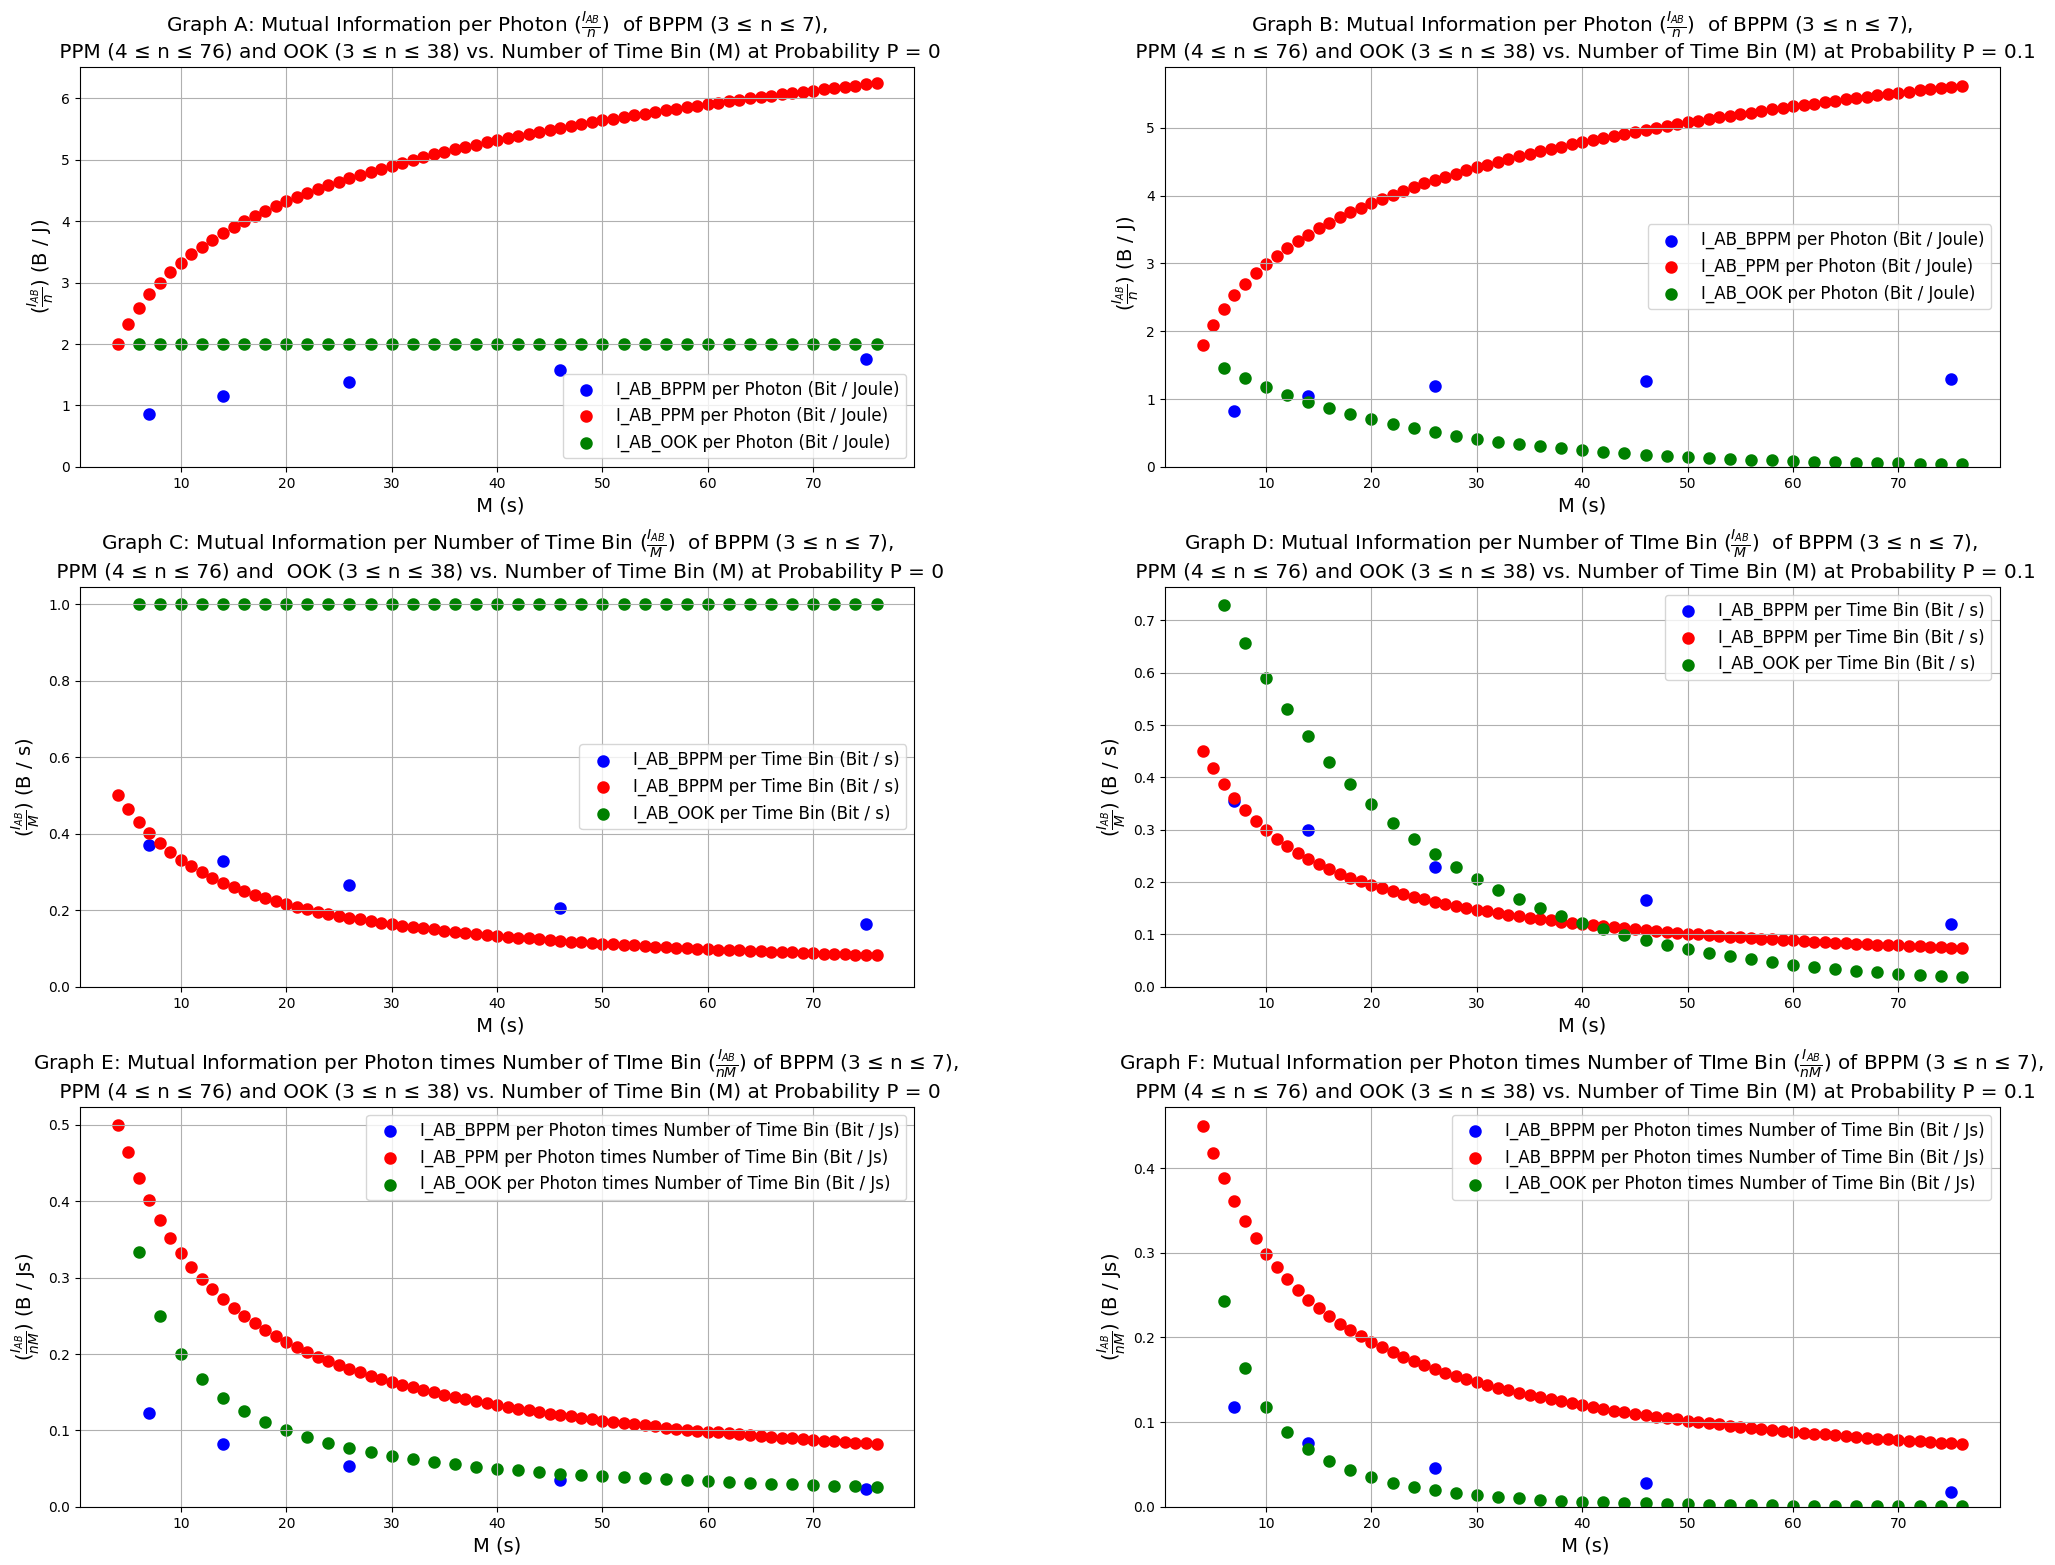

In [74]:
figure, axis = plt.subplots(3,2,figsize=(24,18))


axis[0, 0].scatter(TimeBin_BPPM_list_0, IperPhoton_AB_BPPM_list_0, label='I_AB_BPPM per Photon (Bit / Joule)', color ='blue', linewidth=3, alpha=1)
axis[0, 0].scatter(TimeBin_PPM_list_0, IperPhoton_AB_PPM_list_0, label='I_AB_PPM per Photon (Bit / Joule)', color ='red', linewidth=3, alpha=1)
axis[0, 0].scatter(TimeBin_OOK_list_0, IperPhoton_AB_OOK_list_0, label='I_AB_OOK per Photon (Bit / Joule)', color ='green', linewidth=3, alpha=1)
axis[0, 0].set_title('Graph A: Mutual Information per Photon ($\\frac{I_{AB}}{n}$)  of BPPM (3 \u2264 n \u2264 7),\n PPM (4 \u2264 n \u2264 76) and OOK (3 \u2264 n \u2264 38) vs. Number of Time Bin (M) at Probability P = 0', fontsize='x-large')
axis[0, 0].set_xlabel(' M (s)', fontsize = 14)
axis[0, 0].set_ylabel('($\\frac{I_{AB}}{n}$) (B / J)', fontsize = 14)
# axis[0, 0].set_xscale('log')
axis[0, 0].set_ylim(0)
axis[0, 0].grid(True)
axis[0, 0].legend(fontsize=12)

axis[0, 1].scatter(TimeBin_BPPM_list_0_1, IperPhoton_AB_BPPM_list_0_1, label='I_AB_BPPM per Photon (Bit / Joule)', color ='blue', linewidth=3, alpha=1)
axis[0, 1].scatter(TimeBin_PPM_list_0_1, IperPhoton_AB_PPM_list_0_1, label='I_AB_PPM per Photon (Bit / Joule)', color ='red', linewidth=3, alpha=1)
axis[0, 1].scatter(TimeBin_OOK_list_0_1, IperPhoton_AB_OOK_list_0_1, label='I_AB_OOK per Photon (Bit / Joule)', color ='green', linewidth=3, alpha=1)
axs[2].scatter(TimeBin_OOK_list_0, IperPhoton_AB_OOK_list_0, label='I_AB_OOK per Photon (Bit / Joule)', color ='blue', linewidth=3, alpha=1)
axis[0, 1].set_title('Graph B: Mutual Information per Photon ($\\frac{I_{AB}}{n}$)  of BPPM (3 \u2264 n \u2264 7),\n PPM (4 \u2264 n \u2264 76) and OOK (3 \u2264 n \u2264 38) vs. Number of Time Bin (M) at Probability P = 0.1', fontsize='x-large')
axis[0, 1].set_xlabel('M (s)', fontsize = 14)
axis[0, 1].set_ylabel(' ($\\frac{I_{AB}}{n}$) (B / J)', fontsize = 14)
# axis[0, 1].set_xscale('log')
axis[0, 1].set_ylim(0)
axis[0, 1].grid(True)
axis[0, 1].legend(fontsize=12)

axis[1, 0].scatter(TimeBin_BPPM_list_0, IperTimeBin_AB_BPPM_list_0, label='I_AB_BPPM per Time Bin (Bit / s)', color ='blue', linewidth=3, alpha=1)
axis[1, 0].scatter(TimeBin_PPM_list_0, IperTimeBin_AB_PPM_list_0, label='I_AB_BPPM per Time Bin (Bit / s)', color ='red', linewidth=3, alpha=1)
axis[1, 0].scatter(TimeBin_OOK_list_0, IperTimeBin_AB_OOK_list_0, label='I_AB_OOK per Time Bin (Bit / s)', color ='green', linewidth=3, alpha=1)
axis[1, 0].set_title('Graph C: Mutual Information per Number of Time Bin ($\\frac{I_{AB}}{M}$)  of BPPM (3 \u2264 n \u2264 7),\n PPM (4 \u2264 n \u2264 76) and  OOK (3 \u2264 n \u2264 38) vs. Number of Time Bin (M) at Probability P = 0', fontsize='x-large')
axis[1, 0].set_xlabel(' M (s)', fontsize = 14)
axis[1, 0].set_ylabel('($\\frac{I_{AB}}{M}$) (B / s)', fontsize = 14)
# axis[1, 0].set_xscale('log')
axis[1, 0].set_ylim(0)
axis[1, 0].grid(True)
axis[1, 0].legend(fontsize=12)

axis[1, 1].scatter(TimeBin_BPPM_list_0_1, IperTimeBin_AB_BPPM_list_0_1, label='I_AB_BPPM per Time Bin (Bit / s)', color ='blue', linewidth=3, alpha=1)
axis[1, 1].scatter(TimeBin_PPM_list_0_1, IperTimeBin_AB_PPM_list_0_1, label='I_AB_BPPM per Time Bin (Bit / s)', color ='red', linewidth=3, alpha=1)
axis[1, 1].scatter(TimeBin_OOK_list_0_1, IperTimeBin_AB_OOK_list_0_1, label='I_AB_OOK per Time Bin (Bit / s)', color ='green', linewidth=3, alpha=1)
axis[1, 1].set_title('Graph D: Mutual Information per Number of TIme Bin ($\\frac{I_{AB}}{M}$)  of BPPM (3 \u2264 n \u2264 7), \n PPM (4 \u2264 n \u2264 76) and OOK (3 \u2264 n \u2264 38) vs. Number of Time Bin (M) at Probability P = 0.1', fontsize='x-large')
axis[1, 1].set_xlabel('M (s)', fontsize = 14)
axis[1, 1].set_ylabel('($\\frac{I_{AB}}{M}$) (B / s)', fontsize = 14)
# axis[1, 1].set_xscale('log')
axis[1, 1].set_ylim(0)
axis[1, 1].grid(True)
axis[1, 1].legend(fontsize=12)

axis[2, 0].scatter(TimeBin_BPPM_list_0, IperPhotonTimeBin_AB_BPPM_list_0, label='I_AB_BPPM per Photon times Number of Time Bin (Bit / Js)', color ='blue', linewidth=3, alpha=1)
axis[2, 0].scatter(TimeBin_PPM_list_0, IperPhotonTimeBin_AB_PPM_list_0, label='I_AB_PPM per Photon times Number of Time Bin (Bit / Js)', color ='red', linewidth=3, alpha=1)
axis[2, 0].scatter(TimeBin_OOK_list_0, IperPhotonTimeBin_AB_OOK_list_0, label='I_AB_OOK per Photon times Number of Time Bin (Bit / Js)', color ='green', linewidth=3, alpha=1)
axis[2, 0].set_title('Graph E: Mutual Information per Photon times Number of TIme Bin ($\\frac{I_{AB}}{n M}$) of BPPM (3 \u2264 n \u2264 7), \n PPM (4 \u2264 n \u2264 76) and OOK (3 \u2264 n \u2264 38) vs. Number of Time Bin (M) at Probability P = 0', fontsize='x-large')
axis[2, 0].set_xlabel('M (s)', fontsize = 14)
axis[2, 0].set_ylabel('($\\frac{I_{AB}}{n M}$) (B / Js)', fontsize = 14)
# axis[2, 0].set_xscale('log')
axis[2, 0].set_ylim(0)
axis[2, 0].grid(True)
axis[2, 0].legend(fontsize=12)

axis[2, 1].scatter(TimeBin_BPPM_list_0_1, IperPhotonTimeBin_AB_BPPM_list_0_1, label='I_AB_BPPM per Photon times Number of Time Bin (Bit / Js)', color ='blue', linewidth=3, alpha=1)
axis[2, 1].scatter(TimeBin_PPM_list_0_1, IperPhotonTimeBin_AB_PPM_list_0_1, label='I_AB_BPPM per Photon times Number of Time Bin (Bit / Js)', color ='red', linewidth=3, alpha=1)
axis[2, 1].scatter(TimeBin_OOK_list_0_1, IperPhotonTimeBin_AB_OOK_list_0_1, label='I_AB_OOK per Photon times Number of Time Bin (Bit / Js)', color ='green', linewidth=3, alpha=1)
axis[2, 1].set_title('Graph F: Mutual Information per Photon times Number of TIme Bin ($\\frac{I_{AB}}{n M}$) of BPPM (3 \u2264 n \u2264 7), \n PPM (4 \u2264 n \u2264 76) and OOK (3 \u2264 n \u2264 38) vs. Number of Time Bin (M) at Probability P = 0.1', fontsize='x-large')
axis[2, 1].set_xlabel(' M (s)', fontsize = 14)
axis[2, 1].set_ylabel('($\\frac{I_{AB}}{n M}$) (B / Js)', fontsize = 14)
# axis[2, 1].set_xscale('log')
axis[2, 1].set_ylim(0)
axis[2, 1].grid(True)
axis[2, 1].legend(fontsize=12)

figure.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
figure.set_facecolor("white")
plt.savefig('protocol/3NewMetrics.png', dpi=450, bbox_inches='tight')
plt.show()

/var/folders/nd/4tv7bl7d4ys_1zhq177b1_qr0000gn/T/ipykernel_2098/4152763457.py:113: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig('protocol/3NewMetricsLog.png', dpi=450, bbox_inches='tight')


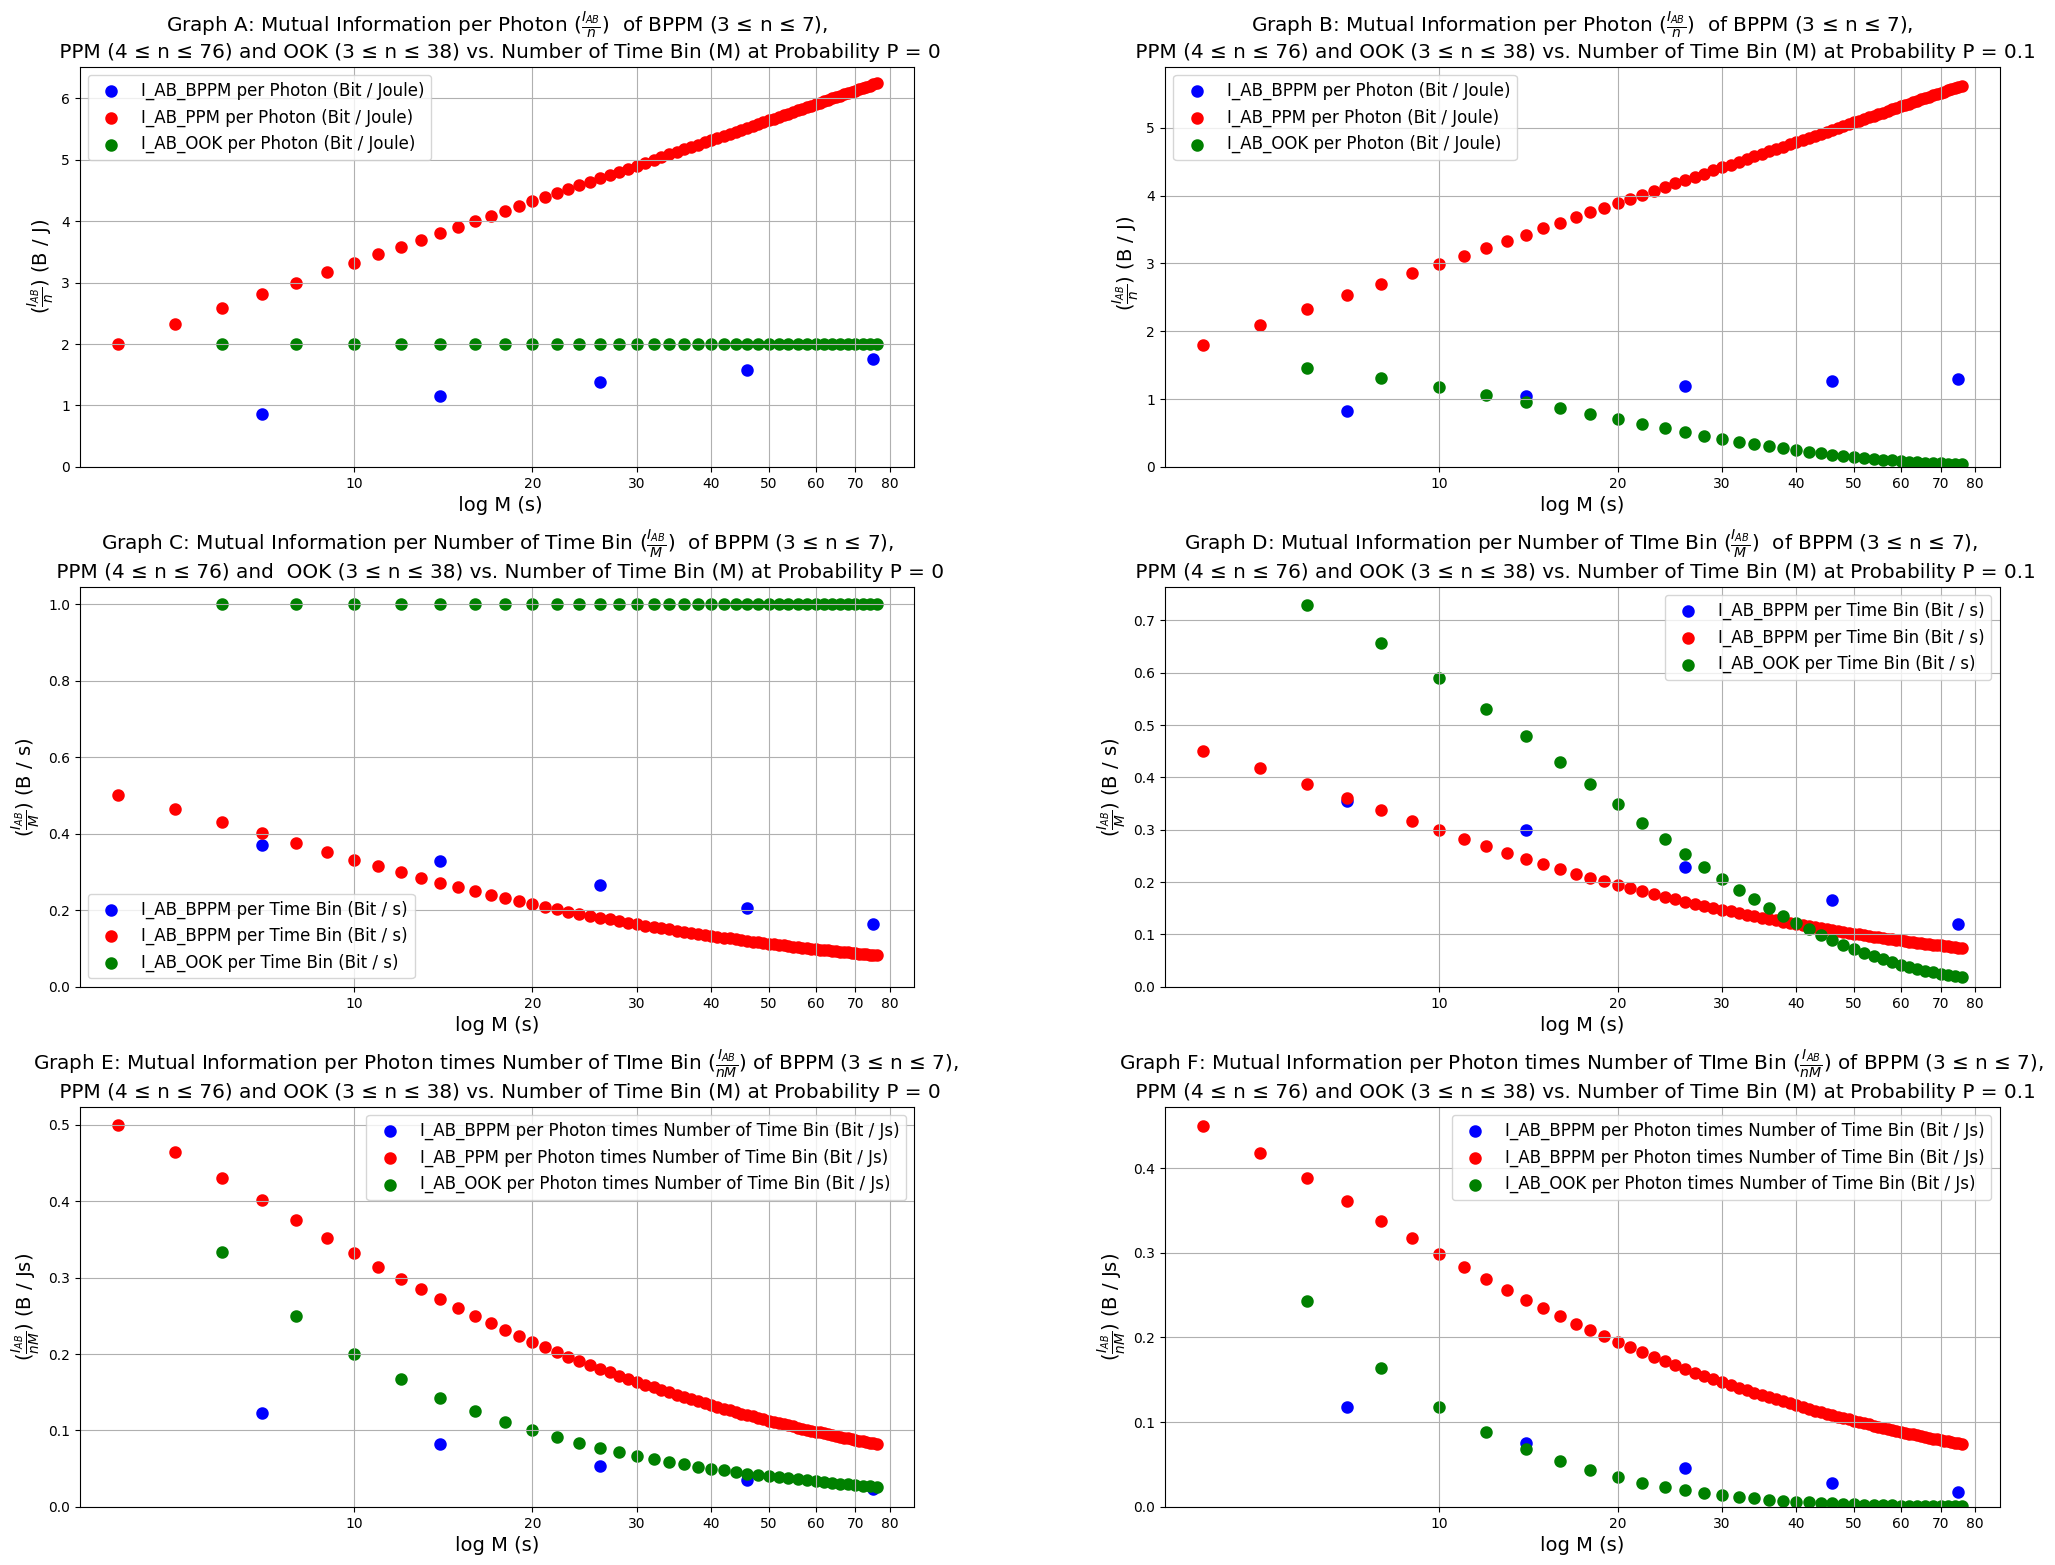

In [72]:
figure, axis = plt.subplots(3,2,figsize=(24,18))

axis[0, 0].scatter(TimeBin_BPPM_list_0, IperPhoton_AB_BPPM_list_0, label='I_AB_BPPM per Photon (Bit / Joule)', color ='blue', linewidth=3, alpha=1)
axis[0, 0].scatter(TimeBin_PPM_list_0, IperPhoton_AB_PPM_list_0, label='I_AB_PPM per Photon (Bit / Joule)', color ='red', linewidth=3, alpha=1)
axis[0, 0].scatter(TimeBin_OOK_list_0, IperPhoton_AB_OOK_list_0, label='I_AB_OOK per Photon (Bit / Joule)', color ='green', linewidth=3, alpha=1)

axis[0, 0].set_xscale('log')
axis[0, 0].xaxis.set_major_formatter(formatter)
# Set the tick locators and formatters for the x-axis
axis[0, 0].xaxis.set_major_locator(AutoLocator())
axis[0, 0].xaxis.set_minor_locator(AutoMinorLocator())
axis[0, 0].xaxis.set_tick_params(which='both', labelsize=10)

axis[0, 0].set_title('Graph A: Mutual Information per Photon ($\\frac{I_{AB}}{n}$)  of BPPM (3 \u2264 n \u2264 7),\n PPM (4 \u2264 n \u2264 76) and OOK (3 \u2264 n \u2264 38) vs. Number of Time Bin (M) at Probability P = 0', fontsize='x-large')
axis[0, 0].set_xlabel(' log M (s)', fontsize = 14)
axis[0, 0].set_ylabel('($\\frac{I_{AB}}{n}$) (B / J)', fontsize = 14)
axis[0, 0].set_ylim(0)
axis[0, 0].grid(True)
axis[0, 0].legend(fontsize=12)

axis[0, 1].scatter(TimeBin_BPPM_list_0_1, IperPhoton_AB_BPPM_list_0_1, label='I_AB_BPPM per Photon (Bit / Joule)', color ='blue', linewidth=3, alpha=1)
axis[0, 1].scatter(TimeBin_PPM_list_0_1, IperPhoton_AB_PPM_list_0_1, label='I_AB_PPM per Photon (Bit / Joule)', color ='red', linewidth=3, alpha=1)
axis[0, 1].scatter(TimeBin_OOK_list_0_1, IperPhoton_AB_OOK_list_0_1, label='I_AB_OOK per Photon (Bit / Joule)', color ='green', linewidth=3, alpha=1)

axis[0, 1].set_xscale('log')
axis[0, 1].xaxis.set_major_formatter(formatter)
# Set the tick locators and formatters for the x-axis
axis[0, 1].xaxis.set_major_locator(AutoLocator())
axis[0, 1].xaxis.set_minor_locator(AutoMinorLocator())
axis[0, 1].xaxis.set_tick_params(which='both', labelsize=10)

axis[0, 1].set_title('Graph B: Mutual Information per Photon ($\\frac{I_{AB}}{n}$)  of BPPM (3 \u2264 n \u2264 7),\n PPM (4 \u2264 n \u2264 76) and OOK (3 \u2264 n \u2264 38) vs. Number of Time Bin (M) at Probability P = 0.1', fontsize='x-large')
axis[0, 1].set_xlabel('log M (s)', fontsize = 14)
axis[0, 1].set_ylabel(' ($\\frac{I_{AB}}{n}$) (B / J)', fontsize = 14)
axis[0, 1].set_ylim(0)
axis[0, 1].grid(True)
axis[0, 1].legend(fontsize=12)

axis[1, 0].scatter(TimeBin_BPPM_list_0, IperTimeBin_AB_BPPM_list_0, label='I_AB_BPPM per Time Bin (Bit / s)', color ='blue', linewidth=3, alpha=1)
axis[1, 0].scatter(TimeBin_PPM_list_0, IperTimeBin_AB_PPM_list_0, label='I_AB_BPPM per Time Bin (Bit / s)', color ='red', linewidth=3, alpha=1)
axis[1, 0].scatter(TimeBin_OOK_list_0, IperTimeBin_AB_OOK_list_0, label='I_AB_OOK per Time Bin (Bit / s)', color ='green', linewidth=3, alpha=1)

axis[1, 0].set_xscale('log')
axis[1, 0].xaxis.set_major_formatter(formatter)
# Set the tick locators and formatters for the x-axis
axis[1, 0].xaxis.set_major_locator(AutoLocator())
axis[1, 0].xaxis.set_minor_locator(AutoMinorLocator())
axis[1, 0].xaxis.set_tick_params(which='both', labelsize=10)

axis[1, 0].set_title('Graph C: Mutual Information per Number of Time Bin ($\\frac{I_{AB}}{M}$)  of BPPM (3 \u2264 n \u2264 7),\n PPM (4 \u2264 n \u2264 76) and  OOK (3 \u2264 n \u2264 38) vs. Number of Time Bin (M) at Probability P = 0', fontsize='x-large')
axis[1, 0].set_xlabel('log M (s)', fontsize = 14)
axis[1, 0].set_ylabel('($\\frac{I_{AB}}{M}$) (B / s)', fontsize = 14)
axis[1, 0].set_ylim(0)
axis[1, 0].grid(True)
axis[1, 0].legend(fontsize=12)

axis[1, 1].scatter(TimeBin_BPPM_list_0_1, IperTimeBin_AB_BPPM_list_0_1, label='I_AB_BPPM per Time Bin (Bit / s)', color ='blue', linewidth=3, alpha=1)
axis[1, 1].scatter(TimeBin_PPM_list_0_1, IperTimeBin_AB_PPM_list_0_1, label='I_AB_BPPM per Time Bin (Bit / s)', color ='red', linewidth=3, alpha=1)
axis[1, 1].scatter(TimeBin_OOK_list_0_1, IperTimeBin_AB_OOK_list_0_1, label='I_AB_OOK per Time Bin (Bit / s)', color ='green', linewidth=3, alpha=1)

axis[1, 1].set_xscale('log')
axis[1, 1].xaxis.set_major_formatter(formatter)
# Set the tick locators and formatters for the x-axis
axis[1, 1].xaxis.set_major_locator(AutoLocator())
axis[1, 1].xaxis.set_minor_locator(AutoMinorLocator())
axis[1, 1].xaxis.set_tick_params(which='both', labelsize=10)

axis[1, 1].set_title('Graph D: Mutual Information per Number of TIme Bin ($\\frac{I_{AB}}{M}$)  of BPPM (3 \u2264 n \u2264 7), \n PPM (4 \u2264 n \u2264 76) and OOK (3 \u2264 n \u2264 38) vs. Number of Time Bin (M) at Probability P = 0.1', fontsize='x-large')
axis[1, 1].set_xlabel('log M (s)', fontsize = 14)
axis[1, 1].set_ylabel('($\\frac{I_{AB}}{M}$) (B / s)', fontsize = 14)
axis[1, 1].set_ylim(0)
axis[1, 1].grid(True)
axis[1, 1].legend(fontsize=12)

axis[2, 0].scatter(TimeBin_BPPM_list_0, IperPhotonTimeBin_AB_BPPM_list_0, label='I_AB_BPPM per Photon times Number of Time Bin (Bit / Js)', color ='blue', linewidth=3, alpha=1)
axis[2, 0].scatter(TimeBin_PPM_list_0, IperPhotonTimeBin_AB_PPM_list_0, label='I_AB_PPM per Photon times Number of Time Bin (Bit / Js)', color ='red', linewidth=3, alpha=1)
axis[2, 0].scatter(TimeBin_OOK_list_0, IperPhotonTimeBin_AB_OOK_list_0, label='I_AB_OOK per Photon times Number of Time Bin (Bit / Js)', color ='green', linewidth=3, alpha=1)

axis[2, 0].set_xscale('log')
axis[2, 0].xaxis.set_major_formatter(formatter)
# Set the tick locators and formatters for the x-axis
axis[2, 0].xaxis.set_major_locator(AutoLocator())
axis[2, 0].xaxis.set_minor_locator(AutoMinorLocator())
axis[2, 0].xaxis.set_tick_params(which='both', labelsize=10)

axis[2, 0].set_title('Graph E: Mutual Information per Photon times Number of TIme Bin ($\\frac{I_{AB}}{n M}$) of BPPM (3 \u2264 n \u2264 7), \n PPM (4 \u2264 n \u2264 76) and OOK (3 \u2264 n \u2264 38) vs. Number of Time Bin (M) at Probability P = 0', fontsize='x-large')
axis[2, 0].set_xlabel('log M (s)', fontsize = 14)
axis[2, 0].set_ylabel('($\\frac{I_{AB}}{n M}$) (B / Js)', fontsize = 14)
axis[2, 0].set_ylim(0)
axis[2, 0].grid(True)
axis[2, 0].legend(fontsize=12)

axis[2, 1].scatter(TimeBin_BPPM_list_0_1, IperPhotonTimeBin_AB_BPPM_list_0_1, label='I_AB_BPPM per Photon times Number of Time Bin (Bit / Js)', color ='blue', linewidth=3, alpha=1)
axis[2, 1].scatter(TimeBin_PPM_list_0_1, IperPhotonTimeBin_AB_PPM_list_0_1, label='I_AB_BPPM per Photon times Number of Time Bin (Bit / Js)', color ='red', linewidth=3, alpha=1)
axis[2, 1].scatter(TimeBin_OOK_list_0_1, IperPhotonTimeBin_AB_OOK_list_0_1, label='I_AB_OOK per Photon times Number of Time Bin (Bit / Js)', color ='green', linewidth=3, alpha=1)

axis[2, 1].set_xscale('log')
axis[2, 1].xaxis.set_major_formatter(formatter)
# Set the tick locators and formatters for the x-axis
axis[2, 1].xaxis.set_major_locator(AutoLocator())
axis[2, 1].xaxis.set_minor_locator(AutoMinorLocator())
axis[2, 1].xaxis.set_tick_params(which='both', labelsize=10)

axis[2, 1].set_title('Graph F: Mutual Information per Photon times Number of TIme Bin ($\\frac{I_{AB}}{n M}$) of BPPM (3 \u2264 n \u2264 7), \n PPM (4 \u2264 n \u2264 76) and OOK (3 \u2264 n \u2264 38) vs. Number of Time Bin (M) at Probability P = 0.1', fontsize='x-large')
axis[2, 1].set_xlabel('log M (s)', fontsize = 14)
axis[2, 1].set_ylabel('($\\frac{I_{AB}}{n M}$) (B / Js)', fontsize = 14)
axis[2, 1].set_ylim(0)
axis[2, 1].grid(True)
axis[2, 1].legend(fontsize=12)

figure.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
figure.set_facecolor("white")
plt.savefig('protocol/3NewMetricsLog.png', dpi=450, bbox_inches='tight')
plt.show()

## Mutual Information per Photon as a function of superblock length 

The results of such simulations can provide valuable insights into the optimal design parameters for the communication system, including the optimal number of time bins to use for maximum information transfer. Additionally, these simulations can help identify any limitations or tradeoffs in the system design, such as the tradeoff between transmission time and information content.

The results of such simulations can provide valuable insights into the optimal design parameters for the communication system, including the optimal number of time bins to use for maximum information transfer. Additionally, these simulations can help identify any limitations or tradeoffs in the system design, such as the tradeoff between transmission time and information content.

The results of such simulations can provide valuable insights into the optimal design parameters for the communication system, including the optimal number of time bins to use for maximum information transfer. Additionally, these simulations can help identify any limitations or tradeoffs in the system design, such as the tradeoff between transmission time and information content.


Overall, Mutual Information Per Time Bin Versus Number of Time Bin is a useful metric for evaluating the performance of single-photon telecommunication systems in simulation, and its analysis can lead to the development of more efficient and reliable communication systems.

Overall, Mutual Information Per Time Bin Versus Number of Time Bin is a useful metric for evaluating the performance of single-photon telecommunication systems in simulation, and its analysis can lead to the development of more efficient and reliable communication systems.

Overall, Mutual Information Per Photon times Time Bin Versus Number of Time Bin is a powerful metric for evaluating the performance of single-photon telecommunication systems in simulation, and its analysis can lead to the development of more efficient and reliable communication systems.

## n_BPPM = 8, M = 14

In [51]:
I_AB_BPPM_list_01 = []
I_AB_PPM_list_01 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n = 8
  N_n = compute_N(n) 
  P_D_val = P_D(n,P, 0,0,0) # P_D(n,P_l,P_a, l=0,a=0)
  
  P_AB_BPPM_val = P_AB_BPPM(n, P_D_val)
  # P_AB_BPPM_val = np.array(P_AB_BPPM_val) # convert list of lists to numpy array
  # P_AB_BPPM_val = np.where(P_AB_BPPM_val <= 0, 1e-15, P_AB_BPPM_val)

  H_A_BPPM_val = H_A_BPPM(P_AB_BPPM_val)
  H_B_BPPM_val = H_B_BPPM(P_AB_BPPM_val)
  H_AB_BPPM_val = H_AB_BPPM(P_AB_BPPM_val)
  I_AB_BPPM_val = I_AB_BPPM(H_A_BPPM_val, H_B_BPPM_val, H_AB_BPPM_val, P_D_val)
  I_AB_BPPM_list_01.append(I_AB_BPPM_val)

  n_PPM = 1
  M = 14
  #N_n = compute_N(n) 

  P_D_PPM_val = P_D_PPM(n_PPM,P, 0, l=0,a=0)   

  P_AB_PPM_val = P_AB_PPM(M) # P_AB_PPM(n, P)
  P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)

  H_A_PPM_val = H_A_PPM(P_AB_PPM_val)
  H_B_PPM_val = H_B_PPM(P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM(P_AB_PPM_val)

  I_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val)
  I_AB_PPM_list_01.append(I_AB_PPM_val)


NameError: name 'P_AB_BPPM' is not defined

In [ ]:
I_AB_General_n2_list_01 = []
I_AB_General_n3_list_01 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  M = 14
  compute_M(M)
  # n_General = 2
  n_General = Compute_G_n(2)
  T_General = compute_T_General(n_General, M)

  P_D_General_val = P_D_General(n_General, P, 0, l=0, a=0)

  P_AB_General_diag_val = P_AB_diag_General(M, n_General)
  #P_AB_General_diag_val = np.where(P_AB_General_diag_val <= 0, 1e-9, P_AB_General_diag_val)

  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)

  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)
  I_AB_General_n2_list_01.append(I_AB_General_val)

  n_General = Compute_G_n(3)
  T_General = compute_T_General(n_General, M)

  P_D_General_val = P_D_General(n_General, P, 0, l=0, a=0)

  P_AB_General_diag_val = P_AB_diag_General(M, n_General)
  #P_AB_General_diag_val = np.where(P_AB_General_diag_val <= 0, 1e-9, P_AB_General_diag_val)

  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)

  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)
  I_AB_General_n3_list_01.append(I_AB_General_val)

In [ ]:
print('At P = 0')
print('Time Bin for n = 2:', compute_T_General(2, 14), 'Mutual Information for n = 2:', I_AB_General(H_A_General(P_AB_diag_General(14, 2)), H_B_General(P_AB_diag_General(14, 2)), H_AB_General(P_AB_diag_General(14, 2)), P_D_General(2, 0, 0, l=0, a=0)))
print('Time Bin for n = 3:', compute_T_General(3, 14), 'Mutual Information for n = 3', I_AB_General(H_A_General(P_AB_diag_General(14, 3)), H_B_General(P_AB_diag_General(14, 3)), H_AB_General(P_AB_diag_General(14, 3)), P_D_General(3, 0, 0, l=0, a=0)))


In [ ]:
plt.plot(P_list, I_AB_General_n2_list_01, linewidth=3, label='I_AB_General for 2 Photons')
# Plot for n_General = 3
plt.plot(P_list, I_AB_General_n3_list_01, linewidth=3, label='I_AB_General for 3 Photons')

# plt.plot(P_list, I_AB_General_n4_list, linewidth=3, label='I_AB_General for 4 Photons')

plt.plot(P_list, I_AB_BPPM_list_01, label='I_AB_BPPM renormalized', linewidth=3, alpha=1)
plt.plot(P_list, I_AB_PPM_list_01, label='I_AB_PPM renormalized', linewidth=3, alpha=1)

# Add axis labels and a title
plt.xlabel('Probability, P')
plt.ylabel('Muutal Information, I_AB')
plt.title('Mutual Information of BPPM (n=8), PPM (M =14) and \n General Protocol (n=2,3) vs. Probability 0 \u2264 P \u2264  0.1', fontsize='x-large')

plt.grid(color='k', linestyle='-', linewidth=0.75)

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Normalized 

# n = 5 

In [ ]:
# def P_AB_BPPM(n, P_D):
#     factorial_n = math.factorial(n)
#     diag_data = (1/factorial_n) * (1-P_D) * np.ones(factorial_n)
#     matrix = sps.dia_matrix((diag_data, 0), shape=(factorial_n, factorial_n))
#     return matrix

# def H_A_BPPM(P_AB_BPPM):
#     P_A_BPPM = P_AB_BPPM.diagonal()
#     H_a = np.sum(-P_A_BPPM * np.log2(np.where(P_A_BPPM == 0, 1, P_A_BPPM)))
#     return H_a

# def H_B_BPPM(P_AB_BPPM):
#     P_B_BPPM = P_AB_BPPM.diagonal()
#     H_b = np.sum(-P_B_BPPM * np.log2(np.where(P_B_BPPM == 0, 1, P_B_BPPM)))
#     return H_b

# def H_AB_BPPM(P_AB_BPPM):
#     P_AB_BPPM = P_AB_BPPM.diagonal()
#     P_AB_BPPM = np.where(P_AB_BPPM == 0, 1e-9, P_AB_BPPM)  # replace zero values with 1e-9
#     H = -(P_AB_BPPM * np.log2(P_AB_BPPM)).sum()
#     return H

In [ ]:
# I_AB_BPPM_lis_10 = []

# P_list = np.linspace(1e-6,0.1,101)

# for P in P_list:
#   n = 5
#   N_n = compute_N(n) 
#   P_D_val = P_D(n,P, 0,0,0)
  
#   P_AB_BPPM_val = P_AB_BPPM(n, P_D_val)
  
#   H_A_BPPM_val = H_A_BPPM(P_AB_BPPM_val)
#   H_B_BPPM_val = H_B_BPPM(P_AB_BPPM_val)
#   H_AB_BPPM_val = H_AB_BPPM(P_AB_BPPM_val)
#   I_AB_BPPM_val = I_AB_BPPM(H_A_BPPM_val, H_B_BPPM_val, H_AB_BPPM_val, P_D_val)
#   I_AB_BPPM_normalized_val = I_AB_BPPM(H_A_BPPM_val, H_B_BPPM_val, H_AB_BPPM_val, P_D_val) / I_AB_BPPM(H_A_BPPM_val, H_B_BPPM_val, H_AB_BPPM_val, 0)
#   I_AB_BPPM_list_10.append(I_AB_BPPM_normalized_val)

In [ ]:
def P_AB_BPPM(n, P_D):
    factorial_n = math.factorial(n)
    diag_data = (1/factorial_n) * (1-P_D) * np.ones(factorial_n)
    matrix = sps.dia_matrix((diag_data, 0), shape=(factorial_n, factorial_n))
    return matrix

def H_A_BPPM(P_AB_BPPM):
    P_A_BPPM = P_AB_BPPM.diagonal()
    H_a = np.sum(-P_A_BPPM * np.log2(np.where(P_A_BPPM == 0, 1, P_A_BPPM)))
    return H_a

def H_B(P_AB_BPPM):
    P_B_BPPM = P_AB_BPPM.diagonal()
    H_b = np.sum(-P_B_BPPM * np.log2(np.where(P_B_BPPM == 0, 1, P_B_BPPM)))
    return H_b

def H_AB_BPPM(P_AB_BPPM):
    P_AB_BPPM = P_AB_BPPM.diagonal()
    P_AB_BPPM = np.where(P_AB_BPPM == 0, 1e-9, P_AB_BPPM)  # replace zero values with 1e-9
    H = -(P_AB_BPPM * np.log2(P_AB_BPPM)).sum()
    return H

In [ ]:
I_AB_BPPM_list_5 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n = 5
  N_n = compute_N(n) 
  P_D_val = P_D(n,P, 0,0,0)
  
  P_AB_BPPM_val = P_AB_BPPM(n, P_D_val)
  
  H_A_BPPM_val = H_A_BPPM(P_AB_BPPM_val)
  H_B_BPPM_val = H_B_BPPM(P_AB_BPPM_val)
  H_AB_BPPM_val = H_AB_BPPM(P_AB_BPPM_val)
  I_AB_BPPM_val = I_AB_BPPM(H_A_BPPM_val, H_B_BPPM_val, H_AB_BPPM_val, P_D_val)
  I_AB_BPPM_normalized_val = I_AB_BPPM(H_A_BPPM_val, H_B_BPPM_val, H_AB_BPPM_val, P_D_val) / I_AB_BPPM(H_A_BPPM_val, H_B_BPPM_val, H_AB_BPPM_val, 0)
  I_AB_BPPM_list_5.append(I_AB_BPPM_normalized_val)

In [ ]:
I_AB_PPM_list_10 = []

P_list = np.linspace(1e-15,0.1,101)
for P in P_list:
  n_PPM = 1
  M = 5
  #N_n = compute_N(n) 

  P_D_PPM_val = P_D_PPM(n_PPM,P, 0, l=0,a=0)   

  P_AB_PPM_val = P_AB_PPM(M) # P_AB_PPM(n, P)
  # P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  # P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)
  H_A_PPM_val = H_A_PPM(P_AB_PPM_val)
  H_B_PPM_val = H_B_PPM(P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM(P_AB_PPM_val)
  I_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val)
  I_AB_PPM_normalized_val =  I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val) / I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, 0)
  I_AB_PPM_list_10.append(I_AB_PPM_normalized_val)

In [ ]:
I_AB_General_n2_list_10 = []
I_AB_General_n3_list_10 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  M = 5
  compute_M(M)
  n_General = Compute_G_n(2)
  T_General = compute_T_General(n_General, M)

  P_D_General_val = P_D_General(n_General, P, 0, l=0, a=0)

  P_AB_General_diag_val = P_AB_diag_General(M, n_General)
  P_AB_General_diag_val = P_AB_General_diag_val.todia()
  P_AB_General_diag_val.setdiag(np.where(P_AB_General_diag_val.diagonal() <= 0, 1e-9, P_AB_General_diag_val.diagonal()))
  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)
  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)
  
  I_AB_General_n2_normalized_val =  I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, 0)
  I_AB_General_n2_list_10.append(I_AB_General_n2_normalized_val)

  n_General = Compute_G_n(3)
  T_General = compute_T_General(n_General, M)

  P_D_General_val = P_D_General(n_General, P, 0, l=0, a=0)

  P_AB_General_diag_val = P_AB_diag_General(M, n_General)
  P_AB_General_diag_val = P_AB_General_diag_val.todia()
  P_AB_General_diag_val.setdiag(np.where(P_AB_General_diag_val.diagonal() <= 0, 1e-9, P_AB_General_diag_val.diagonal()))

  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)
  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)
  
  I_AB_General_n3_normalized_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, 0)
  I_AB_General_n3_list_10.append(I_AB_General_n3_normalized_val)

In [ ]:
plt.plot(P_list, I_AB_BPPM_list_10, label='I_AB_BPPM renormalized', linewidth=3, alpha=1)
plt.plot(P_list, I_AB_PPM_list_10, label='I_AB_PPM renormalized', linewidth=3, alpha=1)
plt.plot(P_list, I_AB_General_n2_list_10, linewidth=3, label='Normalized I_AB_General for 2 Photons')
# Plot for n_General = 3
plt.plot(P_list, I_AB_General_n3_list_10, linewidth=3, label='Normalized I_AB_General for 3 Photons')

# Add axis labels and a title
plt.xlabel('Probability, P')
plt.ylabel('Muutal Information, I_AB')
plt.title('Mutual Information of BPPM (n = 5), PPM (M = 5) and  \n General Protocol (n =2, 3) vs. Probability 0 \u2264 P \u2264 0.1', fontsize='x-large')

plt.grid(color='k', linestyle='-', linewidth=0.75)

# Add a legend
plt.legend()

# Show the plot
plt.show()

# n = 8, time bin = 113, ratio  = 0.07079646017699115

In [ ]:
I_AB_BPPM_list_11 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n = 8
  N_n = compute_N(n) 
  P_D_val = P_D(n,P, 0,0,0)
  
  P_AB_BPPM_val = P_AB_BPPM(n, P_D_val)
  
  H_A_BPPM_val = H_A_BPPM(P_AB_BPPM_val)
  H_B_BPPM_val = H_B_BPPM(P_AB_BPPM_val)
  H_AB_BPPM_val = H_AB_BPPM(P_AB_BPPM_val)
  I_AB_BPPM_val = I_AB_BPPM(H_A_BPPM_val, H_B_BPPM_val, H_AB_BPPM_val, P_D_val)
  I_AB_BPPM_normalized_val = I_AB_BPPM(H_A_BPPM_val, H_B_BPPM_val, H_AB_BPPM_val, P_D_val) / I_AB_BPPM(H_A_BPPM_val, H_B_BPPM_val, H_AB_BPPM_val, 0)
  I_AB_BPPM_list_11.append(I_AB_BPPM_normalized_val)

In [ ]:
8 / compute_N(8) 

In [ ]:
I_AB_PPM_list_11 = []

P_list = np.linspace(1e-15,0.1,101)
for P in P_list:
  n_PPM = 1
  M = 14
  #N_n = compute_N(n) 

  P_D_PPM_val = P_D_PPM(n_PPM,P, 0, l=0,a=0)   

  P_AB_PPM_val = P_AB_PPM(M) # P_AB_PPM(n, P)
  # P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  # P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)
  H_A_PPM_val = H_A_PPM(P_AB_PPM_val)
  H_B_PPM_val = H_B_PPM(P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM(P_AB_PPM_val)
  I_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val)
  I_AB_PPM_normalized_val =  I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val) / I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, 0)
  I_AB_PPM_list_11.append(I_AB_PPM_normalized_val)

In [ ]:
I_AB_General_n2_list_11 = []
I_AB_General_n3_list_11 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  M = 14
  compute_M(M)
  n_General = Compute_G_n(2)
  T_General = compute_T_General(n_General, M)

  P_D_General_val = P_D_General(n_General, P, 0, l=0, a=0)

  P_AB_General_diag_val = P_AB_diag_General(M, n_General)
  P_AB_General_diag_val = P_AB_General_diag_val.todia()
  # P_AB_General_diag_val.setdiag(np.where(P_AB_General_diag_val.diagonal() <= 0, 1e-9, P_AB_General_diag_val.diagonal()))
  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)
  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)
  
  I_AB_General_n2_normalized_val =  I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, 0)
  I_AB_General_n2_list_11.append(I_AB_General_n2_normalized_val)

  n_General = Compute_G_n(3)
  T_General = compute_T_General(n_General, M)

  P_D_General_val = P_D_General(n_General, P, 0, l=0, a=0)

  P_AB_General_diag_val = P_AB_diag_General(M, n_General)
  P_AB_General_diag_val = P_AB_General_diag_val.todia()
  # P_AB_General_diag_val.setdiag(np.where(P_AB_General_diag_val.diagonal() <= 0, 1e-9, P_AB_General_diag_val.diagonal()))

  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)
  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)
  
  I_AB_General_n3_normalized_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, 0)
  I_AB_General_n3_list_11.append(I_AB_General_n3_normalized_val)

In [ ]:
plt.plot(P_list, I_AB_BPPM_list_11, label='I_AB_BPPM renormalized', linewidth=3, alpha=1)
plt.plot(P_list, I_AB_PPM_list_11, label='I_AB_PPM renormalized', linewidth=3, alpha=1)

plt.plot(P_list, I_AB_General_n2_list_11, linewidth=3, label='I_AB_General for 2 Photons')
# Plot for n_General = 3
plt.plot(P_list, I_AB_General_n3_list_11, linewidth=3, label='I_AB_General for 3 Photons')

# plt.plot(P_list, I_AB_General_n4_list, linewidth=3, label='I_AB_General for 4 Photons')


# Add axis labels and a title
plt.xlabel('Probability, P')
plt.ylabel('Muutal Information, I_AB')
plt.title('Normalized Mutual Information of BPPM (n=7), PPM (M=11) and \n General Protocol vs. Probability 0 \u2264 P \u2264 0.1', fontsize='x-large')

plt.grid(color='k', linestyle='-', linewidth=0.75)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
P_D(n,0, 0,0,0)

In [ ]:
I_AB_BPPM(0,0,0,0)

In [ ]:
I_AB_BPPM(H_A_BPPM(P_AB_BPPM(n, 0, P_D(n,0, 0,0,0))), H_B_BPPM(P_AB_BPPM(n, 0, P_D(n,0, 0,0,0))), H_AB_BPPM(P_AB_BPPM(n, 0, P_D(n,0, 0,0,0))), 0)

In [ ]:
H_A_BPPM(P_AB_BPPM(n, P, P_D(n,0, 0,0,0)))
